In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

In [100]:
#!pip show mlflow

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
#import pandas_profiling
import missingno as msno
import mlflow

In [104]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [105]:
pd.set_option('display.max.row', 25000)
pd.set_option('display.max.column', 200)
# #pd.options.display.float_format = '{:.2f}'.format
%config InlineBackend.figure_format = 'retina'
#%matplotlib inline  
from sklearn.decomposition import PCA
#from functions import *
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, MinMaxScaler

In [106]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import f1_score
from sklearn.metrics import SCORERS

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay

In [108]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [109]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import pickle

In [110]:
# display estimators as diagrams
from sklearn import set_config
set_config(display='diagram')
from collections import Counter

In [111]:
from bayes_opt import BayesianOptimization
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap

In [112]:
# List files available
print(os.listdir("data/source"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [113]:
# Training data
app_train = pd.read_csv('data/source/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [114]:
# Testing data features
app_test = pd.read_csv('data/source/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

## Analyse de la distribution de la colonne TARGET

In [115]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

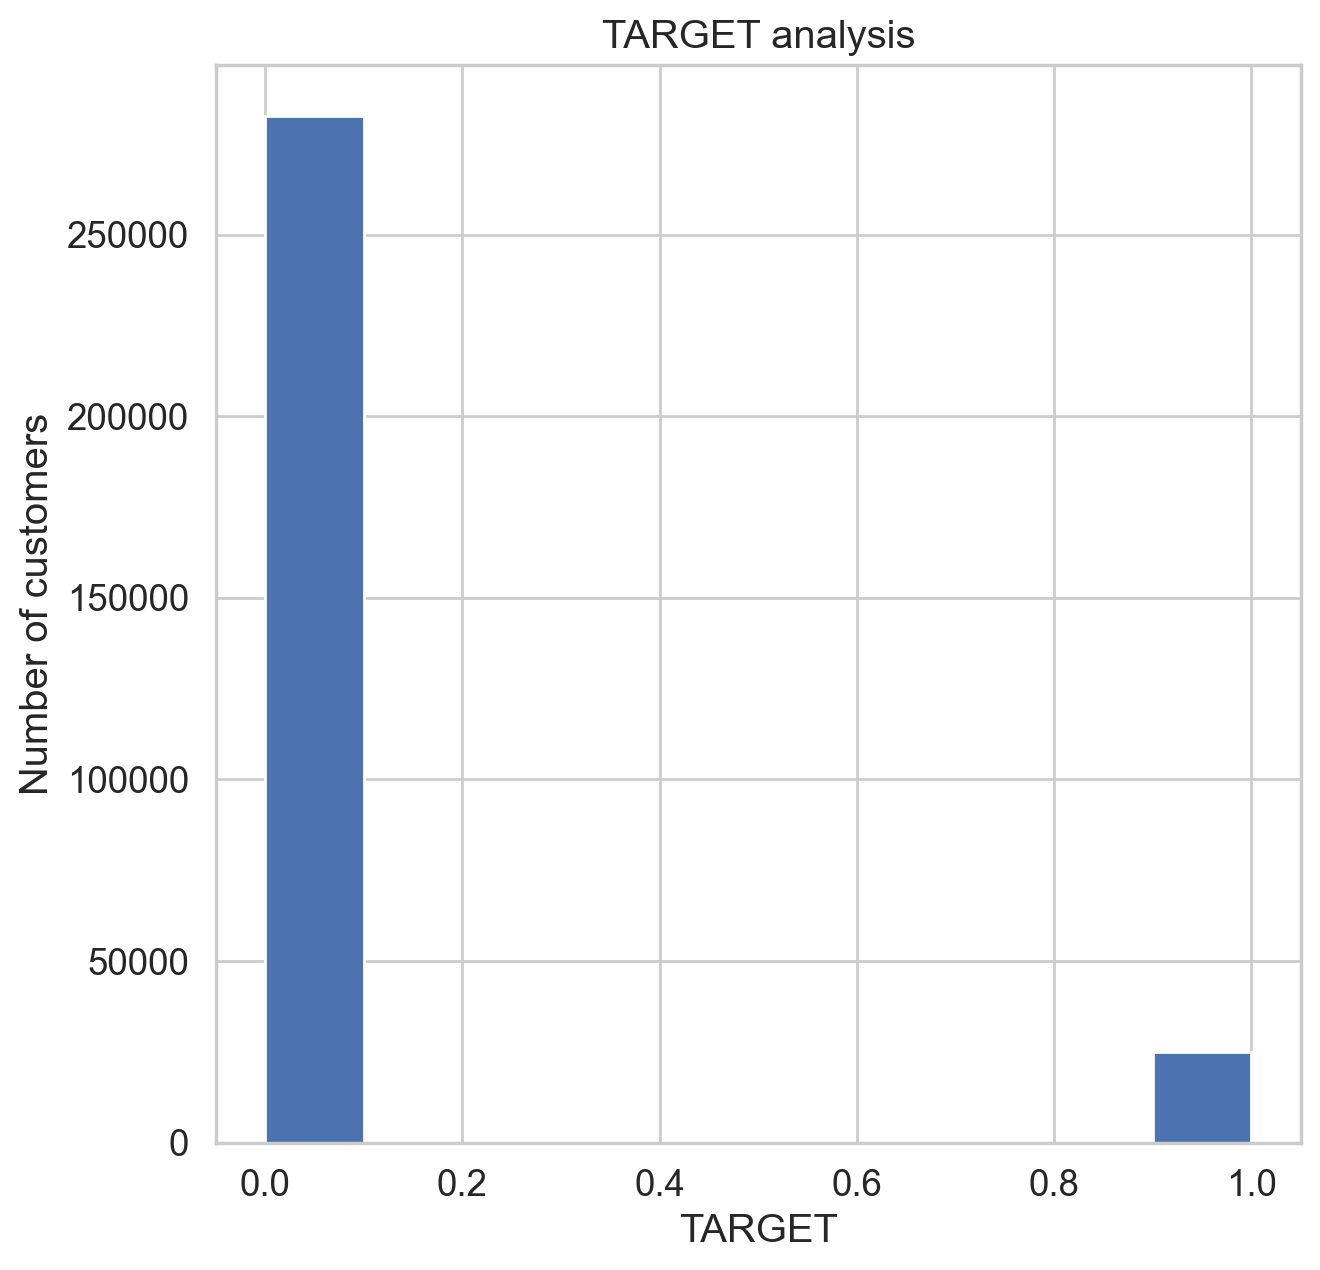

In [116]:
plt.figure(figsize=(7,7))
plt.hist(app_train['TARGET'])
plt.title('TARGET analysis')
plt.xlabel('TARGET')
plt.ylabel('Number of customers')
plt.show()

#  Analyse des valeurs manquantes

In [19]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [20]:
# # Missing values statistics
# missing_values = missing_values_table(app_train)
# missing_values.head(20)

In [21]:
# plt.figure(figsize=(40, 40))
# sns.heatmap(app_train.isna().T, cbar=False)
# plt.yticks(fontsize=14)
# plt.show()

# Types des colonnes

In [ ]:
# Number of each type of column
app_train.dtypes.value_counts()

In [ ]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

In [ ]:
app_train.select_dtypes('object')

# Encodage des variables catégorielles

## Label Encoding et One-Hot Encoding

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

In [ ]:
app_train.head(2)

In [ ]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

In [ ]:
app_train.head(2)

# Alignement des données de formation et de test

In [ ]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

# Analyse exploratoire des données

In [ ]:
(app_train['DAYS_BIRTH'] / -365).describe()

pas de valeurs aberrantes

In [ ]:
app_train['DAYS_EMPLOYED'].describe()

That doesn't look right! The maximum value (besides being positive) is about 1000 years! 

In [ ]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

Il s'avère que les anomalies ont un taux de défaillance plus faible.

Le traitement des anomalies dépend de la situation exacte, <br />
et il n'existe pas de règles fixes. L'une des approches <br />
les plus sûres consiste à définir les anomalies comme <br />
des valeurs manquantes, puis à les compléter (en utilisant <br />
l'imputation) avant l'apprentissage automatique. 

Dans ce cas, puisque toutes les anomalies ont exactement <br />
la même valeur, nous voulons les compléter avec la même <br />
valeur au cas où tous ces prêts ont quelque chose en commun. <br />
Les valeurs anormales semblent avoir une certaine importance, <br />
nous voulons donc indiquer au modèle d'apprentissage automatique <br />
si nous avons effectivement rempli ces valeurs. <br />
Comme solution, nous allons remplir les valeurs anormales <br />
avec un nombre nul (np.nan) et ensuite créer une nouvelle <br />
colonne booléenne indiquant si la valeur était anormale ou non.

In [ ]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
# Nous faisons la meme chose sur le jeu de test
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

# Etude des Corrélations

In [ ]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

# Effet de l'âge sur le remboursement des prêts

In [ ]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

Au fur et à mesure que le client vieillit, il existe une relation <br />
linéaire négative avec la **target**, ce qui signifie que plus les <br />
clients vieillissent, plus ils ont tendance à rembourser leurs prêts dans les délais.

Commençons à examiner cette variable. <br />
Tout d'abord, nous pouvons faire un histogramme de l'âge. <br />
Nous allons mettre l'axe des x en années <br />
pour rendre le graphique un peu plus compréhensible.

In [ ]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.figure(figsize=(10,5))
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

En soi, la distribution de l'âge ne nous apprend pas grand-chose, <br />
si ce n'est qu'il n'y a pas de valeurs aberrantes puisque <br />
tous les âges sont raisonnables. <br />
Pour visualiser l'effet de l'âge sur la cible, nous allons ensuite <br />
réaliser un graphique d'estimation de la densité du noyau (KDE) <br />
coloré par la valeur de la cible. <br />
Un graphique d'estimation de la densité du noyau montre la <br />
distribution d'une seule variable et peut être considéré <br />
comme un histogramme lissé.<br />
Nous utiliserons le **kdeplot de Seaborn** pour ce graphique.

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

plt.legend()
plt.show()

In [ ]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

In [ ]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

In [ ]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

La tendance est claire : les jeunes demandeurs sont plus susceptibles <br />
de ne pas rembourser le prêt ! Le taux de non-remboursement est <br />
supérieur à 10 % pour les trois groupes d'âge les plus jeunes <br />
et inférieur à 5 % pour le groupe le plus âgé.

Il s'agit d'une information qui pourrait être utilisée directement <br />
par la banque : puisque les clients les plus jeunes sont moins <br />
susceptibles de rembourser le prêt, il faudrait peut-être leur <br />
fournir davantage de conseils ou d'astuces de planification financière. <br />
Cela ne signifie pas que la banque doive faire preuve de discrimination <br />
à l'égard des jeunes clients, mais il serait judicieux de prendre <br />
des mesures de précaution pour aider les jeunes clients à rembourser dans les délais.

### Sources extérieures

Les 3 variables présentant les corrélations négatives les plus <br />
fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. <br />
Selon la documentation, ces caractéristiques représentent un "score <br />
normalisé provenant d'une source de données externe". <br />
Je ne suis pas sûr de ce que cela signifie exactement, <br />
mais il peut s'agir d'une sorte de notation cumulative <br />
réalisée à partir de nombreuses sources de données.

Jetons un coup d'œil à ces variables:

Tout d'abord, nous pouvons montrer les corrélations des <br />
caractéristiques EXT_SOURCE avec la cible et entre elles.

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Les trois caractéristiques EXT_SOURCE ont des corrélations négatives <br />
avec la cible, ce qui indique que plus la valeur de l'EXT_SOURCE <br />
augmente, plus le client est susceptible de rembourser le prêt. <br />
Nous pouvons également voir que DAYS_BIRTH est positivement corrélé <br />
avec EXT_SOURCE_1, ce qui indique que l'un des facteurs de ce score <br />
est peut-être l'âge du client.

Ensuite, nous pouvons examiner la distribution de chacune de <br />
ces caractéristiques colorées par la valeur de la cible. <br />
Cela nous permettra de visualiser l'effet de cette variable sur la cible.

In [ ]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 affiche la plus grande différence entre les valeurs de la cible. <br />
Nous pouvons clairement voir que cette caractéristique a une certaine relation <br />
avec la probabilité qu'un demandeur rembourse un prêt. <br />
La relation n'est pas très forte (en fait, elles sont toutes considérées <br />
comme très faibles), mais ces variables seront toujours utiles pour un modèle <br />
d'apprentissage automatique permettant de prédire si un demandeur <br />
remboursera ou non un prêt à temps.


Comme dernier graphique exploratoire, nous pouvons réaliser un graphique <br />
en paires des variables EXT_SOURCE et de la variable DAYS_BIRTH. <br />
Le graphique en paires est un excellent outil d'exploration car <br />
il nous permet de voir les relations entre plusieurs paires de <br />
variables ainsi que les distributions de variables uniques. <br />
Ici, nous utilisons la bibliothèque de visualisation seaborn <br />
et la fonction PairGrid pour créer un Pairs Plot avec des nuages <br />
de points sur le triangle supérieur, des histogrammes sur la diagonale, <br />
et des diagrammes de densité de noyau 2D et des coefficients <br />
de corrélation sur le triangle inférieur.

In [ ]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
# def corr_func(x, y, **kwargs):
#     r = np.corrcoef(x, y)[0][1]
#     ax = plt.gca()
#     ax.annotate("r = {:.2f}".format(r),
#                 xy=(.2, .8), xycoords=ax.transAxes,
#                 size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

## Feature Engineering

Pour cette étape, j'ai choisi de m'appuyer sur le kernel Kaggle suivant: <br />
[LightGBM with Simple Features](https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features)


In [117]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [118]:
def plot_categorical_variables_bar(data, column_name, figsize = (18,6), percentage_display = True, plot_defaulter = True, rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'):
    
    '''
    Function to plot Categorical Variables Bar Plots
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        figsize: tuple, default = (18,6)
            Size of the figure to be plotted
        percentage_display: bool, default = True
            Whether to display the percentages on top of Bars in Bar-Plot
        plot_defaulter: bool
            Whether to plot the Bar Plots for Defaulters or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels
        horizontal_adjust: int, default = 0
            Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
        fontsize_percent: str, default = 'xx-small'
            Fontsize for percentage Display
        
    '''
    
    print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    plt.subplot(1,2,1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')
    
    #plotting distribution of category for Defaulters
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending = False)

        plt.subplot(1,2,2)
        sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')
        plt.ylabel('Percentage of Defaulter per category')
        plt.xlabel(column_name, labelpad = 10)
        plt.xticks(rotation = rotation)
        plt.title(f'Percentage of Defaulters for each category of {column_name}', pad = 20)
    plt.show()

In [119]:
def print_unique_categories(data, column_name, show_counts = False):
    
    '''
    Function to print the basic stats such as unique categories and their counts for categorical variables
    
        Inputs:
        data: DataFrame
            The DataFrame from which to print statistics
        column_name: str
            Column's name whose stats are to be printed
        show_counts: bool, default = False
            Whether to show counts of each category or not

    '''
    
    print('-'*100)
    print(f"The unique categories of '{column_name}' are:\n{data[column_name].unique()}")
    print('-'*100)
    
    if show_counts:
        print(f"Counts of each category are:\n{data[column_name].value_counts()}")
        print('-'*100)

In [120]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [121]:
# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv('data/source/application_train.csv', nrows= num_rows)
    test_df = pd.read_csv('data/source/application_test.csv', nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

In [122]:
# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('data/source/bureau.csv', nrows = num_rows)
    bb = pd.read_csv('data/source/bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg


In [123]:
# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv('data/source/previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

In [124]:
# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv('data/source/POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

In [125]:
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv('data/source/installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

In [126]:
# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv('data/source/credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

In [127]:
# LightGBM GBDT with KFold or Stratified KFold
# Parameters from Tilii kernel: https://www.kaggle.com/tilii7/olivier-lightgbm-parameters-by-bayesian-opt/code
def kfold_lightgbm(df, num_folds, stratified = False, debug= False):
    # Divide in training/validation and test data
    train_df = df[df['TARGET'].notnull()]
    test_df = df[df['TARGET'].isnull()]
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    del df
    gc.collect()
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200)

        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full AUC score %.6f' % roc_auc_score(train_df['TARGET'], oof_preds))
    # Write submission file and plot feature importance
    if not debug:
        test_df['TARGET'] = sub_preds
        test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index= False)
    display_importances(feature_importance_df)
    return feature_importance_df

In [128]:
# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')

In [129]:
def replaceInf(data, replaceValue=np.nan):
    '''
    Replaces the np.inf values contained in 
    the dataframe <data> communicated as input and 
    replaces them with the value <replaceValue> 
    also communicated as input.
    Returns the modified dataframe <data>.
    '''
    nbInf = data.isin([np.inf, -np.inf]).sum().sum()
    print(f'{nbInf} infinite values detected.')
    if nbInf > 0:
        print(f'These values will be replaced by {replaceValue}')
        return data.replace([np.inf, -np.inf], replaceValue)
    else:
        return data

In [130]:
def replaceNan(data, strategy="median"):
    '''
    Replaces the np.nan values contained in 
    the dataframe <data> given as input and 
    replaces them via the SimpleImputer function 
    according to the <strategy> 
    also communicated as input.
    Returns the modified <data> dataframe.
    '''
    from sklearn.impute import SimpleImputer
    nbNaN = data.isnull().sum().sum()
    print(f'{nbNaN} NaN values detected.')
    if nbNaN > 0:
        print(f'Missing values will be replaced by the {strategy} of each column.')
        imp = SimpleImputer(missing_values=np.NaN,
                        strategy=strategy)
        return pd.DataFrame(imp.fit_transform(data),
                            columns=data.columns,
                            index=data.index)
    else:
        return data

In [164]:
def dfImportAndPreprocessing( debug = False, pInfinite = False, pMissing = False):
    
    '''
    This function loads and performs the preprocessing of the data contained 
    in the different csv files of the project.
    In input: No data to pass, they are loaded from the folder "input", 
    present in the current folder.
    The function also allows to perform various optimization options:
     - Treatment of missing values
     - Treatment of infinite values
     - Error correction if using the LightGBM model
     - Optimization of the memory used by the dataframe by optimizing 
     the dtypes of each column.
    '''
    
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows=num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()
    if pInfinite:
        with timer("Processing of infinite values"):
            df = replaceInf(df)
            gc.collect()
    if pMissing:
        with timer("Processing of missing values"):
#             df = replaceNan(df)
            df = pd.concat([df[['TARGET']],replaceNan(df.drop('TARGET', axis=1))], axis=1)
            df['SK_ID_CURR'] = df['SK_ID_CURR'].astype(int)
            df['index'] = df['index'].astype(int)
            gc.collect()
    with timer("Data Optimisation for LGBMClassifier"):
            import re
            df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))    
    
    return df

In [132]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import time

def evaluate_classification_models(models, X, y, n_splits=3, shuffle=True, random_state=42):
    
    # définition de l'objet StratifiedKFold pour la validation croisée
    cv = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    
    # définition des métriques d'évaluation
    scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'roc_auc': 'roc_auc'}
    
    # dictionnaire pour stocker les résultats de validation croisée et le temps d'exécution pour chaque modèle et chaque métrique
    results = {}

    # évaluation de chaque modèle avec la validation croisée
    for name, model in models.items():
        # mesure du temps d'exécution
        start_time = time.time()
        # exécution de la validation croisée avec les métriques d'évaluation
        scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
        # calcul du temps d'exécution
        elapsed_time = time.time() - start_time
        # stockage des résultats de validation croisée et du temps d'exécution pour chaque modèle et chaque métrique
        results[name] = {'accuracy': scores['test_accuracy'].mean(),
                         'precision': scores['test_precision'].mean(),
                         'recall': scores['test_recall'].mean(),
                         'roc_auc': scores['test_roc_auc'].mean(),
                         'time': elapsed_time}
    for name, result in results.items():
        print(f"Model: {name}")
        print(f"\tAccuracy: {result['accuracy']:.4f}")
        print(f"\tPrecision: {result['precision']:.4f}")
        print(f"\tRecall: {result['recall']:.4f}")
        print(f"\tROC-AUC: {result['roc_auc']:.4f}")
        print(f"\tTime: {result['time']:.4f} seconds")
    
    # retour des résultats de validation croisée et du temps d'exécution pour chaque modèle et chaque métrique
    return results

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict, StratifiedKFold

def plot_roc_cv(models_dict, X_train, y_train, n_splits=5):
    cv = StratifiedKFold(n_splits=n_splits)
    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Taux de faux positifs (FPR)')
    plt.ylabel('Taux de vrais positifs (TPR)')
    plt.title('Courbe ROC')

    for model_name, model in models_dict.items():
        y_scores = cross_val_predict(model, X_train, y_train, cv=cv, method="predict_proba")[:,1]
        fpr, tpr, _ = roc_curve(y_train, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(model_name, roc_auc))

    plt.legend(loc="lower right")
    plt.show()

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_predict


def plot_confusion_matrix_and_roc_auc_score(model, X, y, n_splits=5, random_state=None):
    """
    Fonction qui affiche une matrice de confusion graphique et un graphique de ROC-AUC
    pour un modèle de classification binaire en utilisant la validation croisée
    avec StratifiedKFold et cross_val_predict.
    
    Args:
        model: Le modèle de classification à évaluer.
        X: Les données d'entrée pour le modèle.
        y: Les étiquettes de classe correspondantes pour les données d'entrée.
        n_splits: Le nombre de plis à utiliser pour la validation croisée.
                  Par défaut, n_splits = 5.
        random_state: Le générateur de nombres aléatoires à utiliser pour la reproduction des résultats.
                      Si None, utiliser le générateur de nombres aléatoires par défaut de scikit-learn.
                      Par défaut, random_state = None.
    
    Returns:
        None.
    """
    # Définition de l'objet StratifiedKFold pour la validation croisée
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Prédiction des étiquettes de classe avec cross_val_predict et StratifiedKFold
    y_pred = cross_val_predict(model, X, y, cv=cv)
    
    # Calcul de la matrice de confusion
    cm = confusion_matrix(y, y_pred)
    
    # Calcul du taux de vrais positifs et du taux de faux positifs pour la courbe ROC-AUC
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Création des graphiques pour la matrice de confusion et la courbe ROC-AUC
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    
    # Matrice de confusion
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax1)
    ax1.set_xlabel('Prédiction')
    ax1.set_ylabel('Vraie étiquette')
    ax1.set_title('Matrice de confusion')
    
    # Courbe ROC-AUC
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    roc_display.plot(ax=ax2)
    ax2.plot([0, 1], [0, 1], linestyle='--', color='r', label='Aléatoire')
    ax2.set_xlabel('Taux de faux positifs')
    ax2.set_ylabel('Taux de vrais positifs')
    ax2.set_title('Courbe ROC-AUC')
    ax2.legend()
    
    # Affichage des graphiques
    plt.show()


In [135]:
def roc_auc_matrice_confusion(model, X, y):
    cv = StratifiedKFold(n_splits=3)
    y_scores = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:,1]
    fpr, tpr, _ = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)
        
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred)
    #mlflow.log_metric("cm", cm)    
    # Création des graphiques pour la matrice de confusion et la courbe ROC-AUC
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
    # Matrice de confusion
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax1)
    ax1.set_xlabel('Prédiction')
    ax1.set_ylabel('Vraie étiquette')
    ax1.set_title('Matrice de confusion')
    # Courbe ROC-AUC
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    roc_display.plot(ax=ax2)
    ax2.plot([0, 1], [0, 1], linestyle='--', color='r', label='Aléatoire')
    ax2.set_xlabel('Taux de faux positifs')
    ax2.set_ylabel('Taux de vrais positifs')
    ax2.set_title('Courbe ROC-AUC')
    ax2.legend()
    plt.savefig("plot_roc_auc.png")
    plt.show()

In [136]:
def roc_auc(model, X, y):
    cv = StratifiedKFold(n_splits=3)
    y_scores = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:,1]
    fpr, tpr, _ = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, label='(AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Taux de faux positifs (FPR)')
    plt.ylabel('Taux de vrais positifs (TPR)')
    plt.title('Courbe ROC')
    plt.legend(loc="lower right")
    plt.show()

In [137]:
def matrice_confusion(model, X, y):
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred)
    fig, (ax1) = plt.subplots(ncols=1, figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax1, cbar=False) #'YlGnBu'
    ax1.set_xlabel('Prédiction')
    ax1.set_ylabel('Vraie étiquette')
    ax1.set_title('Matrice de confusion')
    plt.show() 

In [138]:
def scoring(model, X, y):
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall',
               'roc_auc': 'roc_auc', 'F1_score': 'f1' }
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    mlflow.log_metric("test_accuracy", scores['test_accuracy'].mean() )
    mlflow.log_metric("test_precision", scores['test_precision'].mean() )
    mlflow.log_metric("test_recall", scores['test_recall'].mean())
    mlflow.log_metric("test_roc_auc",scores['test_roc_auc'].mean() )
    mlflow.log_metric("test_f1_score",scores['test_F1_score'].mean() )
    print(f"fit times {scores['fit_time'].mean():.2f}")
    print(f"scores times {scores['score_time'].mean():.2f}")
    print(f"accuracy {scores['test_accuracy'].mean():.2f}")
    print(f"précision {scores['test_precision'].mean():.2f}")
    print(f"recall {scores['test_recall'].mean():.2f}")
    print(f"ROC AUC {scores['test_roc_auc'].mean():.2f}")
    print(f"F1 score {scores['test_F1_score'].mean():.2f}")
    return scores    

In [139]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes=None, normalize=False, title='Matrice de confusion', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Vraie étiquette')
    plt.xlabel('Étiquette prédite')
    plt.savefig('plot_confusion_matrix.png')
    mlflow.log_artifact("plot_confusion_matrix.png")

In [140]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')
    mlflow.log_artifact("lgbm_importances01.png")
    mlflow.end_run()

In [141]:
def plot_roc_curve(fpr, tpr, roc_auc, fold_num, ax=None):
    import matplotlib.pyplot as plt
    
    if ax is None:
        fig, ax = plt.subplots()
    
    ax.plot(fpr, tpr, lw=1, alpha=0.8, label=f'Fold {fold_num} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=0.8)
    ax.set_xlabel('Taux de faux positifs')
    ax.set_ylabel('Taux de vrais positifs')
    ax.set_title('Courbe ROC')
    ax.legend()
    plt.savefig("plot_roc_curve.png")
    mlflow.log_artifact("plot_roc_curve.png")
    

In [142]:
def evaluate_stratifiedkfold(name, model, X, y, stratified= True, num_folds=5, features_importance=False):
    f1_scores, recall_scores, precision_scores = [], [], []
    roc_auc_scores, fpr_scores, tpr_scores = [], [], []
    accuracy_scores = []
    feature_importance_df = pd.DataFrame()
    if stratified:
        print(f"{name} stratified")
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=42)
    else:
        print(f"{name} non stratified")
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=42)
    start_time = time.time()  
    for i, (train_idx, test_idx) in enumerate(folds.split(X, y)):
        X_train_fold = X.iloc[train_idx]
        y_train_fold = y.iloc[train_idx]
        X_test_fold = X.iloc[test_idx]
        y_test_fold = y.iloc[test_idx]
        
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_test_fold)
        proba_preds = model.predict_proba(X_test_fold)[:, 1]
        
        # Calcul des scores pour chaque pli
        fpr, tpr, thresholds = roc_curve(y_test_fold, proba_preds)
        fpr_scores.append(fpr)
        tpr_scores.append(tpr)
        roc_auc_scores.append(roc_auc_score(y_test_fold, proba_preds))
        
        recall_scores.append(recall_score(y_test_fold, preds))
        precision_scores.append(precision_score(y_test_fold, preds))
        f1_scores.append(f1_score(y_test_fold, preds))
        accuracy_scores.append(accuracy_score(y_test_fold, preds))
        plt.figure()
        plot_roc_curve(fpr, tpr, roc_auc_scores[-1], i+1)
        
        if features_importance:
            explainer = shap.TreeExplainer(model['model'])
            observations = model['std'].transform(X_test_fold)
            #observations = model['std'].transform(X_test_fold)
            shap_values = explainer.shap_values(observations)
            shap.summary_plot(shap_values, X_test_fold, plot_type="bar")
            
            
        from sklearn.metrics import confusion_matrix
        cm = confusion_matrix(y_test_fold, preds)
        plot_confusion_matrix(cm, classes=['0', '1'], title=f'Fold {i+1} - Matrice de confusion')
        
               
        print(f'Fold {i+1}: roc_auc_score={roc_auc_scores[-1]:.4f}, recall={recall_scores[-1]:.4f}, precision={precision_scores[-1]:.4f}, f1={f1_scores[-1]:.4f}, accuracy={accuracy_scores[-1]:.4f}')
        
    
    # Calcul de la moyenne totale pour chaque métrique de performance
    
    mean_f1 = np.mean(f1_scores)
    mean_recall = np.mean(recall_scores)
    mean_precision = np.mean(precision_scores)
    mean_roc_auc = np.mean(roc_auc_scores)
    mean_accuracy = np.mean(accuracy_scores)
    elapsed_time =  time.time() - start_time
    print(f'Total: roc_auc_score={mean_roc_auc:.4f}, recall={mean_recall:.4f}, precision={mean_precision:.4f}, f1={mean_f1:.4f}, accuracy={mean_accuracy:.4f}')
    print(f'Proportion: {Counter(y_test_fold)}')
    print(f'done in {elapsed_time:.2f}s')
    mlflow.log_metric("F1", mean_f1)
    mlflow.log_metric("Recall", mean_precision)
    mlflow.log_metric("Precision", mean_precision)
    mlflow.log_metric("ROC AUC", mean_roc_auc)

In [143]:
def plt_confusion_matrix(y_true, y_pred):
    '''fonction qui trace la matrice de confusion'''
    plt.figure(figsize=(10,6))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="YlGnBu")
    plt.ylabel('True classes', fontsize=14)
    plt.xlabel('Predicted classes', fontsize=14)
    plt.title('Matrice de confusion', fontsize=20)
    print(classification_report(y_true, y_pred))

In [144]:
######################################################################################################################

In [145]:
# feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

In [146]:
df = dfImportAndPreprocessing(pInfinite=True, pMissing=True)

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 19s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 28s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 14s
Installments payments df shape: (339587, 26)
Process installments payments - done in 25s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 16s
21 infinite values detected.
These values will be replaced by nan
Processing of infinite values - done in 19s
72051258 NaN values detected.
Missing values will be replaced by the median of each column.
Processing of missing values - done in 50s
Data Optimisation for LGBMClassifier - done in 2s


In [152]:
# path = "data/cleaned/"
# filename = "df.csv"
# df.to_csv(path+filename, index=False)

In [209]:
path = "data/pickle/"
with open(path+"df.pickle", "wb") as file:
    pickle.dump(df, file)

In [154]:
###############################################################

In [210]:
path = "data/pickle/"
with open(path+"df.pickle", "rb") as file:
    df = pickle.load(file)

In [211]:
df.shape

(356251, 798)

In [212]:
# path = "data/cleaned/"
# filename = "df.csv"
# df = pd.read_csv(path+filename)

In [213]:
df.shape

(356251, 798)

In [214]:
df['TARGET'].notnull().value_counts()

True     307507
False     48744
Name: TARGET, dtype: int64

In [215]:
X_train = df[df['TARGET'].notnull()].drop('TARGET', axis=1)
y_train = df['TARGET'][df['TARGET'].notnull()]
X_test = df[df['TARGET'].isnull()].drop('TARGET', axis=1).reset_index(drop=True)
print( X_train.shape, X_test.shape, y_train.shape) 

(307507, 797) (48744, 797) (307507,)


Nota: Nous avons 'SK_ID_CURR' et 'index' qu'il faudra enlever avant de faire une prédiction.
model et KNN

# Sauvegardes des X_train X_test sous forme de pickle

## X_train

In [216]:
path= 'data/pickle/'

In [217]:
with open(path + "X_train.pickle", "wb") as file:
    pickle.dump(X_train, file)

In [218]:
with open(path + "X_train.pickle", "rb") as file:
    X_train = pickle.load(file)
X_train.shape

(307507, 797)

## X_test

In [219]:
path="data/pickle/"
with open(path + "X_test.pickle", "wb") as file:
    pickle.dump(X_test, file)

In [220]:
with open(path + "X_test.pickle", "rb") as file:
    X_test = pickle.load(file)
X_test.shape

(48744, 797)

## X_test_low

In [221]:
X_test_low = X_test[:1000]

In [222]:
path

'data/pickle/'

In [223]:
path = 'data/pickle/'
with open(path + "X_test_low.pickle", 'wb') as file:
    pickle.dump(X_test_low, file)

In [224]:
with open(path + "X_test_low.pickle", 'rb') as file:
    X_test_low = pickle.load(file)
X_test_low.shape

(1000, 797)

#########################################################################

In [225]:
feats = [f for f in X_train.columns if f not in ['SK_ID_CURR', 'index']]
X_train = X_train[feats]
X_train.shape

(307507, 795)

# ########################################## ####################################

nous cherchons à maximiser le rappel car cela minimisera le nombre de faux négatifs.
A voir ... important

Nous allons également examiner la mesure F car elle permet d'exprimer à la fois les préoccupations de précision et de rappel avec un seul score

Ainsi que l'auc

Voir exemple
Spécifications du modèle
Une fois que nous avons construit notre modèle final, nous pouvons alors utiliser une courbe précision-rappel pour optimiser nos performances sur le positif (classe minoritaire). Dans ce cas, nous allons supposer que les parties prenantes de notre entreprise de télécommunications imaginaire souhaitent atteindre un rappel de 0,80 (c'est-à-dire que nous identifions correctement 80 % des échantillons positifs) tout en maximisant la précision.

# Rééquilibrage des classes

##  SMOTE

Pour pallier aux ensembles de données déséquilibrés pour la modélisation d'une classification nous pouvons 
suréchantillonner la classe minoritaire ou sous-échantillonner la classe majoritaire, 
ou bien combiner les deux méthodes.

SMOTE, SMOTEENN et SMOTETomek sont des algorithmes de sur-échantillonnage qui utilisent des techniques d'interpolation pour générer de nouvelles observations à partir des observations existantes.

SMOTE : Cette technique consiste à créer de nouveaux exemples de la classe minoritaire en utilisant une technique de synthèse de données. Elle consiste à créer des observations synthétiques en interpolant les valeurs entre des observations existantes de la classe minoritaire. Cette technique est utile lorsque la classe minoritaire est sous-représentée mais que les données de la classe majoritaire sont distribuées de manière homogène. Si les données de la classe majoritaire sont très dispersées, la création de données synthétiques peut conduire à un sur-apprentissage.

SMOTEENN : Cette technique est une combinaison de SMOTE et de Tomek. Elle consiste à appliquer SMOTE d'abord, puis à appliquer Tomek pour éliminer les exemples de la classe minoritaire qui sont très proches des exemples de la classe majoritaire. Cette technique est utile lorsque les deux classes ont des régions de chevauchement et que les données de la classe minoritaire sont proches des données de la classe majoritaire.

SMOTETomek : Cette technique est également une combinaison de SMOTE et de Tomek. Elle consiste à appliquer Tomek d'abord, puis à appliquer SMOTE pour créer des exemples synthétiques de la classe minoritaire. Cette technique est utile lorsque les deux classes ont des régions de chevauchement et que les données de la classe minoritaire sont très dispersées.

In [52]:
from imblearn.pipeline import Pipeline
# pipeline qui permet de ne pas utiliser les données sur et sous échantillonnées pour le train_test
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.dummy import DummyClassifier

In [53]:
# no_oversampling_pipeline = Pipeline([('std', StandardScaler()), ('lg', LGBMClassifier())])
# smote_pipeline = Pipeline([('std', StandardScaler()),('smote', SMOTE(random_state=42)), ('lg', LGBMClassifier())])
# smoteenn_pipeline = Pipeline([('std', StandardScaler()), ('smoteenn', SMOTEENN(random_state=42)), ('lg', LGBMClassifier())])
# smotetomek_pipeline = Pipeline([('std', StandardScaler()), ('smotetomek', SMOTETomek(random_state=42)), ('lg', LGBMClassifier())])
# under_sampling_pipeline = Pipeline([('std', StandardScaler()), ('undersampling', RandomUnderSampler(random_state=42)), ('lg', LGBMClassifier())])
# DummyClassifier(random_state=42)
# LGBMClassifier(random_state=42)
# AdaBoostClassifier(random_state=42)
# LogisticRegression(random_state=42)


In [54]:
# SHAP
# no_oversampling_pipeline.fit(X_train, y_train)
# import shap
# explainer = shap.TreeExplainer(no_oversampling_pipeline['lg'])
# observations = no_oversampling_pipeline['std'].transform(X_train)
# shap_values = explainer.shap_values(observations)
# shap.summary_plot(shap_values, X_train, plot_type="bar")

# Ne pas faire
# shap_values = shap.TreeExplainer(no_oversampling_pipeline['lg']).shap_values(X_train)

In [55]:
# DummyClassifier(random_state=42)
# LGBMClassifier(random_state=42)
# AdaBoostClassifier(random_state=42)
# LogisticRegression(random_state=42)

# DummyClassifier

## Pipeline

In [62]:
no_sampling_pipeline = Pipeline([('std', StandardScaler()), ('model', DummyClassifier(random_state=42))])
smote_pipeline = Pipeline([('std', StandardScaler()),('smote', SMOTE(random_state=42)),
                           ('model', DummyClassifier(random_state=42))])
smoteenn_pipeline = Pipeline([('std', StandardScaler()), ('smoteenn', SMOTEENN(random_state=42)),
                              ('model', DummyClassifier(random_state=42))])
smotetomek_pipeline = Pipeline([('std', StandardScaler()), ('smotetomek', SMOTETomek(random_state=42)),
                                ('model', DummyClassifier(random_state=42))])
undersampling_pipeline = Pipeline([('std', StandardScaler()), ('undersampling', RandomUnderSampler(random_state=42)),
                                ('model', DummyClassifier(random_state=42))])

In [63]:
mlflow.set_tracking_uri('http://127.0.0.1:5000') #mlflow.set_tracking_uri("sqlite:///mlflow.db")

In [64]:
# from mlflow.tracking import MlflowClient
# client = MlflowClient()
# client.delete_registered_model(name="lgbm")
# client.delete_model_version(
#         name="lgbm", version=38)

In [65]:
# from mlflow.tracking import MlflowClient
# client = MlflowClient()
# client.delete_registered_model(name="LogisticRegression")

In [66]:
# mlflow.end_run()

## DummyClassifier sans sampling

Registered model 'DummyClassifier' already exists. Creating a new version of this model...
2023/03/27 19:42:15 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: DummyClassifier, version 3
Created version '3' of model 'DummyClassifier'.


DummyClassifier stratified
Fold 1: roc_auc_score=0.5000, recall=0.0000, precision=0.0000, f1=0.0000, accuracy=0.9193
Fold 2: roc_auc_score=0.5000, recall=0.0000, precision=0.0000, f1=0.0000, accuracy=0.9193
Fold 3: roc_auc_score=0.5000, recall=0.0000, precision=0.0000, f1=0.0000, accuracy=0.9193
Fold 4: roc_auc_score=0.5000, recall=0.0000, precision=0.0000, f1=0.0000, accuracy=0.9193
Fold 5: roc_auc_score=0.5000, recall=0.0000, precision=0.0000, f1=0.0000, accuracy=0.9193
Total: roc_auc_score=0.5000, recall=0.0000, precision=0.0000, f1=0.0000, accuracy=0.9193
Proportion: Counter({0.0: 56536, 1.0: 4965})
done in 22.12s


<Figure size 640x480 with 0 Axes>

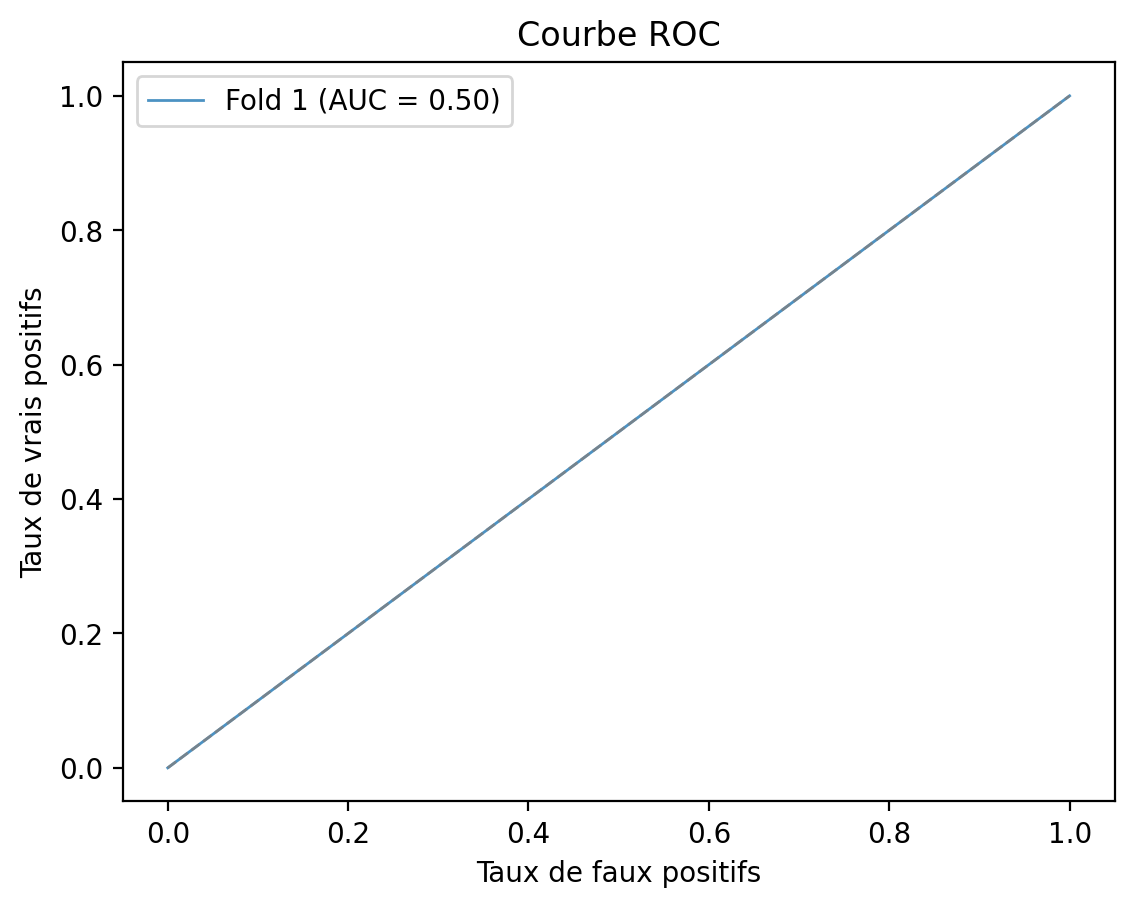

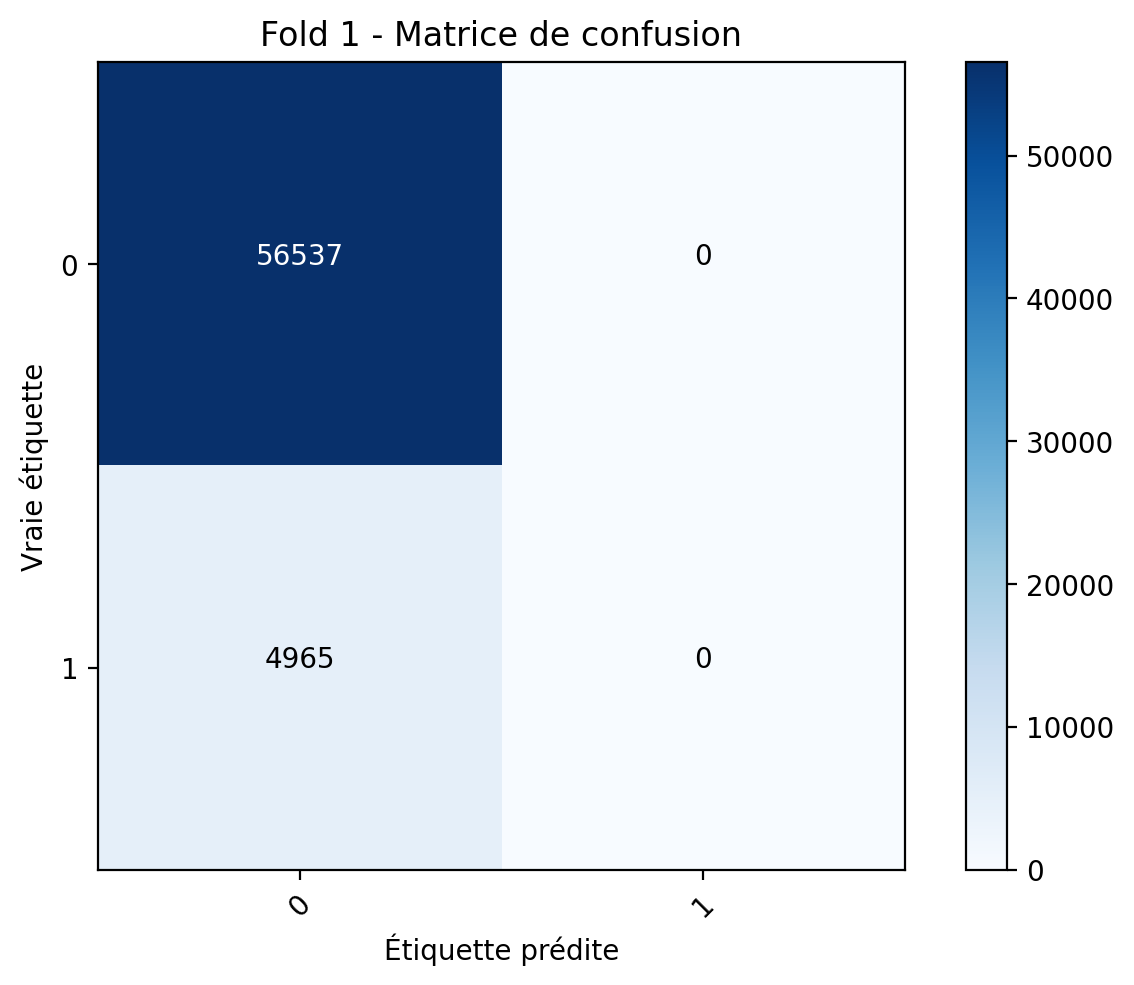

<Figure size 640x480 with 0 Axes>

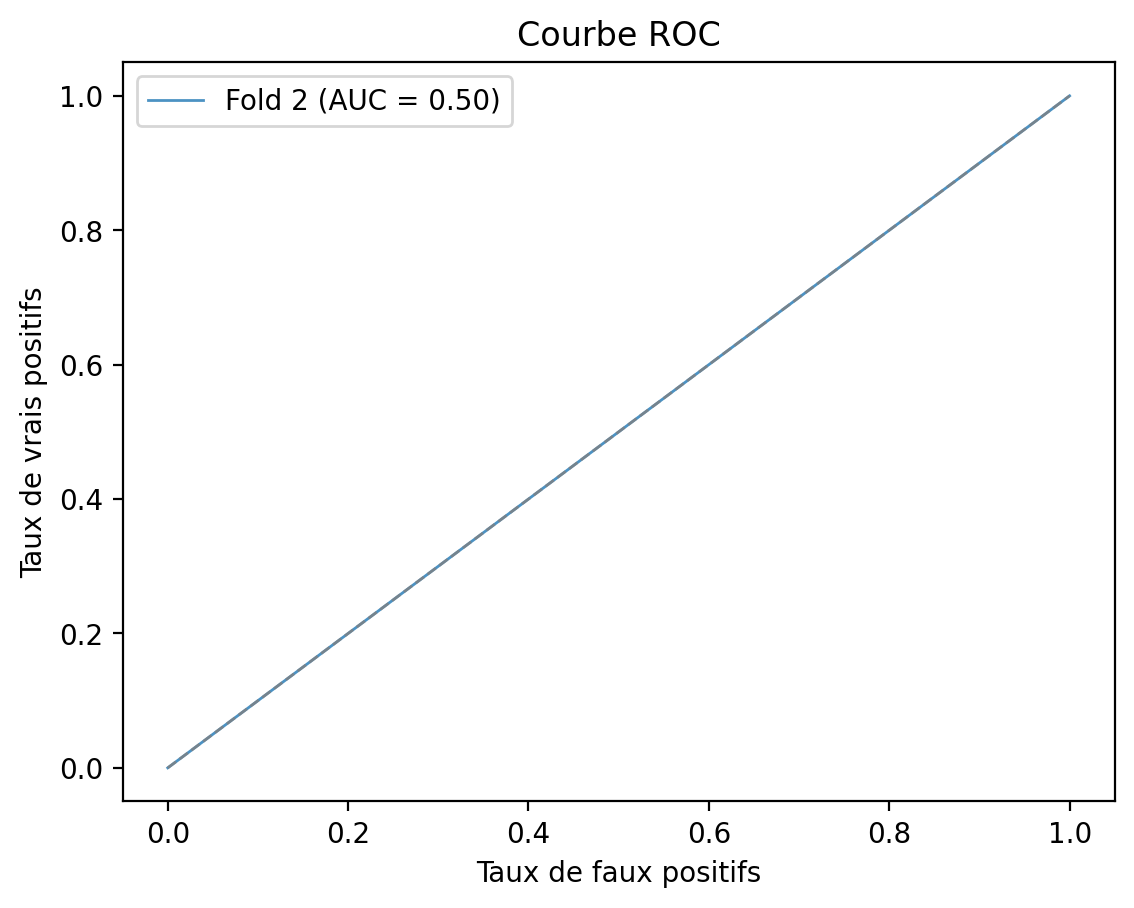

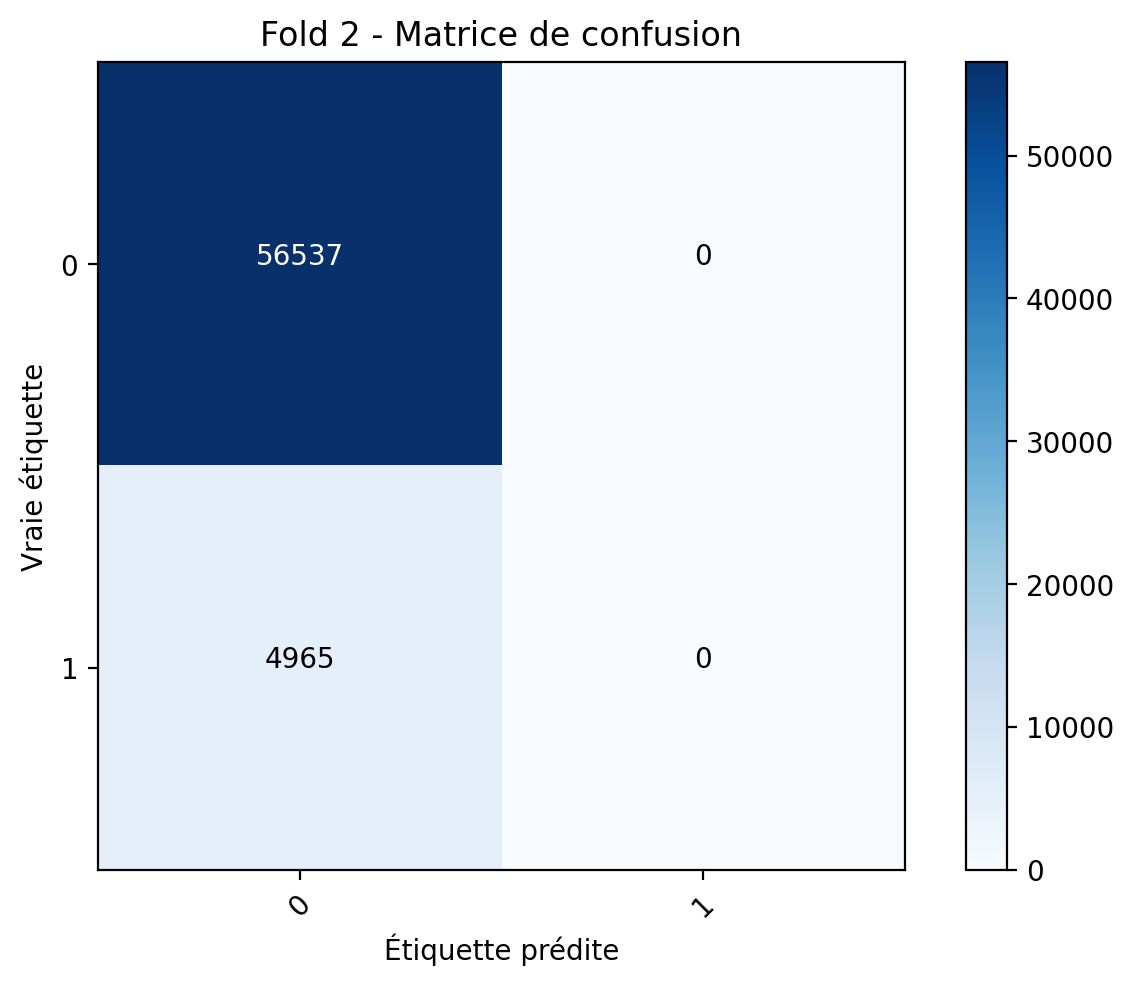

<Figure size 640x480 with 0 Axes>

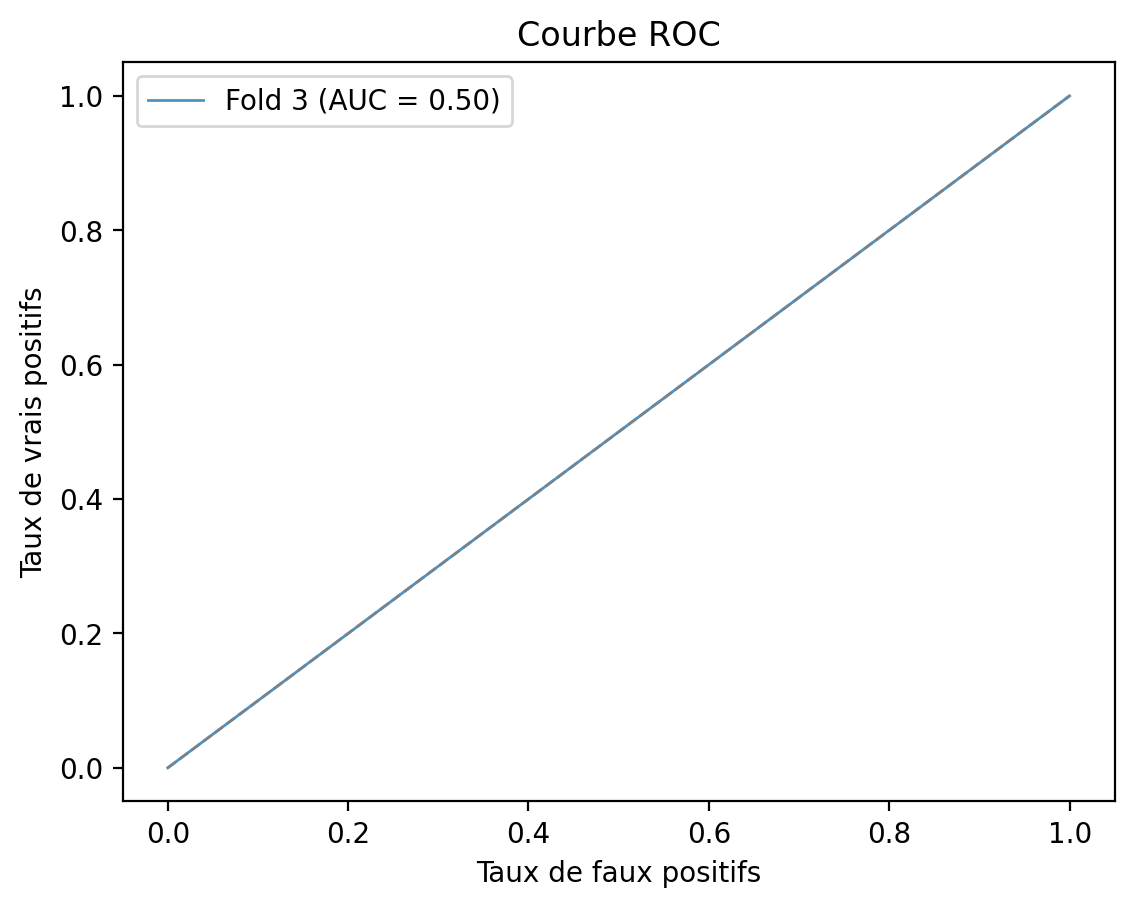

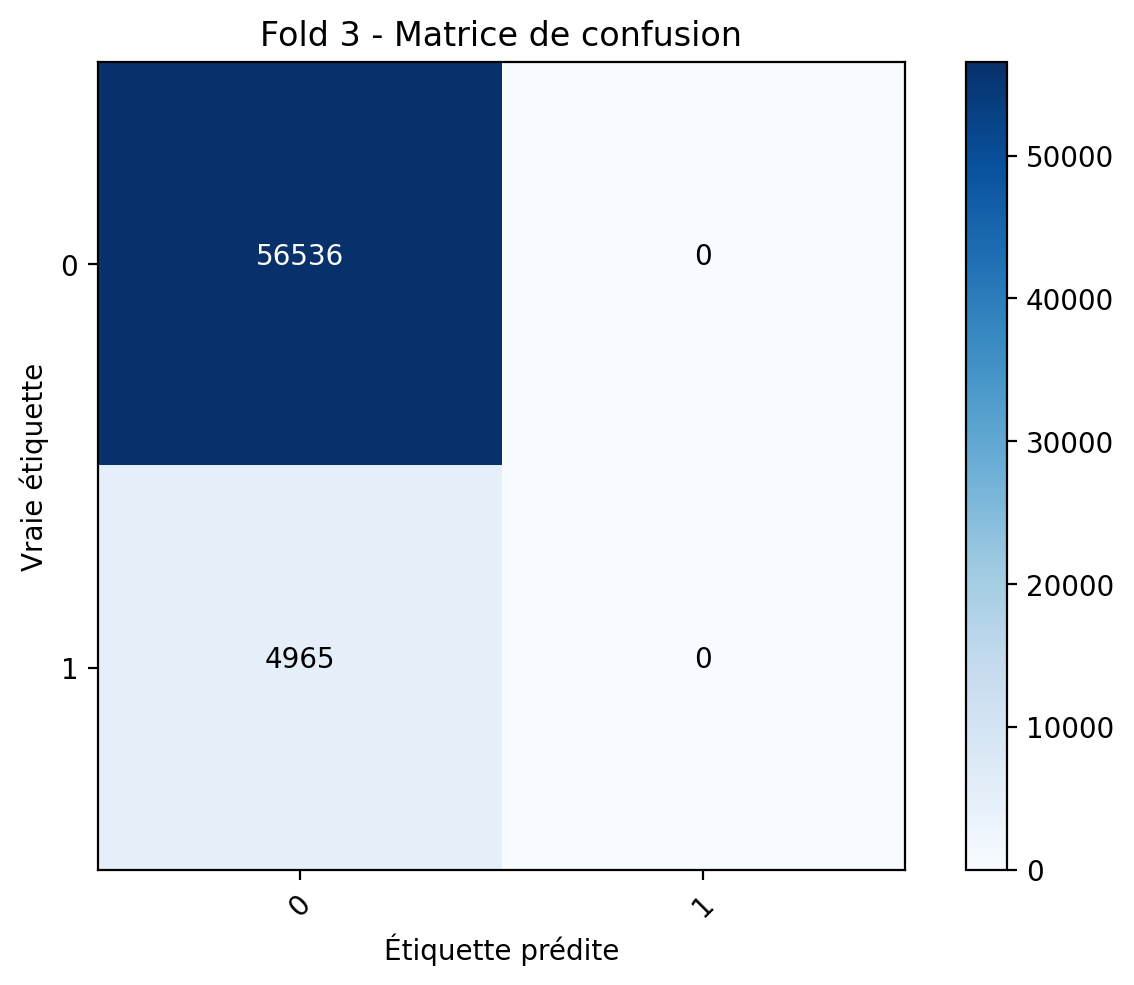

<Figure size 640x480 with 0 Axes>

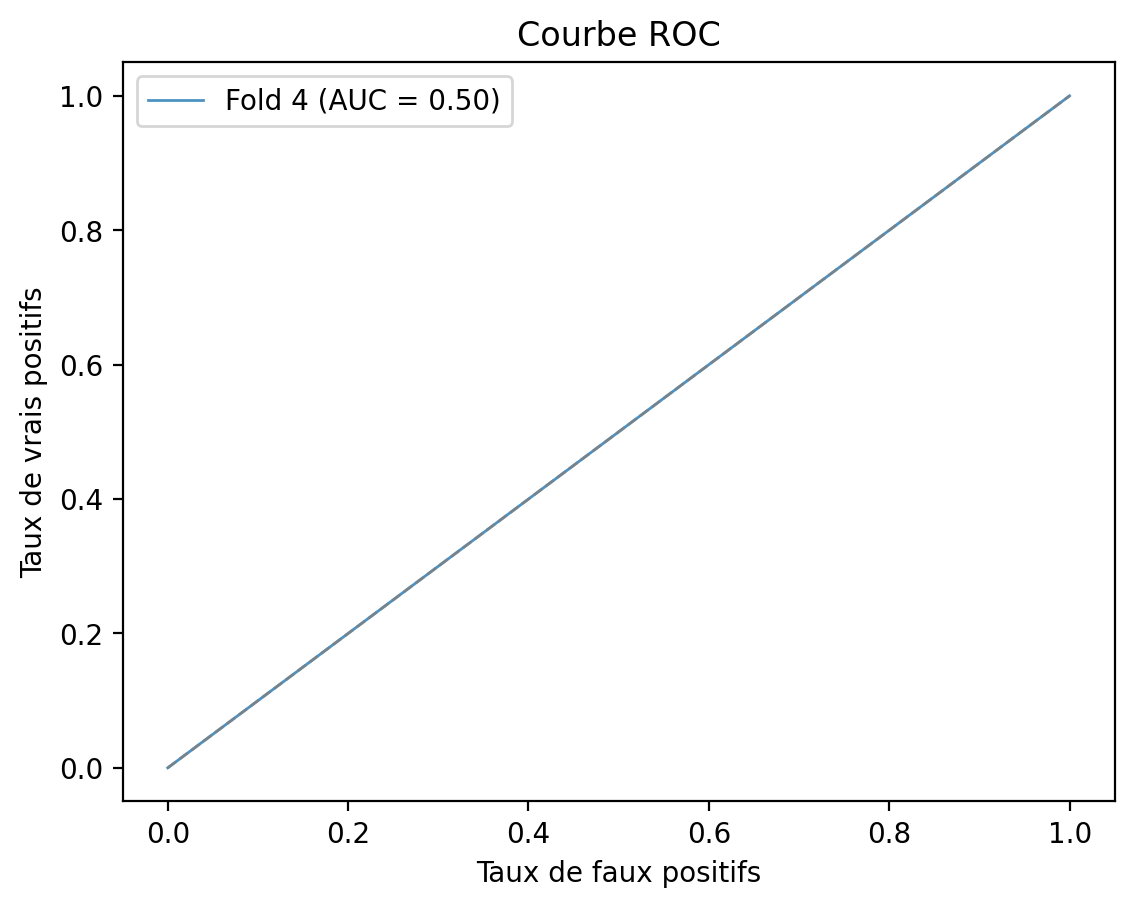

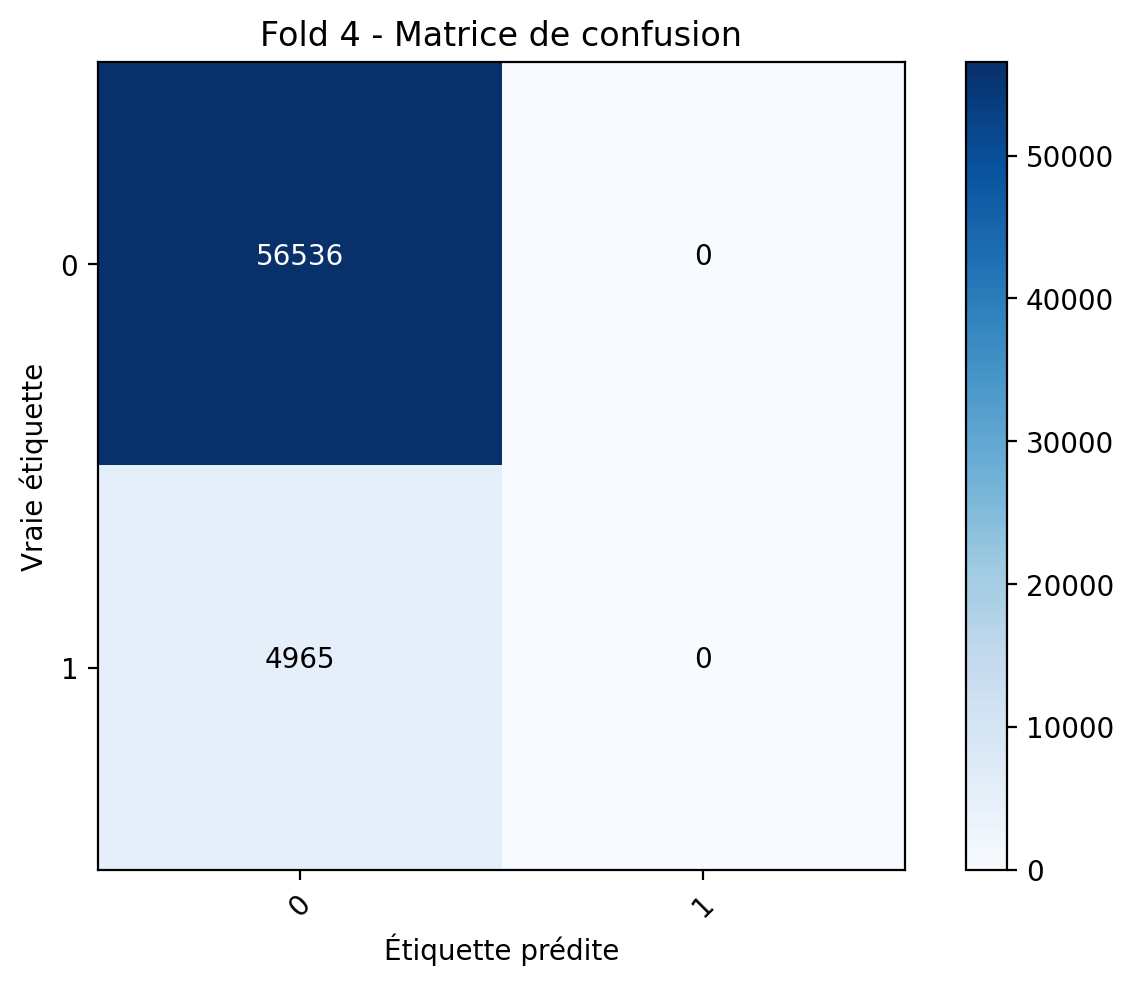

<Figure size 640x480 with 0 Axes>

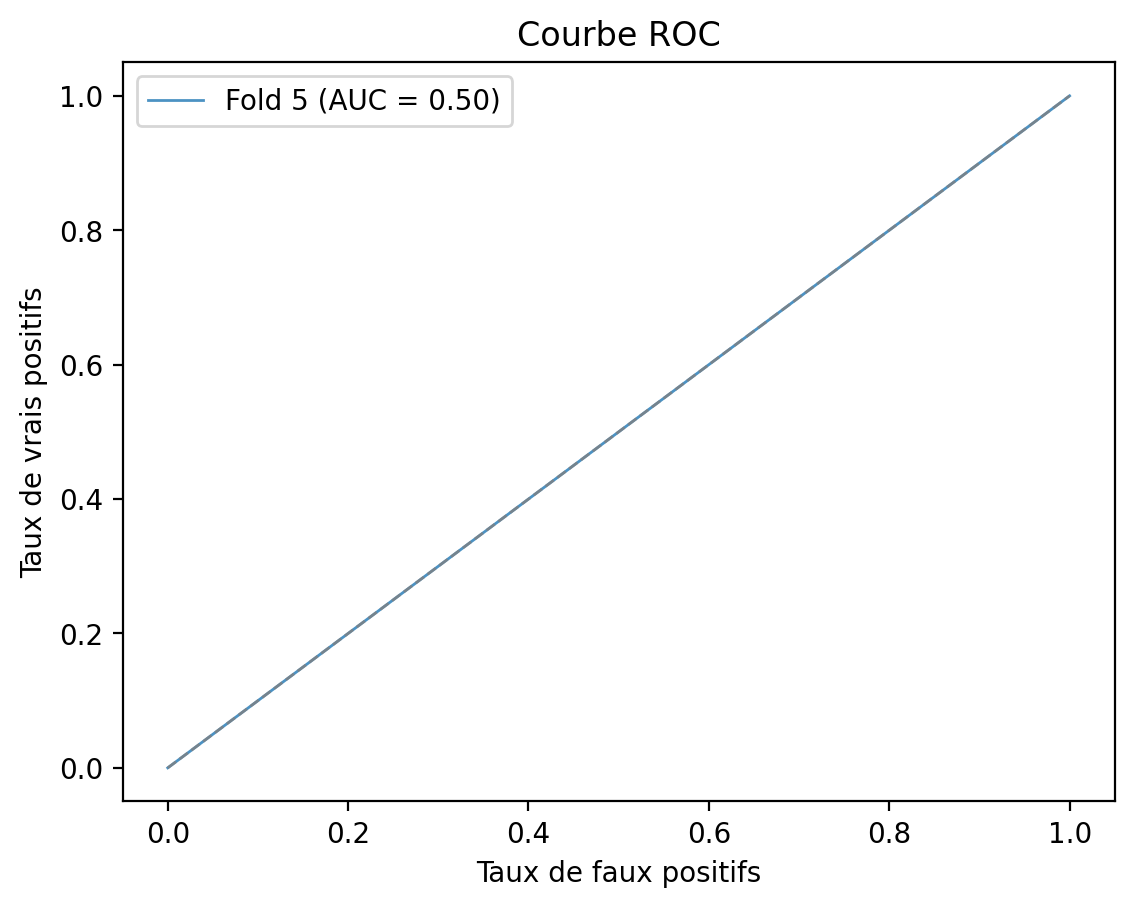

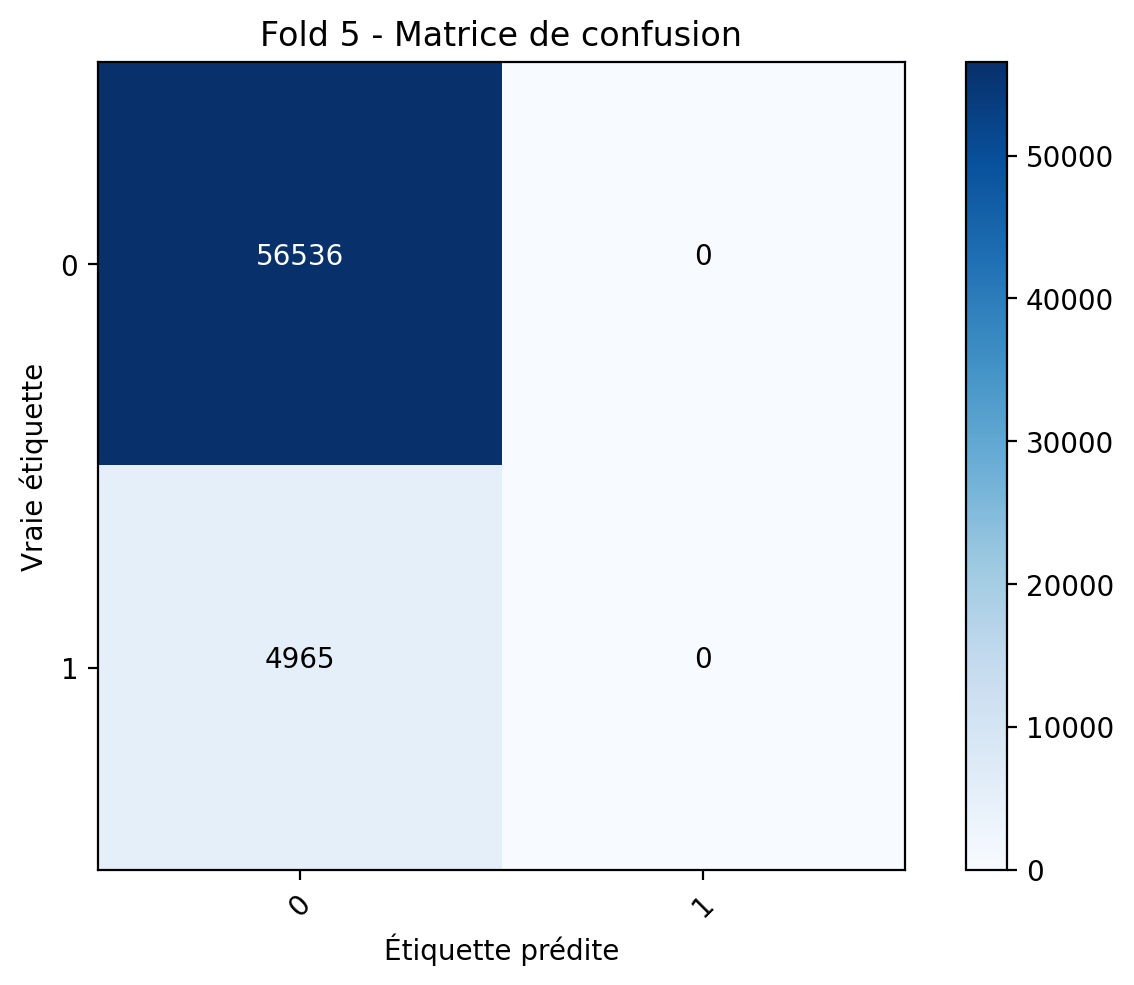

In [96]:
mlflow.set_experiment("no_sampling")
with mlflow.start_run(run_name = "DummyClassifier") as run:
    mlflow.sklearn.log_model(sk_model=no_sampling_pipeline,
                             artifact_path='',
                             registered_model_name='DummyClassifier')
    
    feature_importance_df = evaluate_stratifiedkfold('DummyClassifier', no_sampling_pipeline, X_train, y_train, features_importance=False)


## DummyClassifier avec smote

In [ ]:
mlflow.set_experiment("smote")
with mlflow.start_run(run_name = "DummyClassifier") as run:
    mlflow.sklearn.log_model(sk_model=smote_pipeline,
                             artifact_path='',
                             registered_model_name='DummyClassifier')
    
    evaluate_stratifiedkfold('DummyClassifier', smote_pipeline, X_train, y_train)


## DummyClassifier avec smoteenn

In [ ]:
mlflow.set_experiment("smoteenn")
with mlflow.start_run(run_name = "DummyClassifier") as run:
    mlflow.sklearn.log_model(sk_model=smoteenn_pipeline,
                             artifact_path='',
                             registered_model_name='DummyClassifier')
    
    evaluate_stratifiedkfold('DummyClassifier', smoteenn_pipeline, X_train, y_train)


## DummyClassifier avec smotetomek

In [ ]:
mlflow.set_experiment("smotetomek")
with mlflow.start_run(run_name = "DummyClassifier") as run:
    mlflow.sklearn.log_model(sk_model=smotetomek_pipeline,
                             artifact_path='',
                             registered_model_name='DummyClassifier')
    
    evaluate_stratifiedkfold('DummyClassifier', smotetomek_pipeline, X_train, y_train)


## DummyClassifier avec undersampling

In [ ]:
mlflow.set_experiment("undersampling")
with mlflow.start_run(run_name = "DummyClassifier") as run:
    mlflow.sklearn.log_model(sk_model=undersampling_pipeline,
                             artifact_path='',
                             registered_model_name='DummyClassifier')
    
    evaluate_stratifiedkfold('DummyClassifier', undersampling_pipeline, X_train, y_train)


# LogisticRegression

## Pipeline

In [ ]:
no_sampling_pipeline = Pipeline([('std', StandardScaler()), ('model', LogisticRegression(random_state=42))])
smote_pipeline = Pipeline([('std', StandardScaler()),('smote', SMOTE(random_state=42)),
                           ('model', LogisticRegression(random_state=42))])
smoteenn_pipeline = Pipeline([('std', StandardScaler()), ('smoteenn', SMOTEENN(random_state=42)),
                              ('model', LogisticRegression(random_state=42))])
smotetomek_pipeline = Pipeline([('std', StandardScaler()), ('smotetomek', SMOTETomek(random_state=42)),
                                ('model', LogisticRegression(random_state=42))])
undersampling_pipeline = Pipeline([('std', StandardScaler()), ('undersampling', RandomUnderSampler(random_state=42)),
                                ('model', LogisticRegression(random_state=42))])

## LogisticRegression no_sampling

In [ ]:
mlflow.set_experiment("no_sampling")
with mlflow.start_run(run_name = "LogisticRegression") as run:
    mlflow.sklearn.log_model(sk_model=no_sampling_pipeline,
                             artifact_path='',
                             registered_model_name='LogisticRegression')
    
    evaluate_stratifiedkfold('LogisticRegression', no_sampling_pipeline, X_train, y_train,
                                                 features_importance=False)


## LogisticRegression smote

In [ ]:
mlflow.set_experiment("smote")
with mlflow.start_run(run_name = "LogisticRegression") as run:
    mlflow.sklearn.log_model(sk_model=smote_pipeline,
                             artifact_path='',
                             registered_model_name='LogisticRegression')
    
    evaluate_stratifiedkfold('LogisticRegression', smote_pipeline, X_train, y_train,
                                                 features_importance=False)


## LogisticRegression smoteenn

In [ ]:
mlflow.set_experiment("smoteenn")
with mlflow.start_run(run_name = "LogisticRegression") as run:
    mlflow.sklearn.log_model(sk_model=smoteenn_pipeline,
                             artifact_path='',
                             registered_model_name='LogisticRegression')
    
    evaluate_stratifiedkfold('LogisticRegression', smoteenn_pipeline, X_train, y_train,
                                                 features_importance=False)


## LogisticRegression smotetomek

In [ ]:
mlflow.set_experiment("smotetomek")
with mlflow.start_run(run_name = "LogisticRegression") as run:
    mlflow.sklearn.log_model(sk_model=smotetomek_pipeline,
                             artifact_path='',
                             registered_model_name='LogisticRegression')
    
    evaluate_stratifiedkfold('LogisticRegression', smotetomek_pipeline, X_train, y_train,
                                                 features_importance=False)


## LogisticRegression undersampling

In [ ]:
mlflow.set_experiment("undersampling")
with mlflow.start_run(run_name = "LogisticRegression") as run:
    mlflow.sklearn.log_model(sk_model=undersampling_pipeline,
                             artifact_path='',
                             registered_model_name='LogisticRegression')
    
    evaluate_stratifiedkfold('LogisticRegression', undersampling_pipeline, X_train, y_train,
                                                 features_importance=False)

# AdaBoostClassifier

## Pipeline

In [ ]:
no_oversampling_pipeline = Pipeline([('std', StandardScaler()), ('model', AdaBoostClassifier(random_state=42))])
smote_pipeline = Pipeline([('std', StandardScaler()),('smote', SMOTE(random_state=42)),
                           ('model', AdaBoostClassifier(random_state=42))])
smoteenn_pipeline = Pipeline([('std', StandardScaler()), ('smoteenn', SMOTEENN(random_state=42)),
                              ('model', AdaBoostClassifier(random_state=42))])
smotetomek_pipeline = Pipeline([('std', StandardScaler()), ('smotetomek', SMOTETomek(random_state=42)),
                                ('model', AdaBoostClassifier(random_state=42))])
undersampling_pipeline = Pipeline([('std', StandardScaler()), ('undersampling', RandomUnderSampler(random_state=42)),
                                ('model', AdaBoostClassifier(random_state=42))])

## AdaBoostClassifier no_sampling

In [ ]:
mlflow.set_experiment("no_sampling")
with mlflow.start_run(run_name = "AdaBoostClassifier") as run:
    mlflow.sklearn.log_model(sk_model=no_sampling_pipeline,
                             artifact_path='',
                             registered_model_name='AdaBoostClassifier')
    
    evaluate_stratifiedkfold('AdaBoostClassifier', no_sampling_pipeline, X_train, y_train,
                                                 features_importance=True)


## AdaBoostClassifier smote

In [ ]:
mlflow.set_experiment("smote")
with mlflow.start_run(run_name = "AdaBoostClassifier") as run:
    mlflow.sklearn.log_model(sk_model= smote_pipeline,
                             artifact_path='',
                             registered_model_name='AdaBoostClassifier')
    
    evaluate_stratifiedkfold('AdaBoostClassifier', smote_pipeline, X_train, y_train,
                                                 features_importance=True)


## AdaBoostClassifier smoteenn

In [ ]:
mlflow.set_experiment("smoteenn")
with mlflow.start_run(run_name = "AdaBoostClassifier") as run:
    mlflow.sklearn.log_model(sk_model= smoteenn_pipeline,
                             artifact_path='',
                             registered_model_name='AdaBoostClassifier')
    
    evaluate_stratifiedkfold('AdaBoostClassifier', smoteenn_pipeline, X_train, y_train,
                                                 features_importance=True)


In [ ]:
display_importances(feature_importance_df)

## AdaBoostClassifier smotetomek

In [ ]:
mlflow.set_experiment("smotetomek")
with mlflow.start_run(run_name = "AdaBoostClassifier") as run:
    mlflow.sklearn.log_model(sk_model= smotetomek_pipeline,
                             artifact_path='',
                             registered_model_name='AdaBoostClassifier')
    
    feature_importance_df = evaluate_stratifiedkfold('AdaBoostClassifier', smotetomek_pipeline, X_train, y_train,
                                                 features_importance=True)

## AdaBoostClassifier undersampling

In [ ]:
mlflow.set_experiment("undersampling")
with mlflow.start_run(run_name = "AdaBoostClassifier") as run:
    mlflow.sklearn.log_model(sk_model= undersampling_pipeline,
                             artifact_path='',
                             registered_model_name='AdaBoostClassifier')
    
    evaluate_stratifiedkfold('AdaBoostClassifier', undersampling_pipeline, X_train, y_train)

# LGBMClassifier

## Pipeline

In [97]:
no_sampling_pipeline = Pipeline([('std', StandardScaler()), ('model', LGBMClassifier(random_state=42))])
smote_pipeline = Pipeline([('std', StandardScaler()),('smote', SMOTE(random_state=42)),
                           ('model', LGBMClassifier(random_state=42))])
smoteenn_pipeline = Pipeline([('std', StandardScaler()), ('smoteenn', SMOTEENN(random_state=42)),
                              ('model', LGBMClassifier(random_state=42))])
smotetomek_pipeline = Pipeline([('std', StandardScaler()), ('smotetomek', SMOTETomek(random_state=42)),
                                ('model', LGBMClassifier(random_state=42))])
undersampling_pipeline = Pipeline([('std', StandardScaler()), ('undersampling', RandomUnderSampler(random_state=42)),
                                ('model', LGBMClassifier(random_state=42))])

## LGBMClassifier no_sampling

In [ ]:
mlflow.set_experiment("no_sampling")
with mlflow.start_run(run_name = "LGBMClassifier") as run:
    mlflow.sklearn.log_model(sk_model= no_sampling_pipeline,
                             artifact_path='',
                             registered_model_name='LGBMClassifier')
    
    feature_importance_df = evaluate_stratifiedkfold('LGBMClassifier', no_sampling_pipeline, X_train, y_train,
                                                 features_importance=True)

## LGBMClassifier smote

In [ ]:
mlflow.set_experiment("smote")
with mlflow.start_run(run_name = "LGBMClassifier") as run:
    mlflow.sklearn.log_model(sk_model= smote_pipeline,
                             artifact_path='',
                             registered_model_name='LGBMClassifier')
    
    feature_importance_df = evaluate_stratifiedkfold('LGBMClassifier', smote_pipeline, X_train, y_train,
                                                 features_importance=True)

## LGBMClassifier smoteenn

In [ ]:
mlflow.set_experiment("smoteenn")
with mlflow.start_run(run_name = "LGBMClassifier") as run:
    mlflow.sklearn.log_model(sk_model= smoteenn_pipeline,
                             artifact_path='',
                             registered_model_name='LGBMClassifier')
    
    feature_importance_df = evaluate_stratifiedkfold('LGBMClassifier', smoteenn_pipeline, X_train, y_train,
                                                 features_importance=True)

In [ ]:
display_importances(feature_importance_df)

## LGBMClassifier smotetomek

In [ ]:
mlflow.set_experiment("smotetomek")
with mlflow.start_run(run_name = "LGBMClassifier") as run:
    mlflow.sklearn.log_model(sk_model= smotetomek_pipeline,
                             artifact_path='',
                             registered_model_name='LGBMClassifier')
    
    feature_importance_df = evaluate_stratifiedkfold('LGBMClassifier', smotetomek_pipeline, X_train, y_train,
                                                 features_importance=True)

## LGBMClassifier undersampling

Registered model 'LGBMClassifier' already exists. Creating a new version of this model...
2023/03/27 19:57:01 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: LGBMClassifier, version 6
Created version '6' of model 'LGBMClassifier'.


LGBMClassifier stratified


<Figure size 640x480 with 0 Axes>

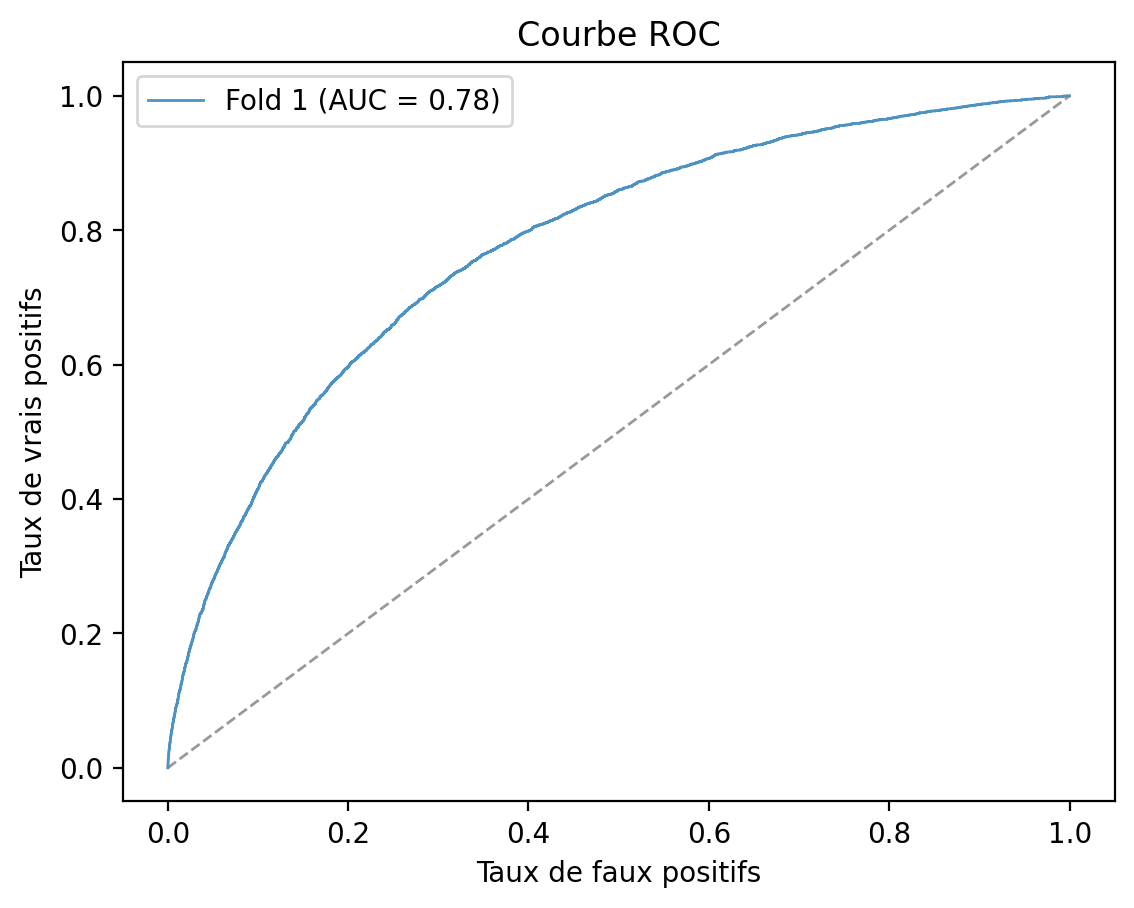

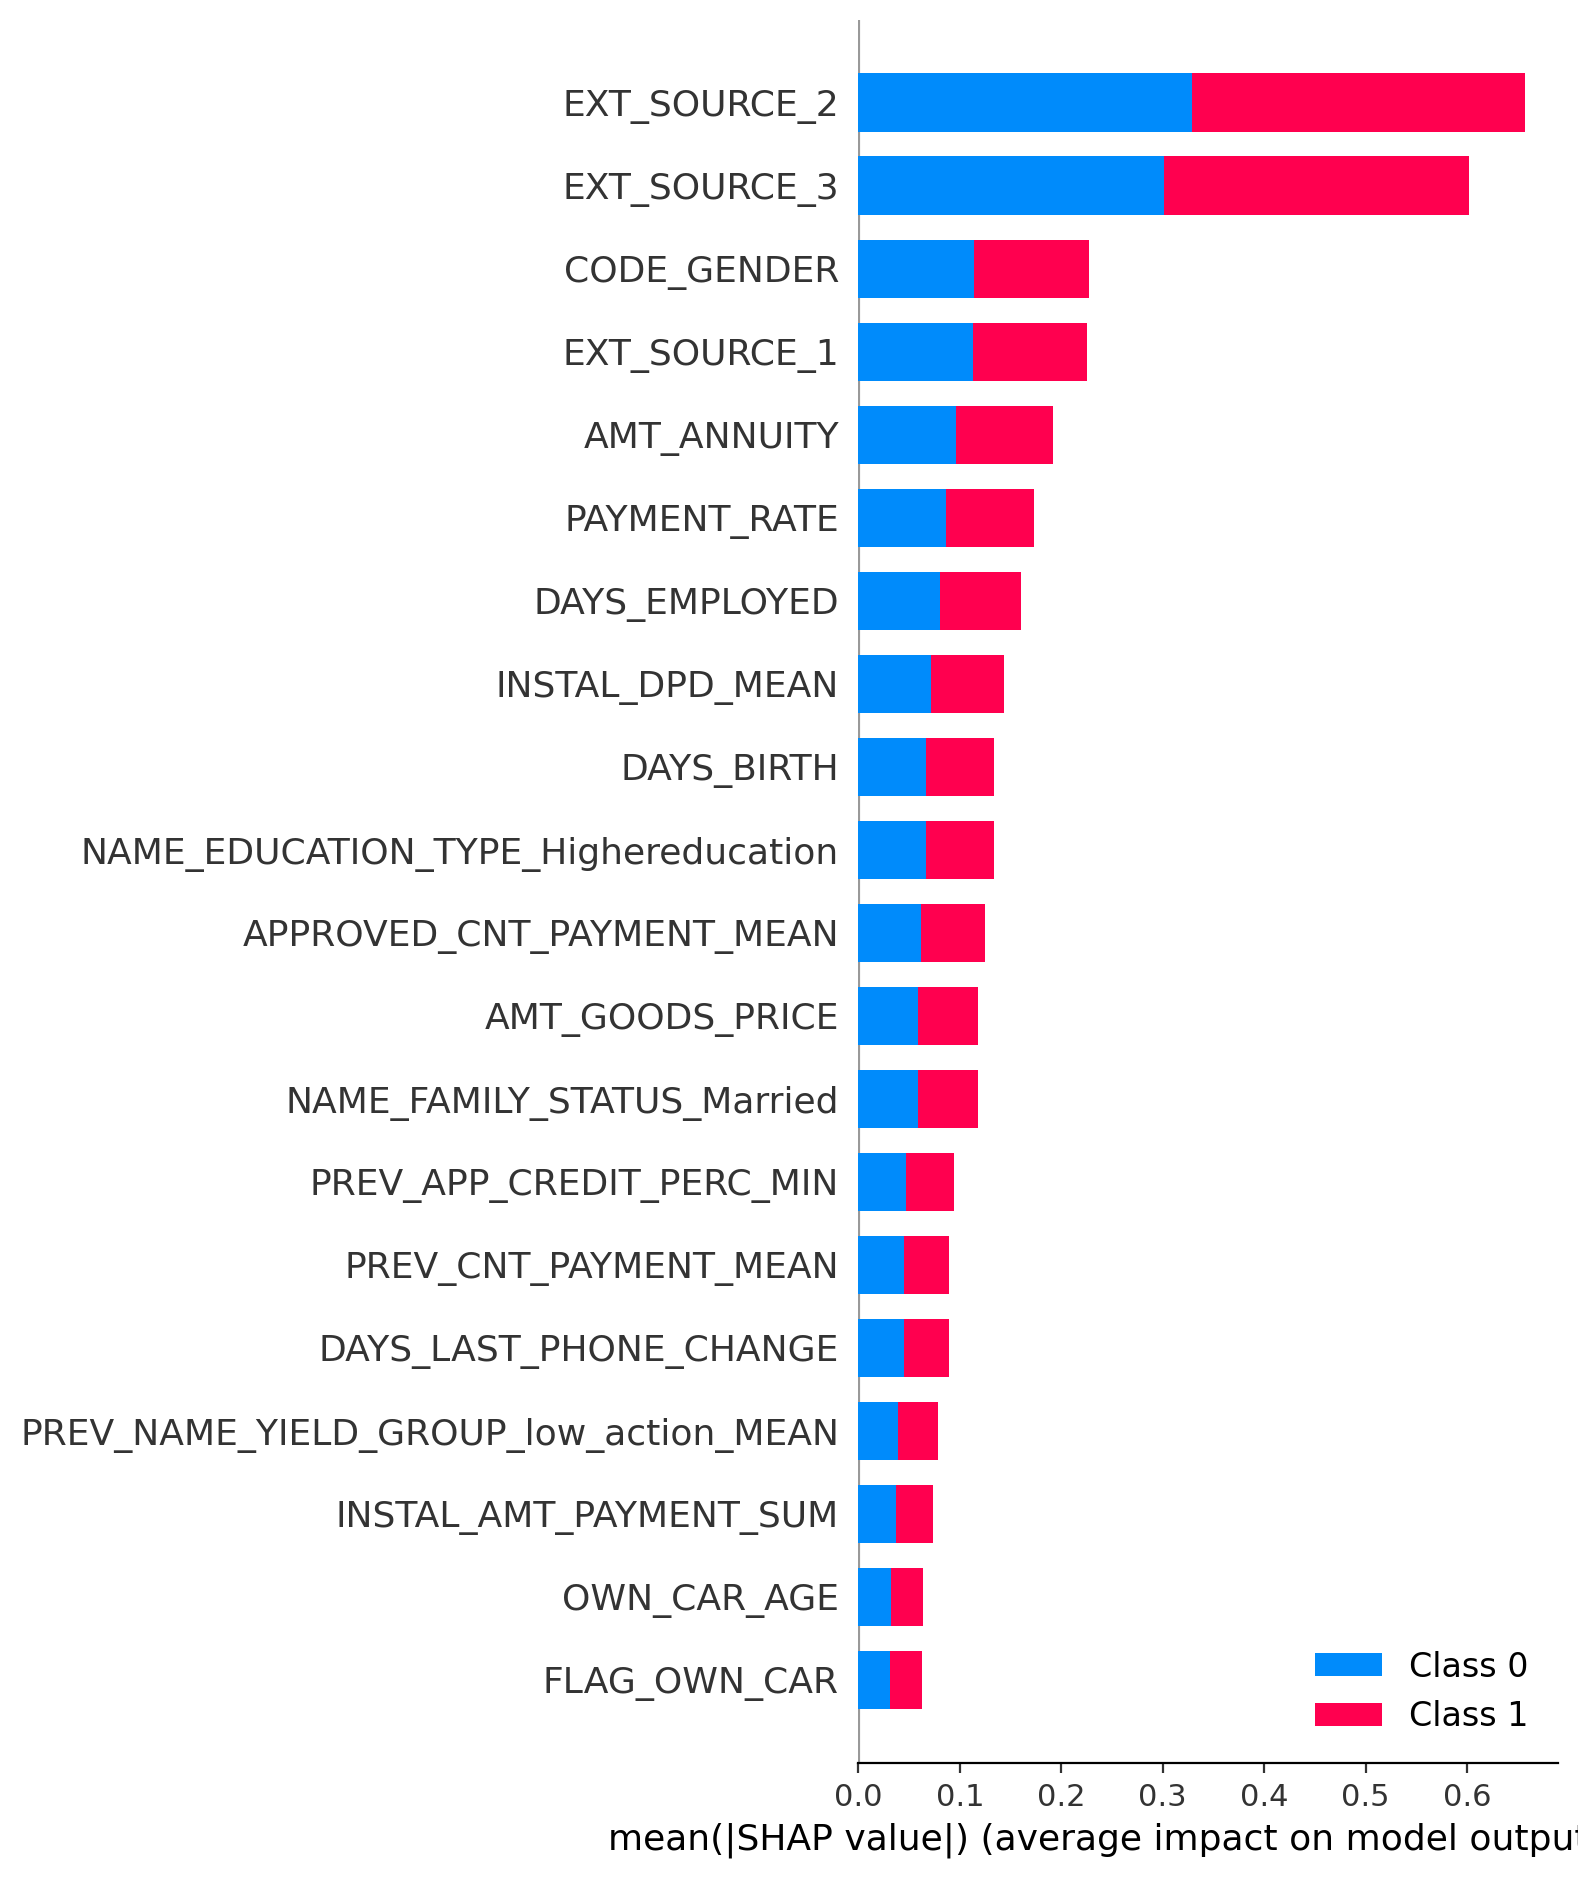

Fold 1: roc_auc_score=0.7760, recall=0.7106, precision=0.1757, f1=0.2818, accuracy=0.7076


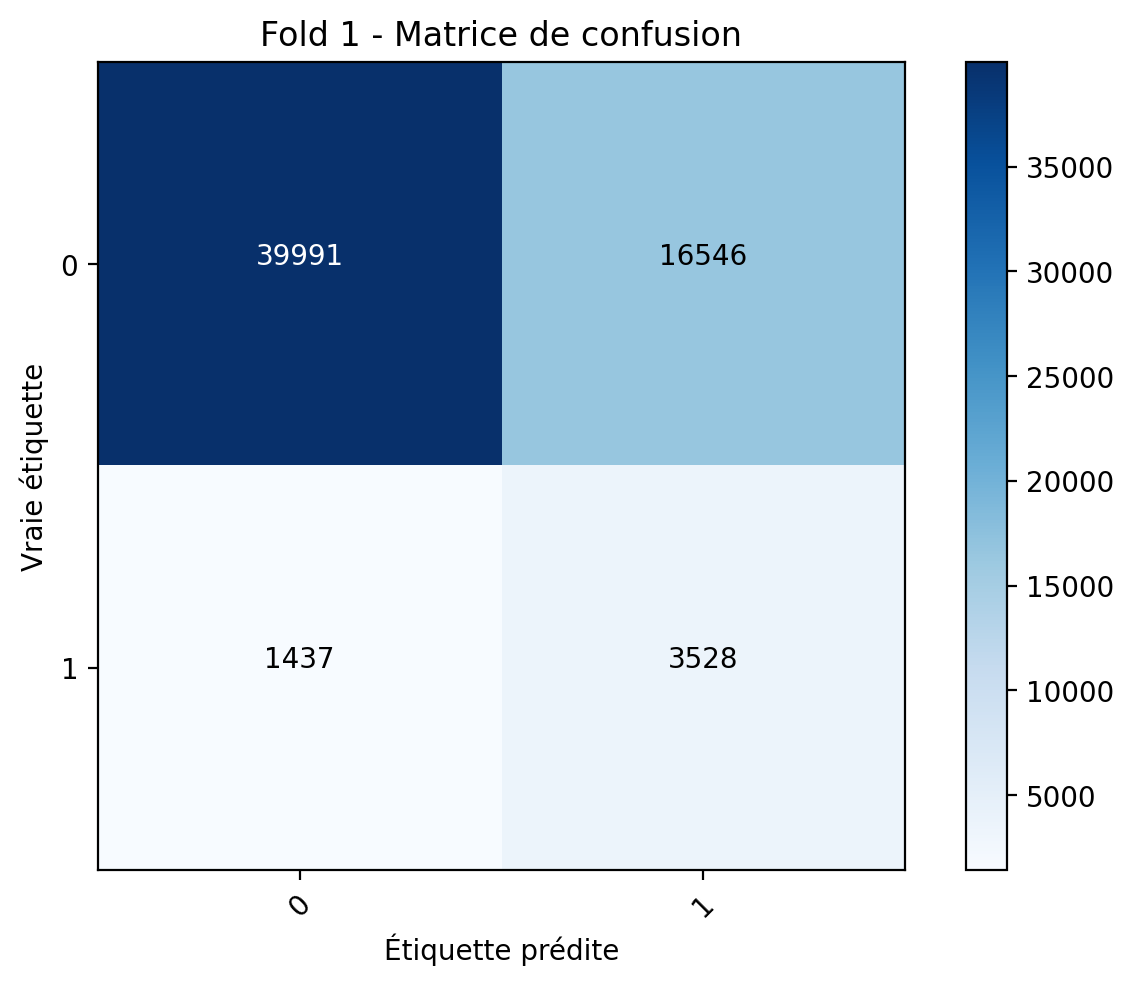

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

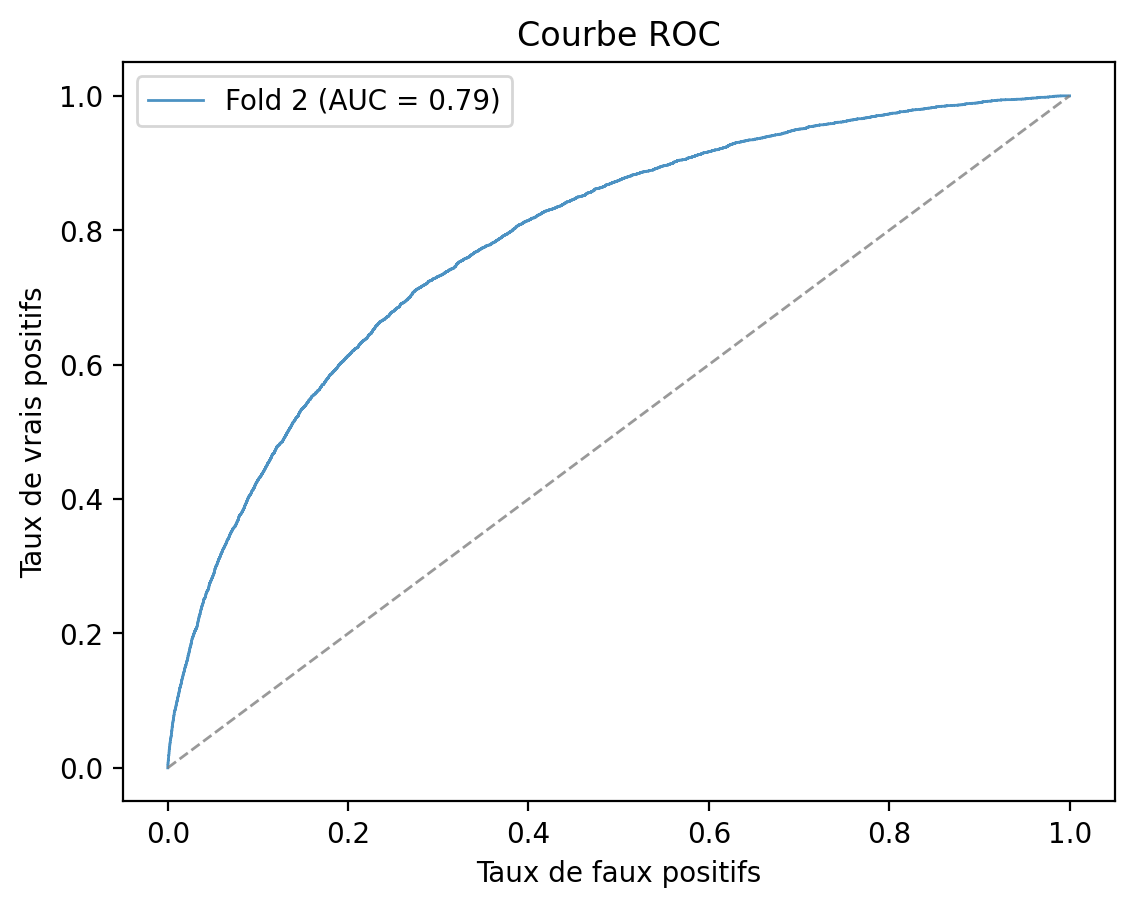

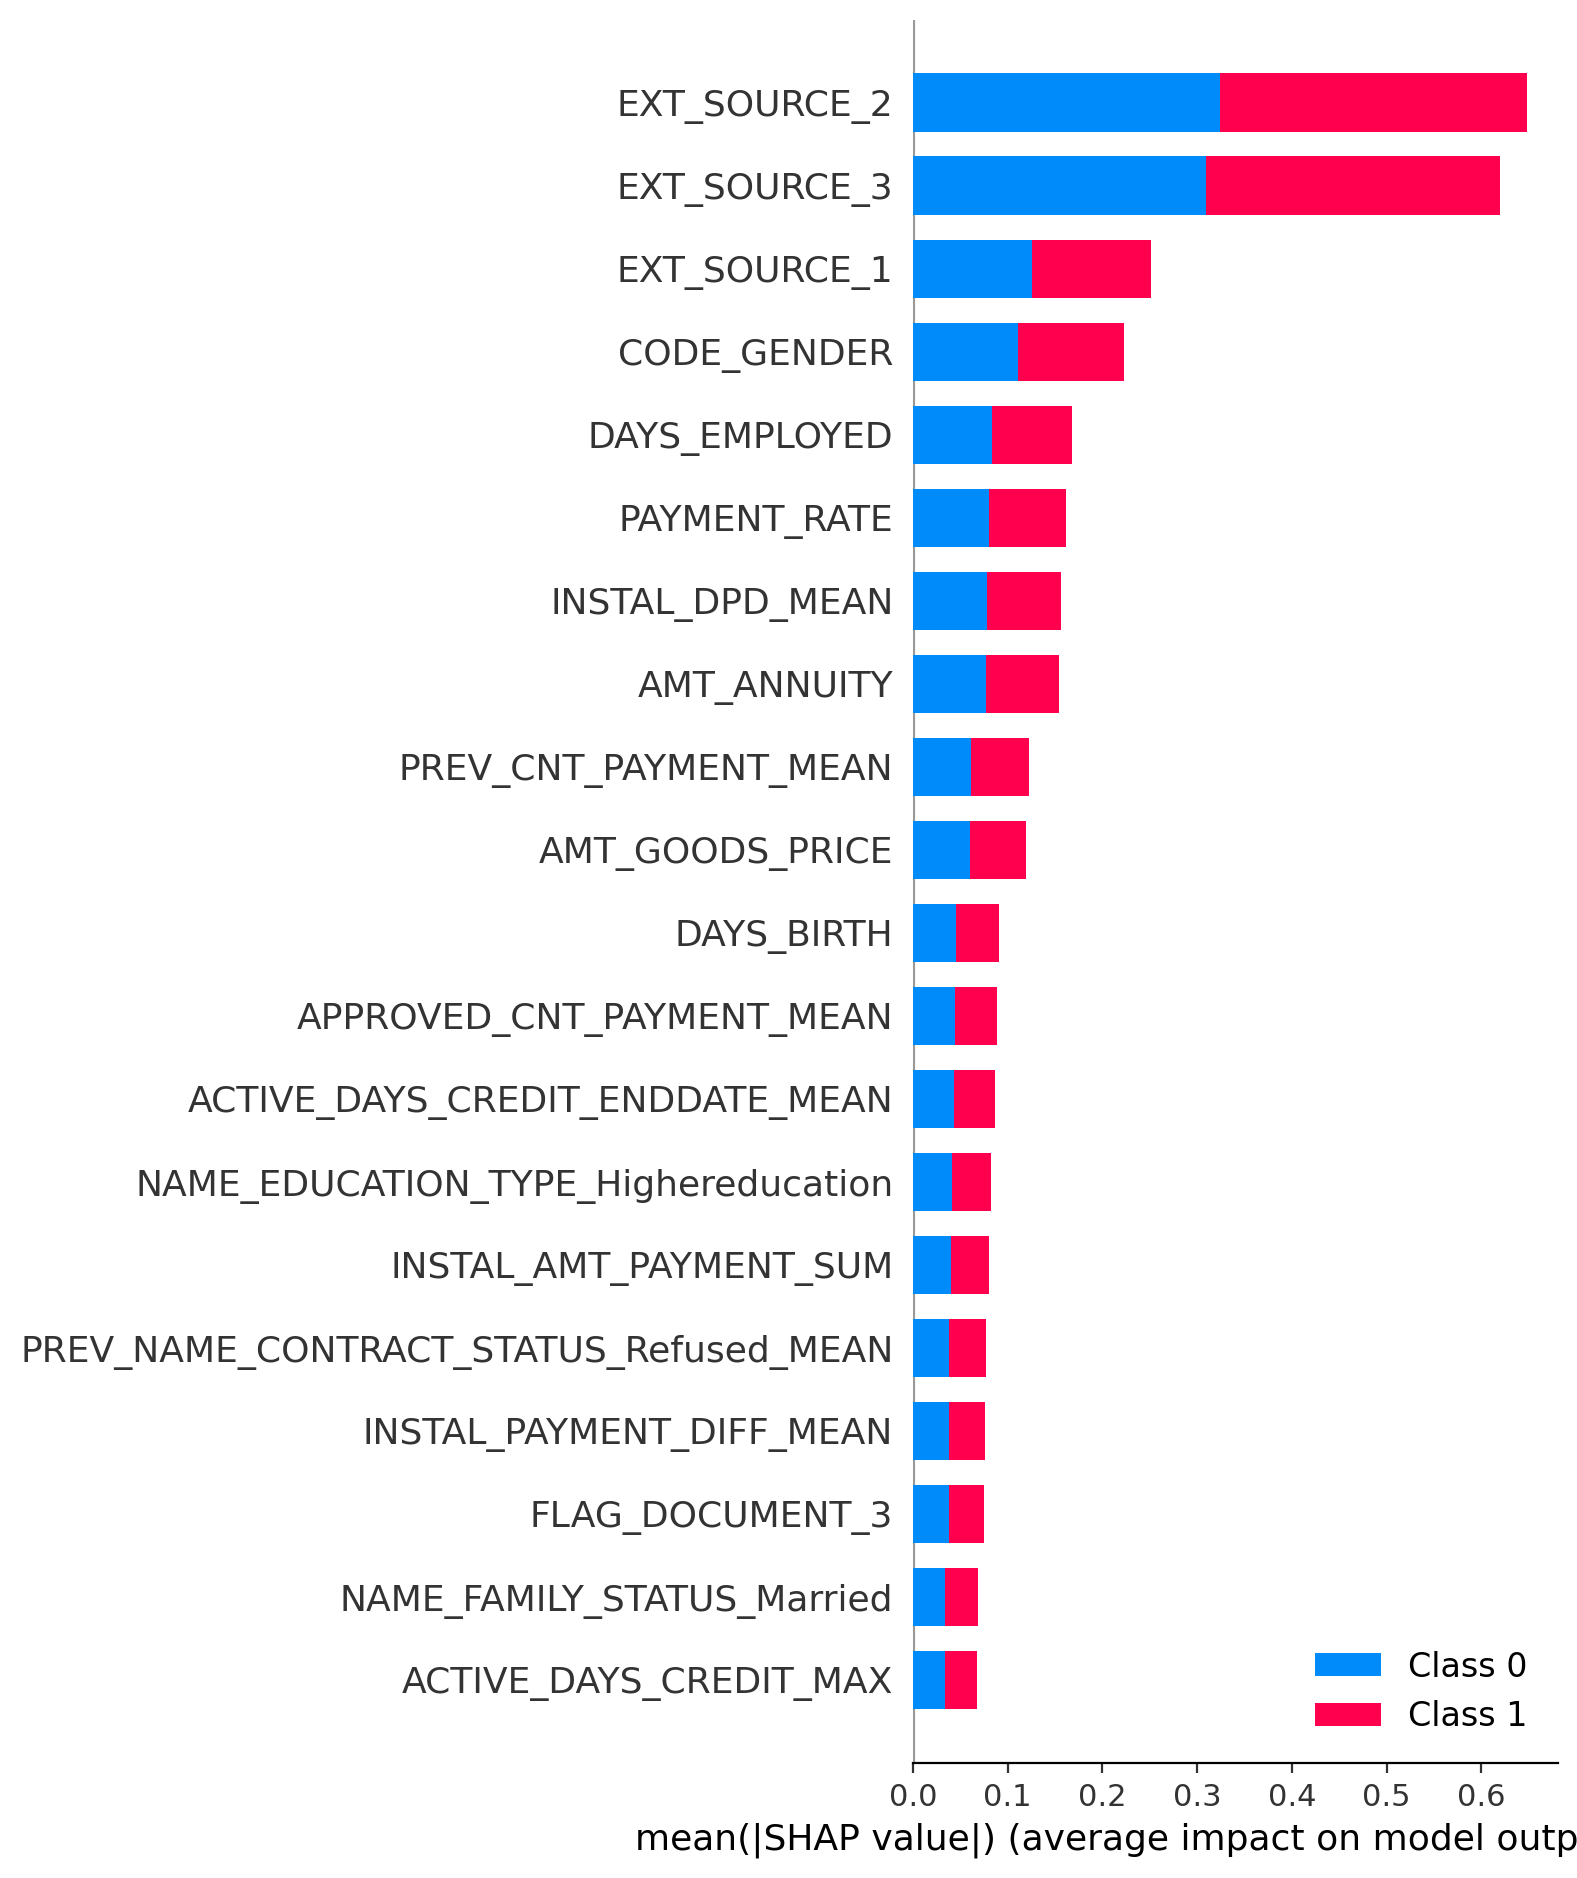

Fold 2: roc_auc_score=0.7862, recall=0.7221, precision=0.1802, f1=0.2885, accuracy=0.7124


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

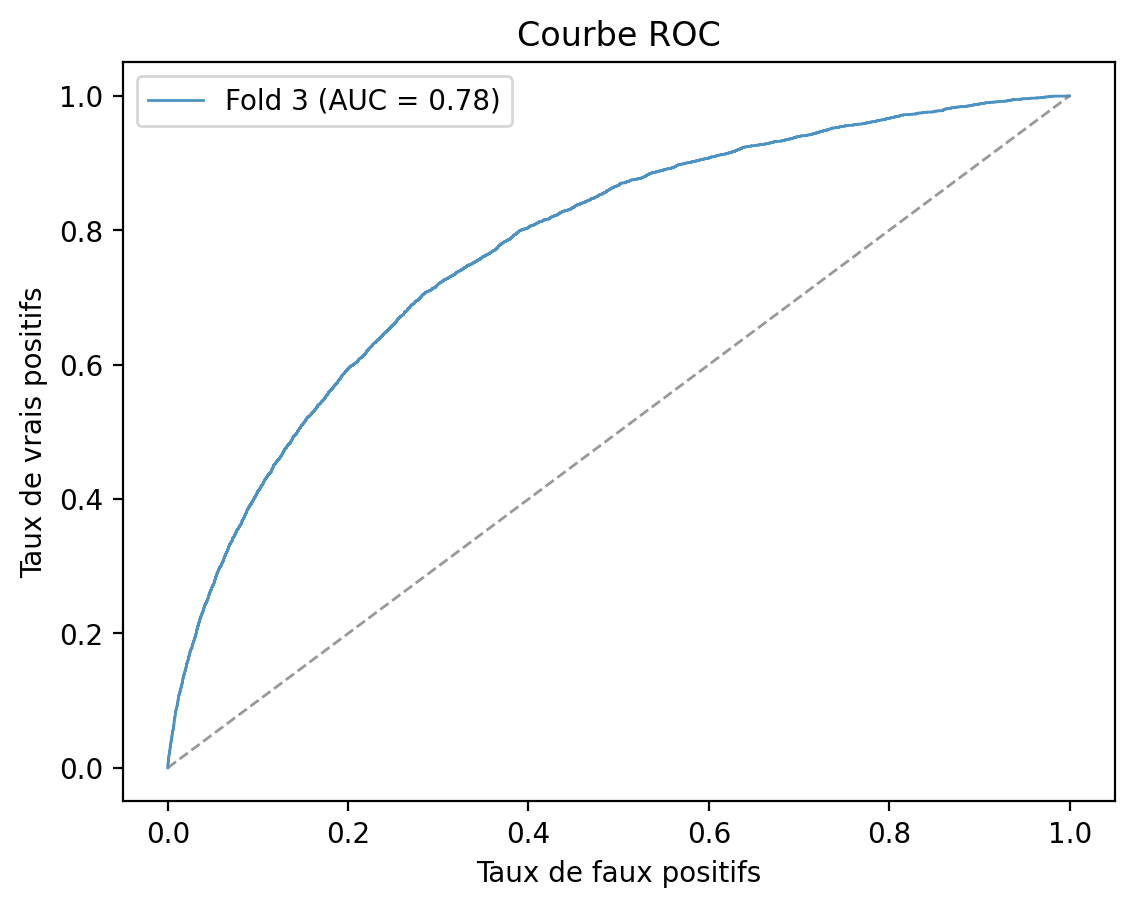

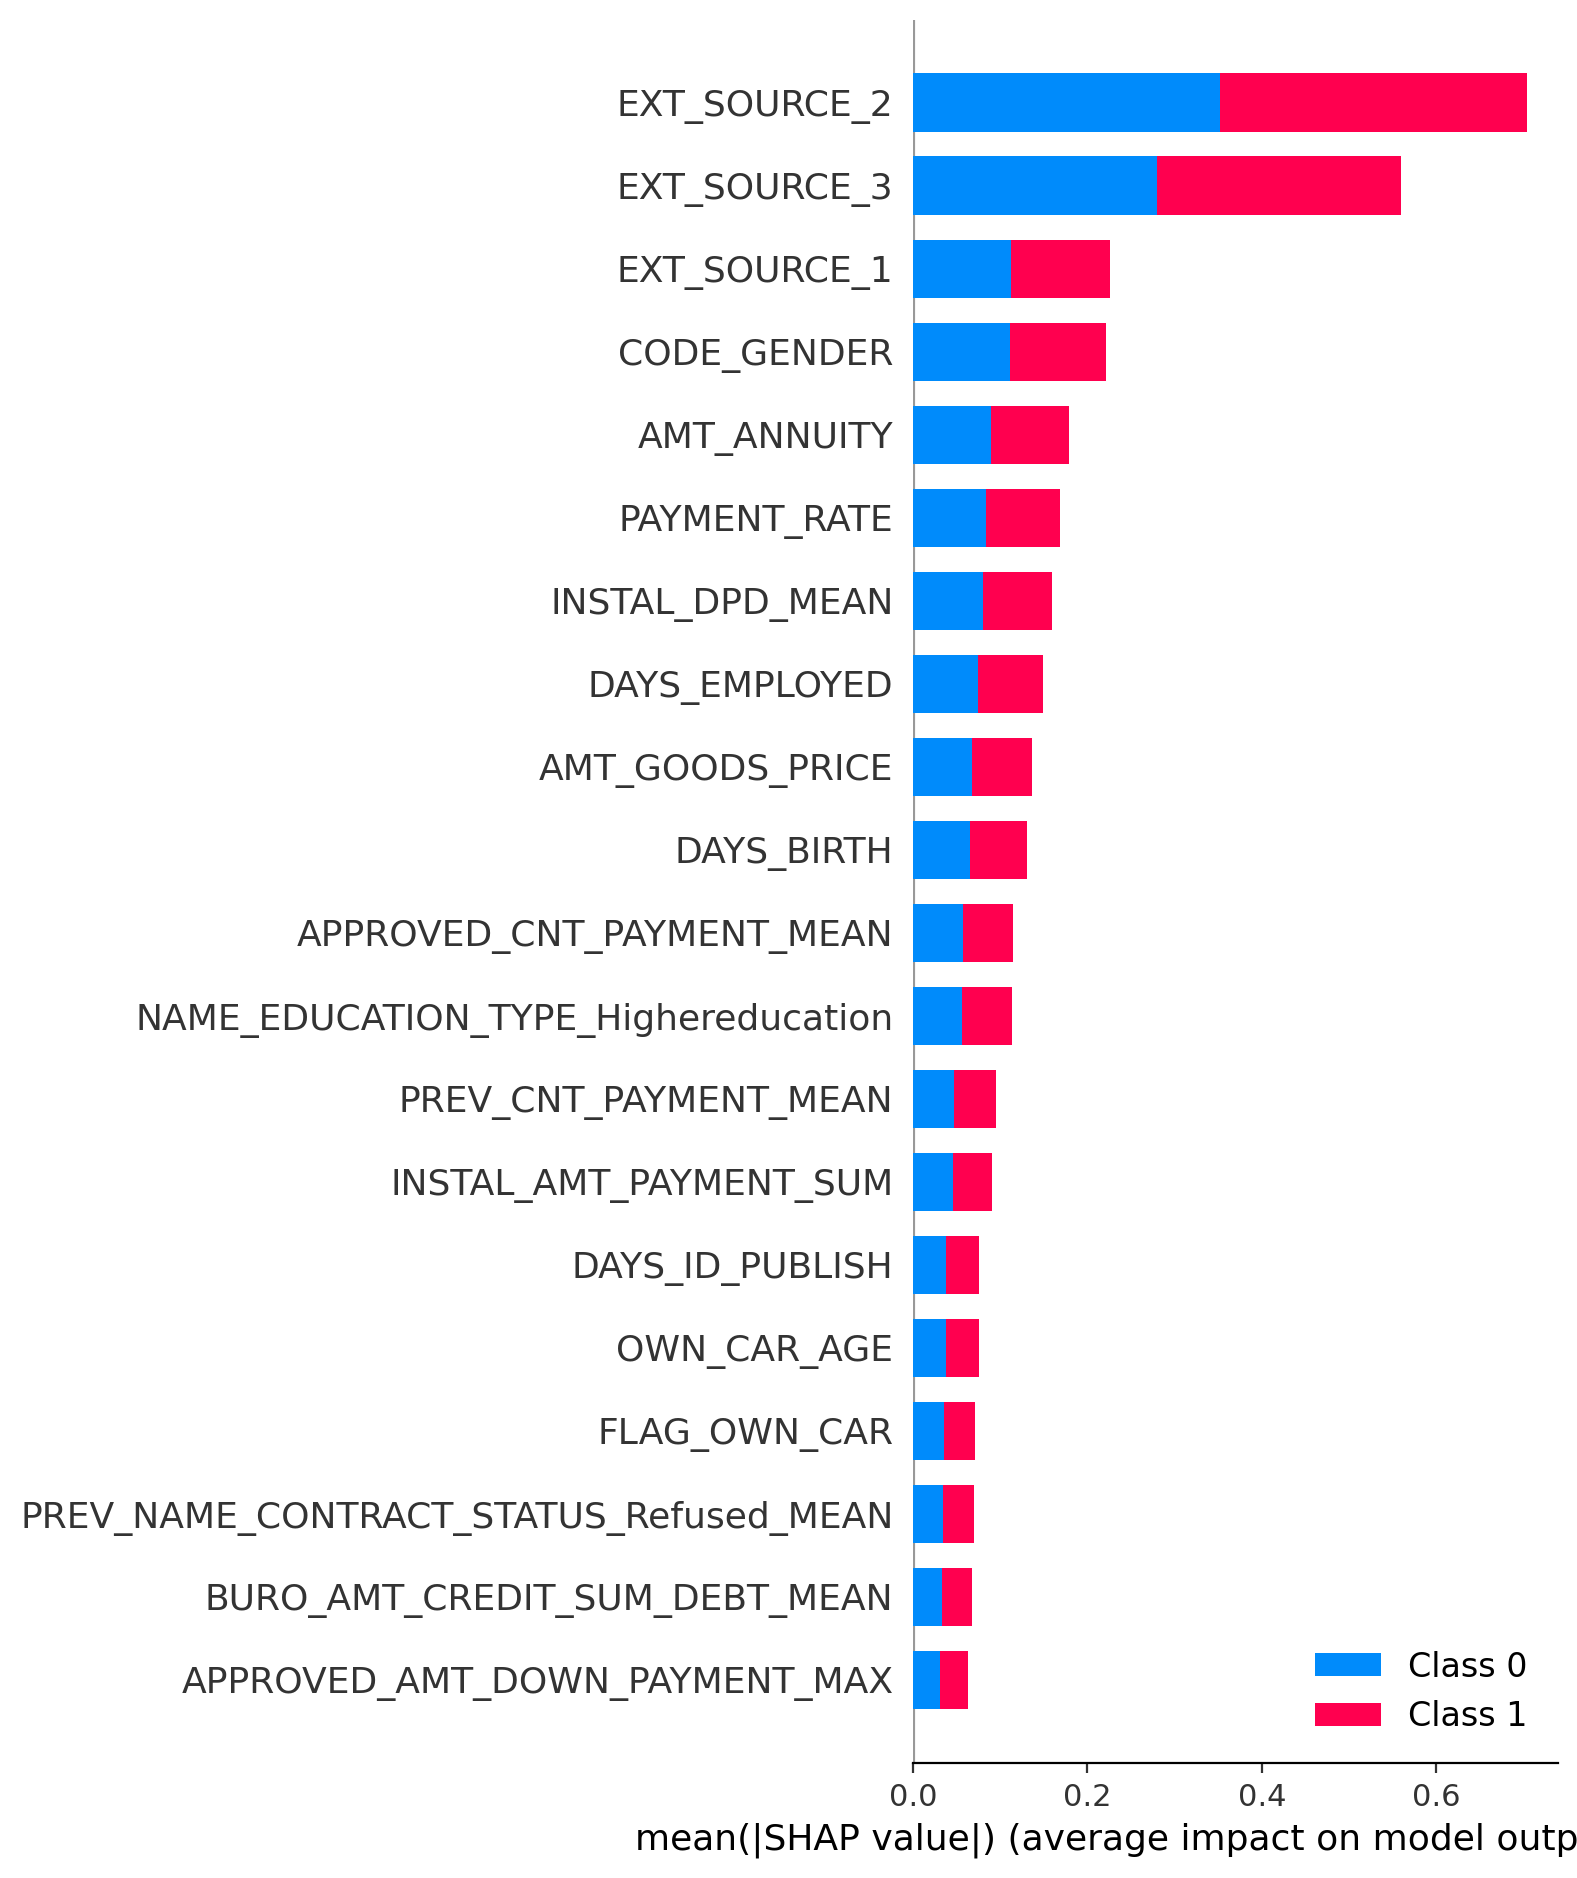

Fold 3: roc_auc_score=0.7758, recall=0.7114, precision=0.1759, f1=0.2821, accuracy=0.7077


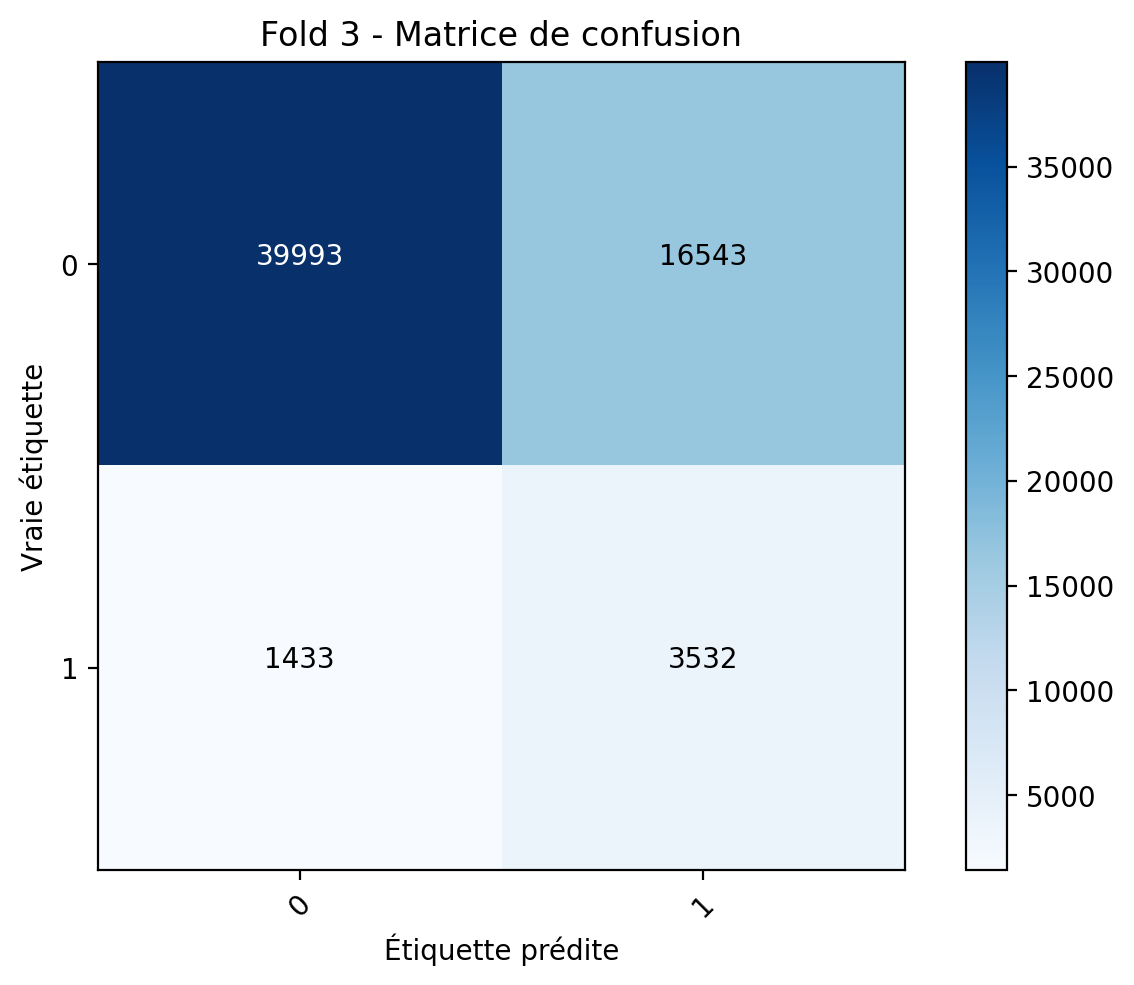

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

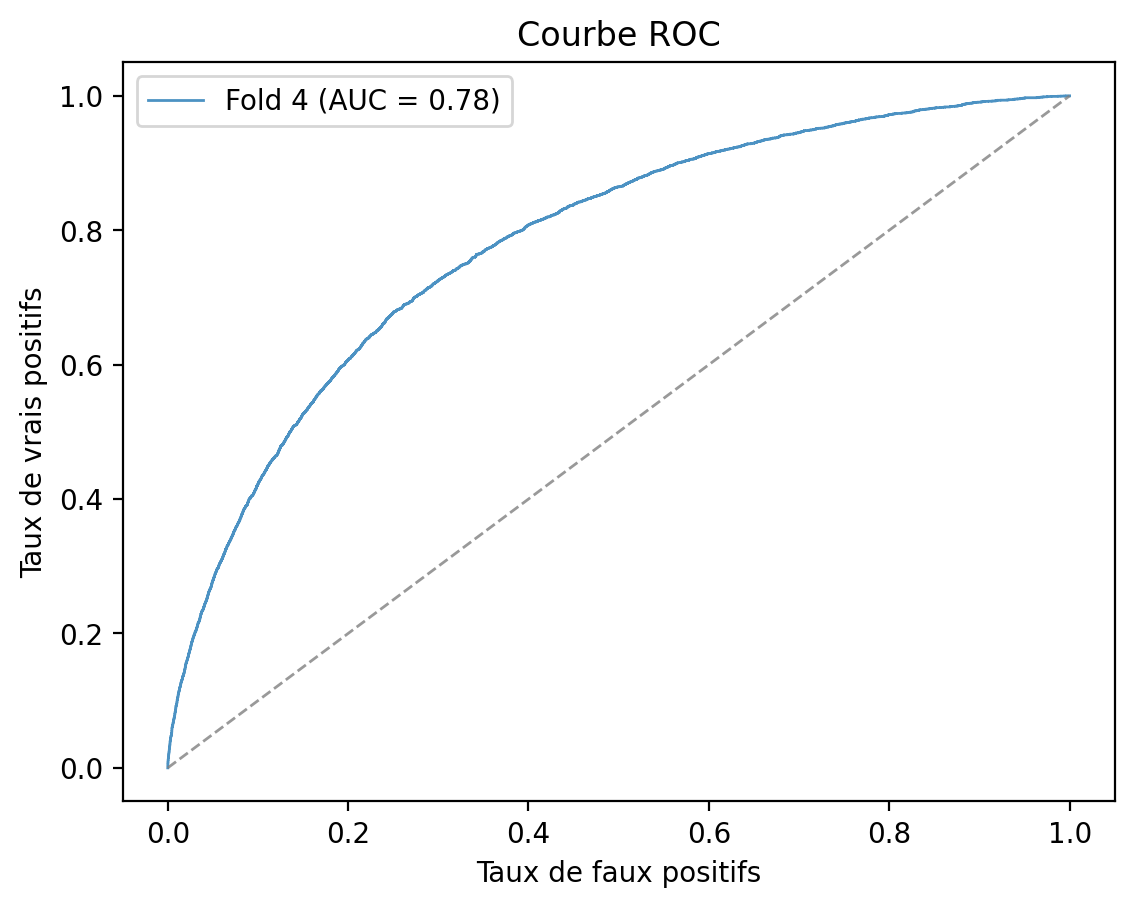

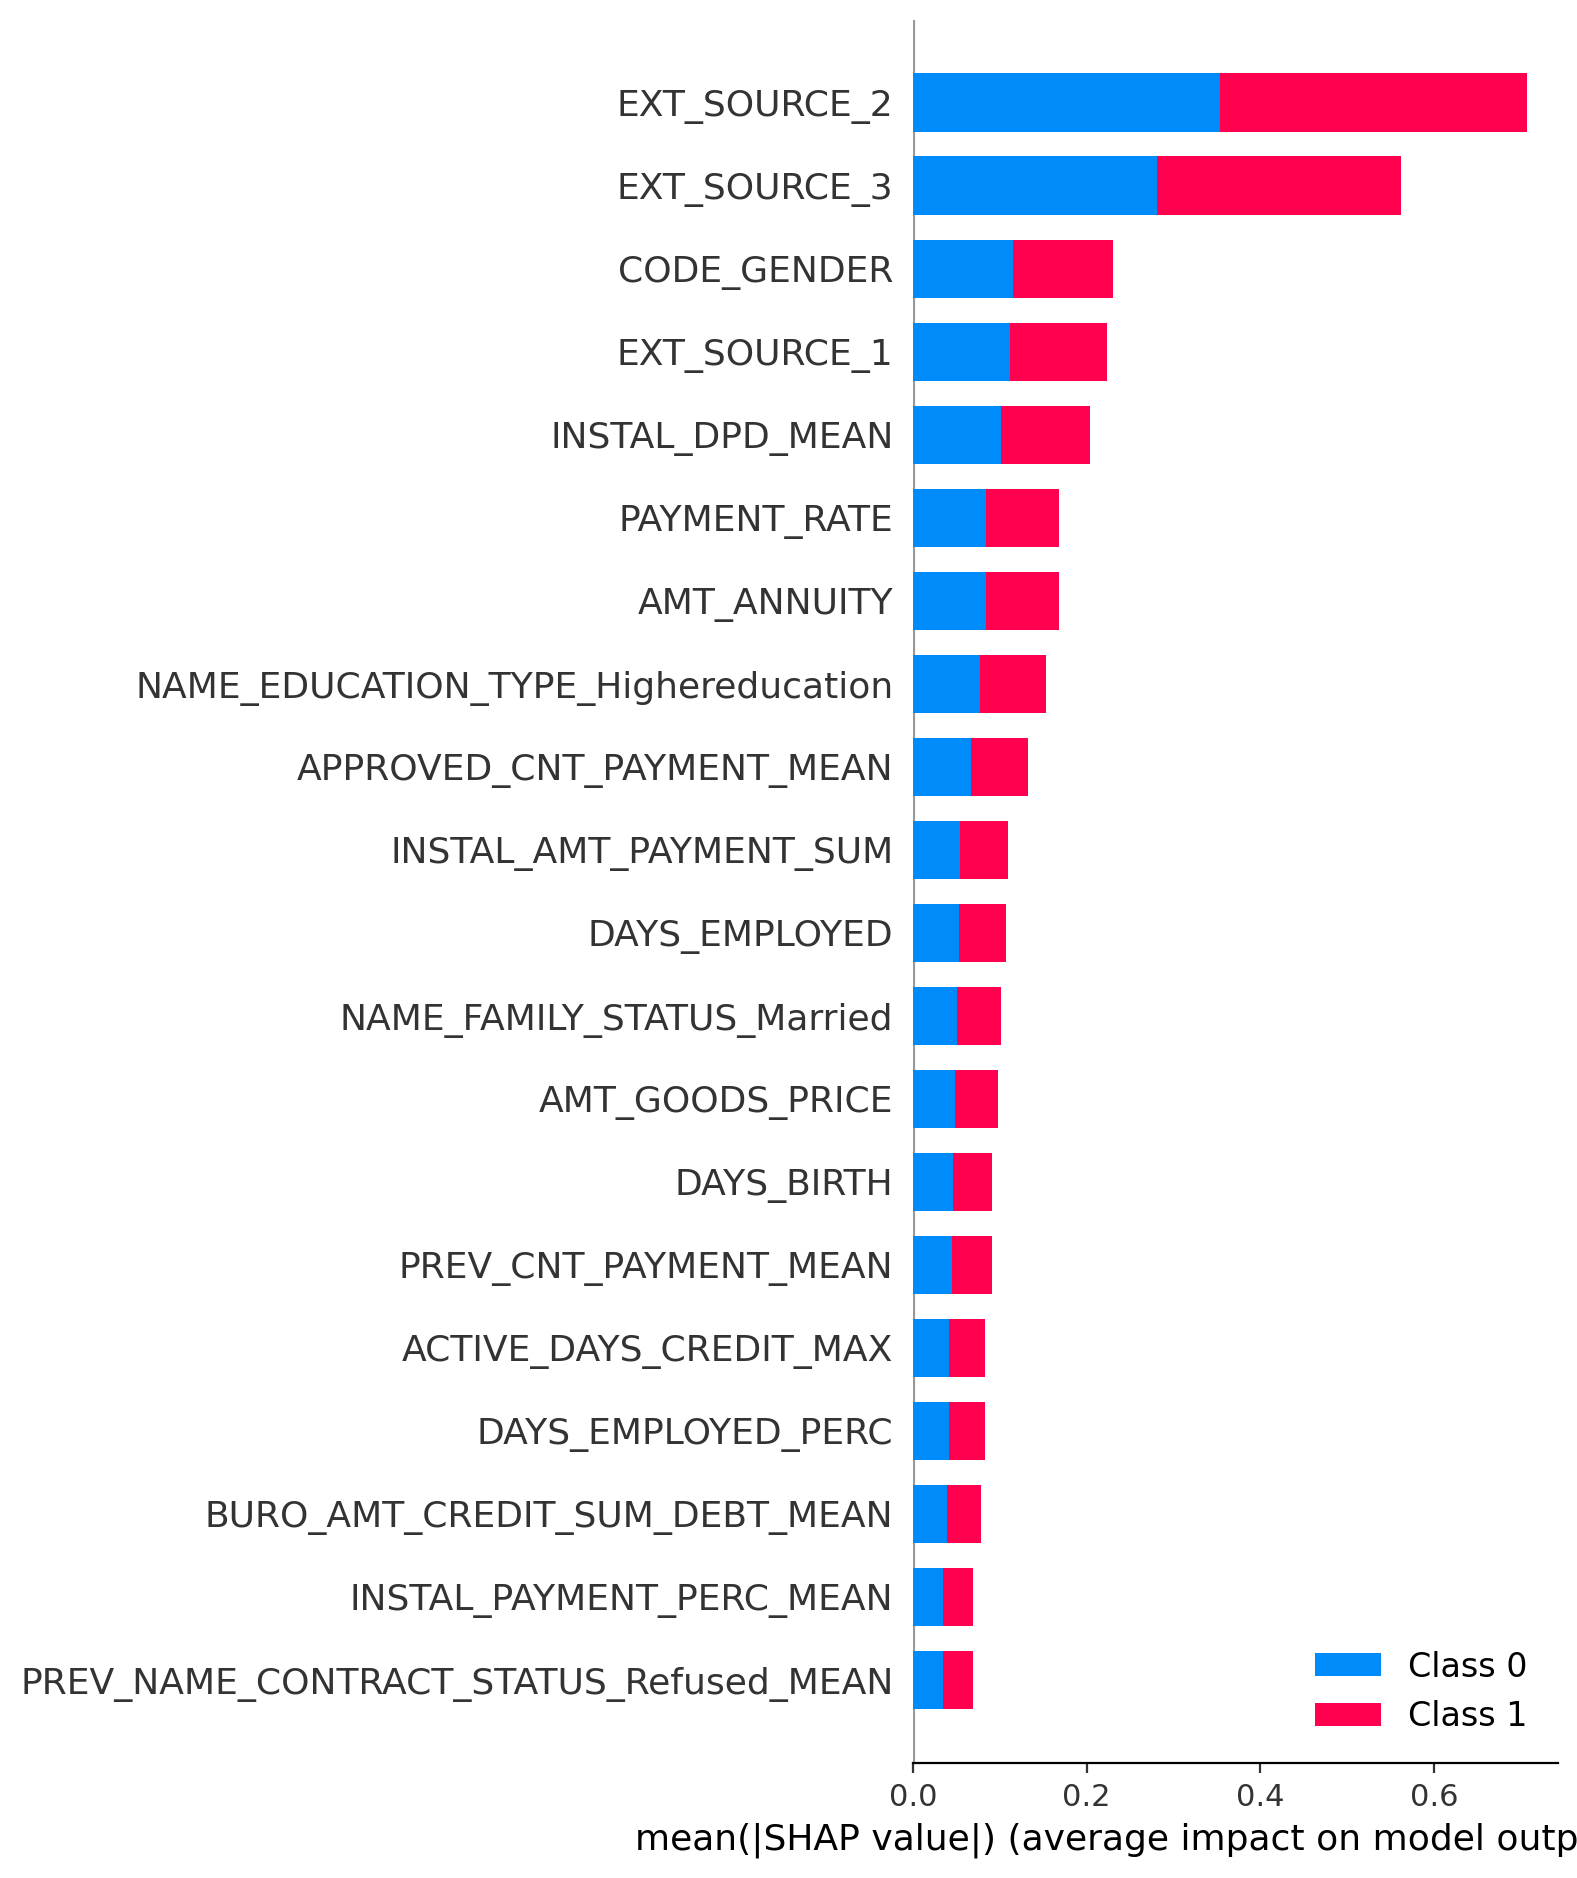

Fold 4: roc_auc_score=0.7816, recall=0.7126, precision=0.1790, f1=0.2861, accuracy=0.7129


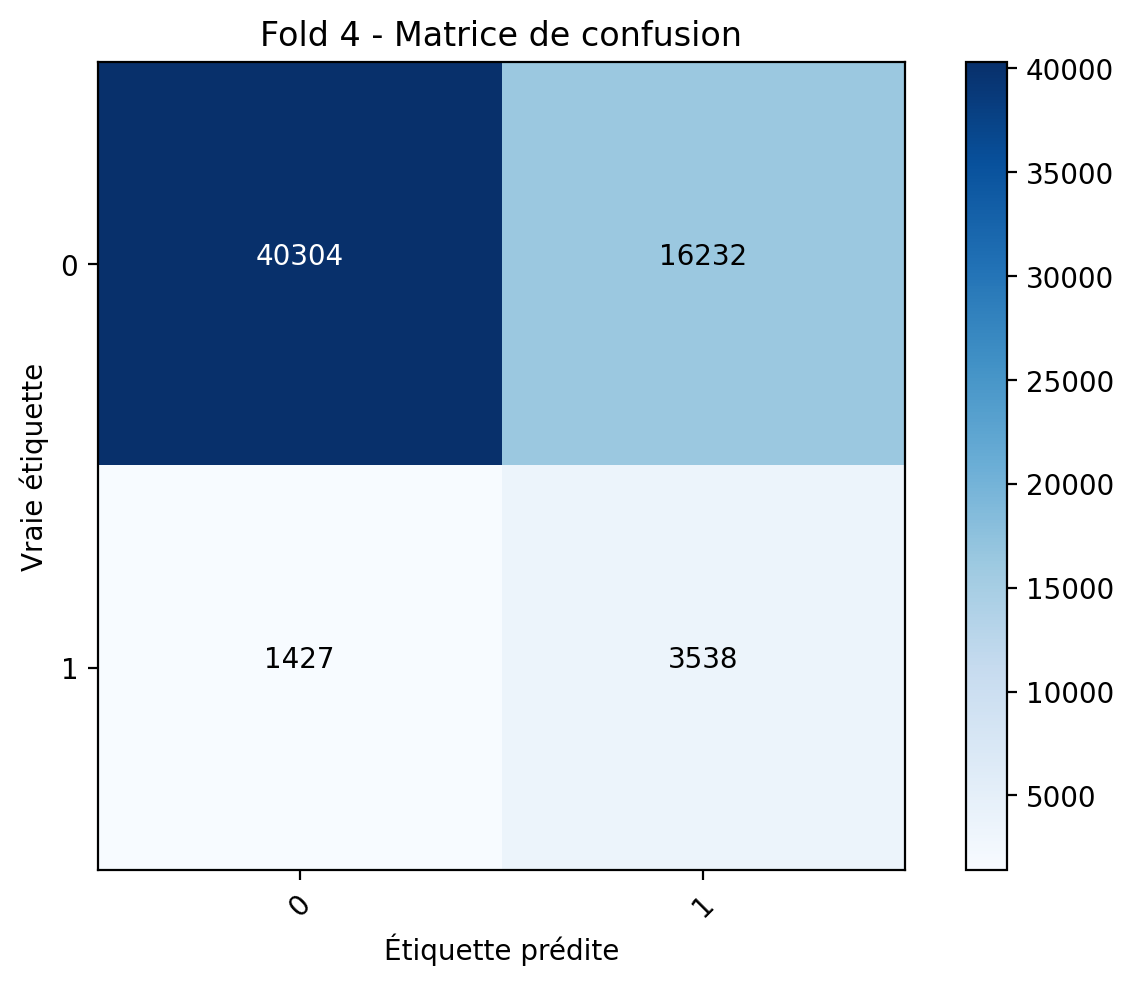

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

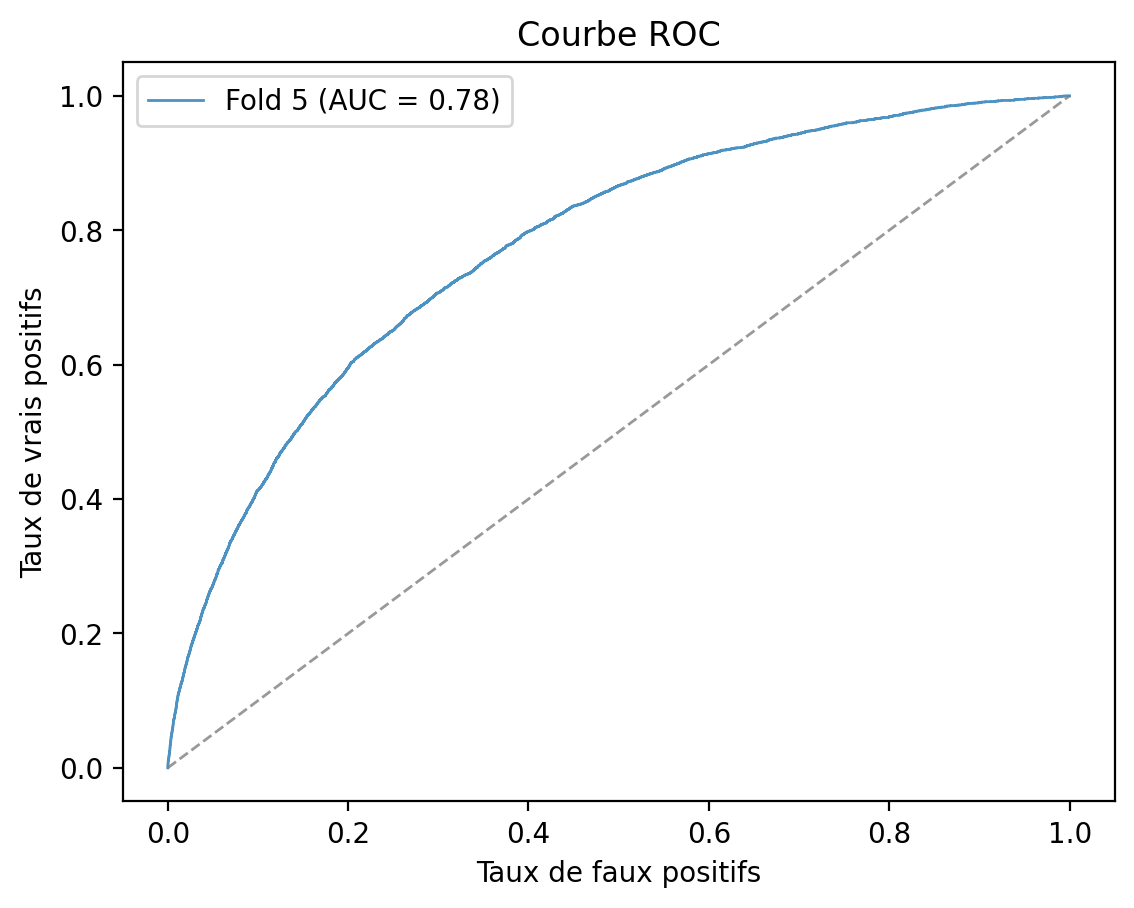

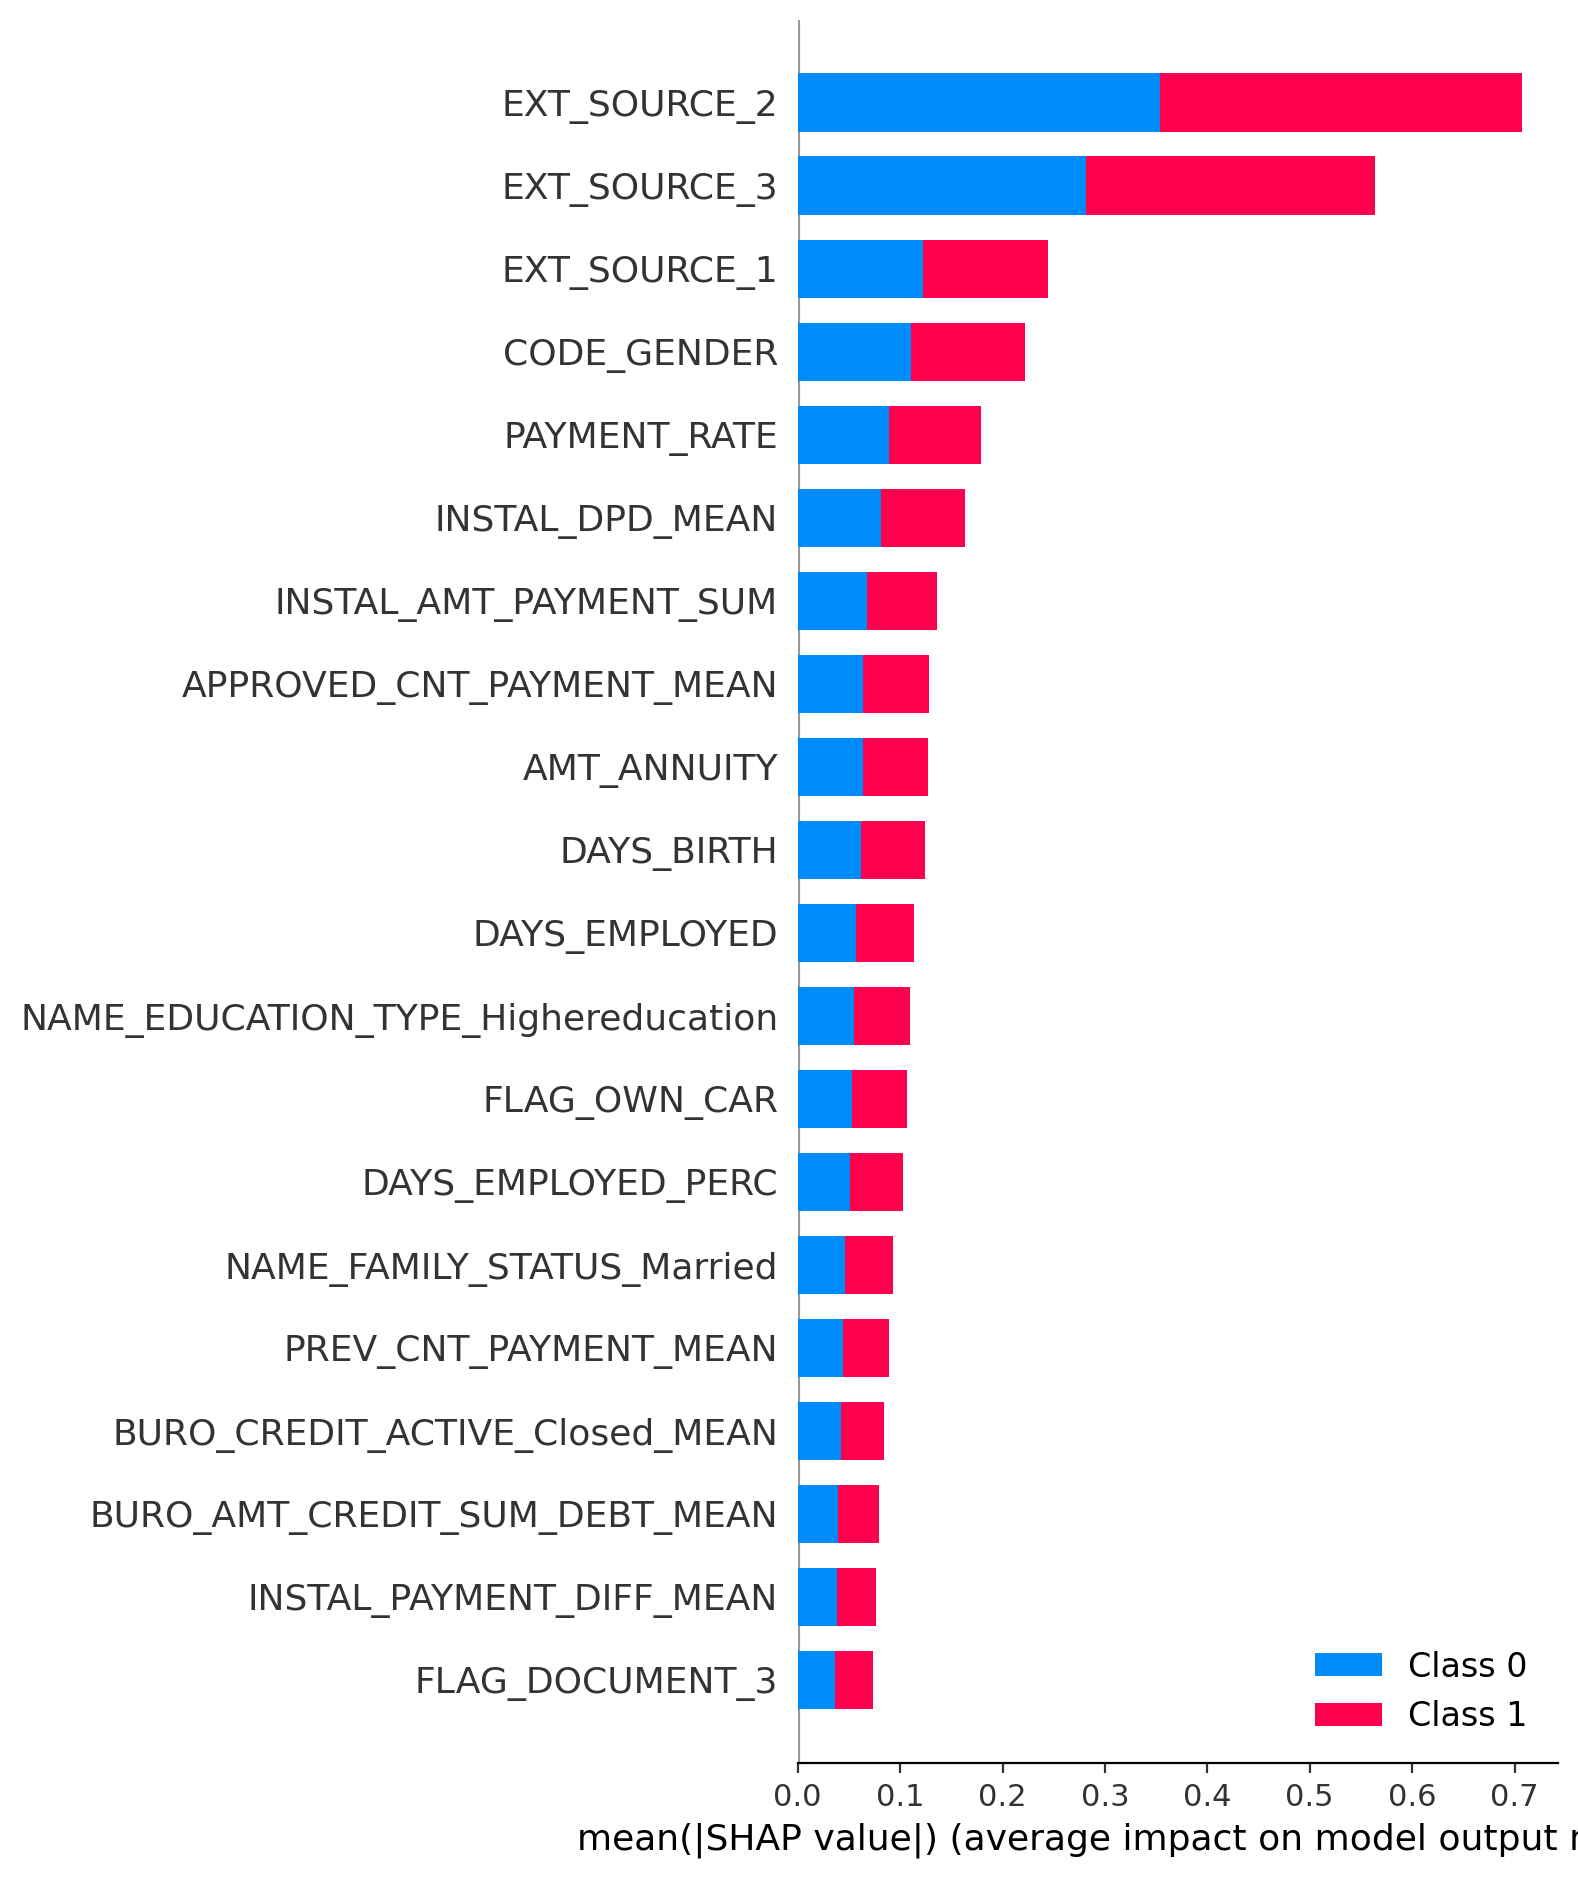

Fold 5: roc_auc_score=0.7759, recall=0.6943, precision=0.1748, f1=0.2793, accuracy=0.7108
Total: roc_auc_score=0.7791, recall=0.7102, precision=0.1771, f1=0.2835, accuracy=0.7103
Proportion: Counter({0.0: 56536, 1.0: 4965})
done in 329.51s


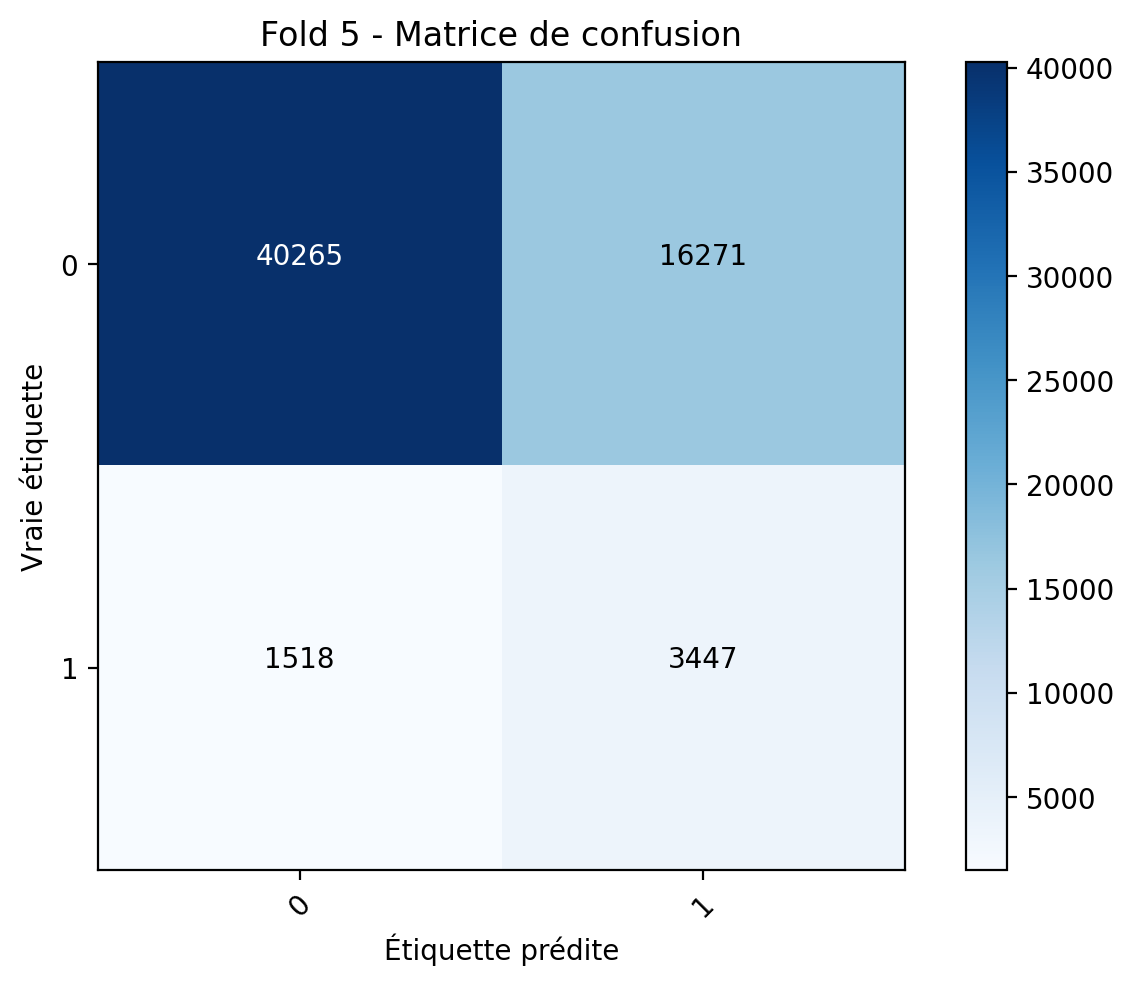

<Figure size 640x480 with 0 Axes>

In [104]:
mlflow.set_experiment("undersampling")
with mlflow.start_run(run_name = "LGBMClassifier") as run:
    mlflow.sklearn.log_model(sk_model= undersampling_pipeline,
                             artifact_path='',
                             registered_model_name='LGBMClassifier')
    
    evaluate_stratifiedkfold('LGBMClassifier', undersampling_pipeline, X_train, y_train, features_importance=True )

In [ ]:
# SHAP
# no_oversampling_pipeline.fit(X_train, y_train)
# import shap
# explainer = shap.TreeExplainer(no_oversampling_pipeline['lg'])
# observations = no_oversampling_pipeline['std'].transform(X_train)
# shap_values = explainer.shap_values(observations)
# shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
smoteenn_pipeline = Pipeline([('std', StandardScaler()), ('smoteenn', SMOTEENN(random_state=42)),
                              ('model', LGBMClassifier(random_state=42))])

In [ ]:
folds = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

In [ ]:
smoteenn_pipeline.fit(X_train, y_train)

In [ ]:
import shap
explainer = shap.TreeExplainer(smoteenn_pipeline['model'])
observations = smoteenn_pipeline['std'].transform(X_train)
shap_values = explainer.shap_values(observations)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train, y_train)


# Lightgbm - Optimisation des hyperparamètres 

In [ ]:
undersampling_pipeline = Pipeline([('std', StandardScaler()), ('undersampling', RandomUnderSampler(random_state=42)),
                                ('model', LGBMClassifier(random_state=42))])

Le LightGBM, comme d'autres algorithmes de gradient boosting, ne nécessite pas obligatoirement la normalisation des données. En effet, ces algorithmes travaillent avec des arbres de décision et ne se basent pas sur la magnitude des valeurs des features.

In [ ]:
# prepare data
train_data = lgb.Dataset(data=X_train, label=y_train, free_raw_data=False)

# parameters
def lgb_eval(feature_fraction, lambda_l1, lambda_l2, max_depth,
             min_child_weight, min_split_gain, num_leaves):
    
    params = {'application': 'binary',
              'colsample_bytree':0.9497036,
              'early_stopping_round':100,
              'learning_rate':0.03,
              'metric':'auc',
              'num_iterations': 10000,
              'reg_alpha':0.041545473,
              'reg_lambda':0.0735294,
              'subsample':0.871562
             }
    params["num_leaves"] = int(round(num_leaves))
    params['feature_fraction'] = max(min(feature_fraction, 1), 0)
    params['max_depth'] = int(round(max_depth))
    params['lambda_l1'] = max(lambda_l1, 0)
    params['lambda_l2'] = max(lambda_l2, 0)
    params['min_split_gain'] = min_split_gain
    params['min_child_weight'] = min_child_weight
    
    cv_result = lgb.cv(params, train_data, nfold=5,        
                       seed=6, stratified=True,
                       verbose_eval =200, metrics=['auc'], return_cvbooster=True)
    return max(cv_result['auc-mean'])

# optimisation des hyperparamètres sur le jeu d'entrainement
params_BO = {
          'feature_fraction': (0.1, 0.9),
          'lambda_l1': (0, 5),
          'lambda_l2': (0, 3),
          'max_depth': (5, 9),
          'min_child_weight': (5, 50),
          'min_split_gain': (0.001, 0.1),
          'num_leaves': (24, 45)
         }

# range 
lgbBO = BayesianOptimization(lgb_eval, pbounds=params_BO, random_state=0)


In [ ]:
lgbBO.maximize(init_points=2, n_iter=3)

In [ ]:
lgbBO.max

In [ ]:
lgbBO.max['params']

{'feature_fraction': 0.5390508031418598,
 'lambda_l1': 3.5759468318620975,
 'lambda_l2': 1.8082901282149315,
 'max_depth': 7.179532731987587,
 'min_child_weight': 24.064465970250712,
 'min_split_gain': 0.06494351719359896,
 'num_leaves': 33.18933143651654}

In [ ]:
# Undersampling 

In [ ]:
clf = LGBMClassifier(
            feature_fraction=0.2,
            lambda_l1=3.58,
            lambda_l2=1.08,
            learning_rate=0.03,
            max_depth=6,
            min_child_weight=24.064465970250712,
            min_split_gain=0.06494351719359896,
            num_leaves=39,
            nthread=4,
            n_estimators=10000,
            objective='binary',
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            #scale_pos_weight=(282686 / 24825),
            silent=-1,
            subsample=0.8715623,
            verbose=-1,
            random_state=42
            )
undersampling_optimize = Pipeline([('std', StandardScaler()), ('undersampling', RandomUnderSampler(random_state=42)),
                                ('model', clf)])

In [ ]:
evaluate_stratifiedkfold("LightGBM", undersampling_optimize, X_train, y_train, stratified= True, num_folds=5, features_importance=False)

# Custom Metric

In [ ]:
undersampling_pipeline = Pipeline([('std', StandardScaler()), ('undersampling', RandomUnderSampler(random_state=42)),
                                ('model', LGBMClassifier(random_state=42))])

In [ ]:
folds = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

In [ ]:
for i, (train_idx, test_idx) in enumerate(folds.split(X_train, y_train)):
        X_train_fold = X_train.iloc[train_idx]
        y_train_fold = y_train.iloc[train_idx]
        X_test_fold = X_train.iloc[test_idx]
        y_test_fold = y_train.iloc[test_idx]
        undersampling_pipeline.fit(X_train_fold, y_train_fold)

In [ ]:
y_pred = undersampling_pipeline.predict(X_test_fold)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_fold, y_pred)

In [ ]:
f1_score(y_test_fold, y_pred)

In [ ]:
recall_score(y_test_fold, y_pred)

In [ ]:
X_test.drop('SK_ID_CURR', axis=1)

In [ ]:
undersampling_pipeline.predict(X_test.drop('SK_ID_CURR', axis=1))

In [ ]:
with open(path + "model.pickle", 'wb') as file:
    pickle.dump(undersampling_pipeline, file)
    

In [ ]:
with open(path + "model.pickle", 'rb') as file:
    model = pickle.load(file)

In [ ]:
model.predict(X_test.drop('SK_ID_CURR', axis=1))

In [ ]:
with open(path + "X_test_small.piclke", 'wb') as file:
    pickle.dump(X_test, file)

with open(path + "X_test_small.piclke", 'rb') as file:
    X_test = pickle.load(file)
X_test.shape

In [ ]:
def eval_metric_custom(y_true, y_pred):
    
    TP_value = 0
    # on prédit des difficultés et il y en a -> on a raison, pas d'impact
    
    FP_value = 0
    # on prévoit des difficultés mais il n'y en a pas -> pas d'impact pour la banque
    # le manque à gagner et comblé par le modèle, si on passe de FP à TN, on passe de 0 à 1
    
    TN_value = 1
    # On prévoit que tout se passe bien et c'est le cas -> meilleure configuration
    
    FN_value = -10
    # on prévoit que tout se passe bien et il y a des difficultés de paiement
    # -> à éviter au maximum
    
    score_final = 0 # on initialise le score à 0
        
    for proba in np.linspace(0.01,0.3,100):  # on teste le seuil de probabilité
        y_pred_proba = np.array(y_pred)
        
        for i in range(y_pred_proba.shape[0]):
        
            # convert probability to label with threshold 'proba'
            if y_pred_proba[i]<proba:
                y_pred_proba[i] = 0
            else:
                y_pred_proba[i] = 1
    
        conf_matrix = confusion_matrix(y_true, y_pred_proba)
        
        tn = conf_matrix[0, 0]
        fp = conf_matrix[0, 1]
        fn = conf_matrix[1, 0]
        tp = conf_matrix[1, 1]
    
        gain = tn*TN_value + fp*FP_value + fn*FN_value + tp*TP_value
    
        perfect_model = (tn + fp)*TN_value + (fn + tp)*TP_value
        # modèle parfait qui prédit les vraies classes
    
        no_model = (tn + fp)*TN_value + (tp + fn)*FN_value
        # modèle qui prédit toujours 0
    
        score = (gain - no_model) / (perfect_model - no_model)
        # on normalise le gain : score de 1 pour un modèle parfait 
        # et 0 pour un modèle qui dit toujours non
        
        if score > score_final:
            score_final = score
            threshold = proba
    
    print('seuil pour maximiser les profits :{}'.format(threshold))
    
    return 'score', score_final, True

In [ ]:
eval_metric_custom(y_test_fold, y_pred)

In [ ]:
def feval_metric_custom(preds, train_data):
    
    y_true = train_data.get_label()
    y_pred = preds
    
    eval_name, eval_result, is_higher_better = eval_metric_custom(y_true, y_pred)
    
    return eval_name, eval_result, is_higher_better

In [ ]:
# prepare data
ru_data = lgb.Dataset(data=X_ru, label=y_ru, free_raw_data=False)

# parameters
def lgb_eval(feature_fraction, lambda_l1, lambda_l2, max_depth,
             min_child_weight, min_split_gain, num_leaves):
    
    params = {'application': 'binary',
              'colsample_bytree':0.9497036,
              'early_stopping_round':30,
              'learning_rate':0.03,
              'num_iterations': 10000,
              'reg_alpha':0.041545473,
              'reg_lambda':0.0735294,
              'subsample':0.871562
             }
    params["num_leaves"] = int(round(num_leaves))
    params['feature_fraction'] = max(min(feature_fraction, 1), 0)
    params['max_depth'] = int(round(max_depth))
    params['lambda_l1'] = max(lambda_l1, 0)
    params['lambda_l2'] = max(lambda_l2, 0)
    params['min_split_gain'] = min_split_gain
    params['min_child_weight'] = min_child_weight
    
    cv_result = lgb.cv(params, ru_data, nfold=5,
                       seed=6,verbose_eval =200,
                       feval=feval_metric_custom,
                       return_cvbooster=True)
    print(cv_result)
    return max(cv_result['score-mean'])

# optimisation des hyperparamètres sur le jeu d'entrainement
params_BO = {
          'feature_fraction': (0.1, 0.9),
          'lambda_l1': (0, 5),
          'lambda_l2': (0, 3),
          'max_depth': (5, 9),
          'min_child_weight': (5, 50),
          'min_split_gain': (0.001, 0.1),
          'num_leaves': (24, 45)
         }

# range 
lgbBO_ru = BayesianOptimization(lgb_eval, pbounds=params_BO, random_state=0)


# Création du plus proche voisin 

# Voir KNN Test Unitaire

In [ ]:
X_train.shape

In [ ]:
interpretable_important_data = ['SK_ID_CURR',
                                'PAYMENT_RATE',
                                'AMT_ANNUITY',
                                'DAYS_BIRTH',
                                'DAYS_EMPLOYED',
                                'ANNUITY_INCOME_PERC']

interpretable_important_data_target = ['SK_ID_CURR',
                                       'PAYMENT_RATE',
                                       'AMT_ANNUITY',
                                       'DAYS_BIRTH',
                                       'DAYS_EMPLOYED',
                                       'ANNUITY_INCOME_PERC',
                                       'TARGET']

In [ ]:
from sklearn.neighbors import NearestNeighbors
std = StandardScaler()
df_std = std.fit_transform(X_train[interpretable_important_data])
df_std = pd.DataFrame(df_std,
                      index=X_train.index,
                      columns=[interpretable_important_data])

knn = NearestNeighbors(n_neighbors=5)
knn.fit(df_std)

In [ ]:
knn

In [ ]:
# path = "data/cleaned/"
# with open(path+"knn.pickle", "wb") as file:
#     pickle.dump(knn, file)

In [ ]:
# path = "data/cleaned/"
# with open(path+"knn.pickle", "rb") as file:
#     knn = pickle.load(file)

In [ ]:
X_trainX_train[interpretable_important_data]

In [ ]:
path = "data/cleaned/"
with open(path+"X_train.pickle", "wb") as file:
    pickle.dump(X_train, file)

In [ ]:
path = "data/cleaned/"
with open(path+"X_train.pickle", "rb") as file:
    knn = pickle.load(file)
X_train.head()

In [ ]:
X_test_low[X_test_low["SK_ID_CURR"] == 100001].values

In [ ]:
# @app.route("/load_voisins", methods=["GET"])
# def load_voisins():
#     id = request.args.get("id_client")
#     data_client = df_test[df_test["SK_ID_CURR"] == int(id)].values
#     distances, indices = knn.kneighbors(data_client)
#     print("indices")
#     print(indices)
#     print("distances")
#     print(distances)
#     df_voisins = df_train.iloc[indices[0], :]
#     response = json.loads(df_voisins.to_json(orient='index'))
#     return response


In [ ]:
data_client = X_test_low[X_test_low["SK_ID_CURR"] == 100001].values
data_client

In [ ]:
distances, indices = knn.kneighbors(data_client)
print(indices)

In [ ]:
df_voisins = X_train.iloc[indices[0], :]
df_voisins

In [ ]:
X_test_low

In [ ]:
X = X_test_low[X_test_low["SK_ID_CURR"] == 100001]

In [ ]:
distance, voisins = nn.kneighbors(X)

In [ ]:
voisins

In [ ]:
d = X_test_low[X_test_low["SK_ID_CURR"] == 100005]

In [ ]:
distances, indices = nn.kneighbors(d)

In [ ]:
indices

In [ ]:
X_test_low.iloc[indices[0], :]

In [ ]:
index = X_test_low[X_test_low["SK_ID_CURR"] == 100005 ].index.values
#X_test_low[index]

In [ ]:
index = df_test[df_test["SK_ID_CURR"] == int(id)].index.values
data_client = test[index]
distances, indices = knn.kneighbors(data_client)
print("indices")
print(indices)
print("distances")
print(distances)
df_voisins = data_train.iloc[indices[0], :]

In [105]:
X_test.head()

SK_ID_CURR  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100001          1.0           0.0              0.0           0.0   
1      100005          0.0           0.0              0.0           0.0   
2      100013          0.0           1.0              0.0           0.0   
3      100028          1.0           0.0              0.0           2.0   
4      100038          0.0           1.0              1.0           1.0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          135000.0    568800.0      20560.5         450000.0   
1           99000.0    222768.0      17370.0         180000.0   
2          202500.0    663264.0      69777.0         630000.0   
3          315000.0   1575000.0      49018.5        1575000.0   
4          180000.0    625500.0      32067.0         625500.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018850    -19241.0        -2329.0            -5170.0   
1                    0.035792    -18064.0        -4469.0            -9118.0   
2                    0.019101    -20038.0        -4458.0            -2175.0   
3                    0.026392    -13976.0        -1866.0            -2000.0   
4                    0.010032    -13040.0        -2191.0            -4000.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0           -812.0          9.0         1.0             1.0              0.0   
1          -1623.0          9.0         1.0             1.0              0.0   
2          -3503.0          5.0         1.0             1.0              0.0   
3          -4208.0          9.0         1.0             1.0              0.0   
4          -4262.0         16.0         1.0             1.0              1.0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0               1.0         0.0         1.0              2.0   
1               1.0         0.0         0.0              2.0   
2               1.0         0.0         0.0              2.0   
3               1.0         1.0         0.0              4.0   
4               1.0         0.0         0.0              3.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                   2.0                          2.0                     18.0   
1                   2.0                          2.0                      9.0   
2                   2.0                          2.0                     14.0   
3                   2.0                          2.0                     11.0   
4                   2.0                          2.0                      5.0   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                          0.0                     0.0   
1                          0.0                     0.0   
2                          0.0                     0.0   
3                          0.0                     0.0   
4                          0.0                     0.0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                     0.0                      0.0      0.752614   
1                     0.0                      0.0      0.564990   
2                     0.0                      0.0      0.506155   
3                     0.0                      0.0      0.525734   
4                     1.0                      1.0      0.202145   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.789654      0.159520          0.0660            0.0590   
1      0.291656      0.432962          0.0880            0.0765   
2      

In [116]:
x = X_test.loc[1]
x

SK_ID_CURR                                                         1.000050e+05
CODE_GENDER                                                        0.000000e+00
FLAG_OWN_CAR                                                       0.000000e+00
FLAG_OWN_REALTY                                                    0.000000e+00
CNT_CHILDREN                                                       0.000000e+00
AMT_INCOME_TOTAL                                                   9.900000e+04
AMT_CREDIT                                                         2.227680e+05
AMT_ANNUITY                                                        1.737000e+04
AMT_GOODS_PRICE                                                    1.800000e+05
REGION_POPULATION_RELATIVE                                         3.579200e-02
DAYS_BIRTH                                                        -1.806400e+04
DAYS_EMPLOYED                                                     -4.469000e+03
DAYS_REGISTRATION                       

In [113]:
import pandas as pd

# créer un DataFrame exemple
data = {'col1': [1, 2, 3, 4, 5],
        'col2': ['a', 'b', 'c', 'd', 'e']}
df = pd.DataFrame(data, index=[10, 11, 12, 13, 14])

# afficher la ligne avec l'index 12
print(df.loc[14])


col1    5
col2    e
Name: 14, dtype: object


In [118]:
df

col1 col2
10     1    a
11     2    b
12     3    c
13     4    d
14     5    e

# Shap

In [56]:
undersampling_pipeline = Pipeline([('std', StandardScaler()), ('undersampling', RandomUnderSampler(random_state=42)),
                                ('model', LGBMClassifier(random_state=42))])

In [57]:
X_train.shape

(307507, 795)

In [58]:
X_test.shape

(48744, 796)

In [59]:
folds = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)
for i, (train_idx, test_idx) in enumerate(folds.split(X_train, y_train)):
        X_train_fold = X_train.iloc[train_idx]
        y_train_fold = y_train.iloc[train_idx]
        X_test_fold = X_train.iloc[test_idx]
        y_test_fold = y_train.iloc[test_idx]
        print(f"X_train = {X_train.shape}, y_train = {y_train.shape}, X_test_fold = {X_test_fold.shape}, Y_test_fold = {y_test_fold.shape}")
        undersampling_pipeline.fit(X_train_fold, y_train_fold)
        proba_preds = undersampling_pipeline.predict_proba(X_test_fold)[:, 1]
        print(roc_auc_score(y_test_fold, proba_preds))

X_train = (307507, 795), y_train = (307507,), X_test_fold = (61502, 795), Y_test_fold = (61502,)
0.7759806235847191
X_train = (307507, 795), y_train = (307507,), X_test_fold = (61502, 795), Y_test_fold = (61502,)
0.7862381025741842
X_train = (307507, 795), y_train = (307507,), X_test_fold = (61501, 795), Y_test_fold = (61501,)
0.7757839402490705
X_train = (307507, 795), y_train = (307507,), X_test_fold = (61501, 795), Y_test_fold = (61501,)
0.7815541605729992
X_train = (307507, 795), y_train = (307507,), X_test_fold = (61501, 795), Y_test_fold = (61501,)
0.7758931845117606


In [60]:
undersampling_pipeline

Pipeline(steps=[('std', StandardScaler()),
                ('undersampling', RandomUnderSampler(random_state=42)),
                ('model', LGBMClassifier(random_state=42))])

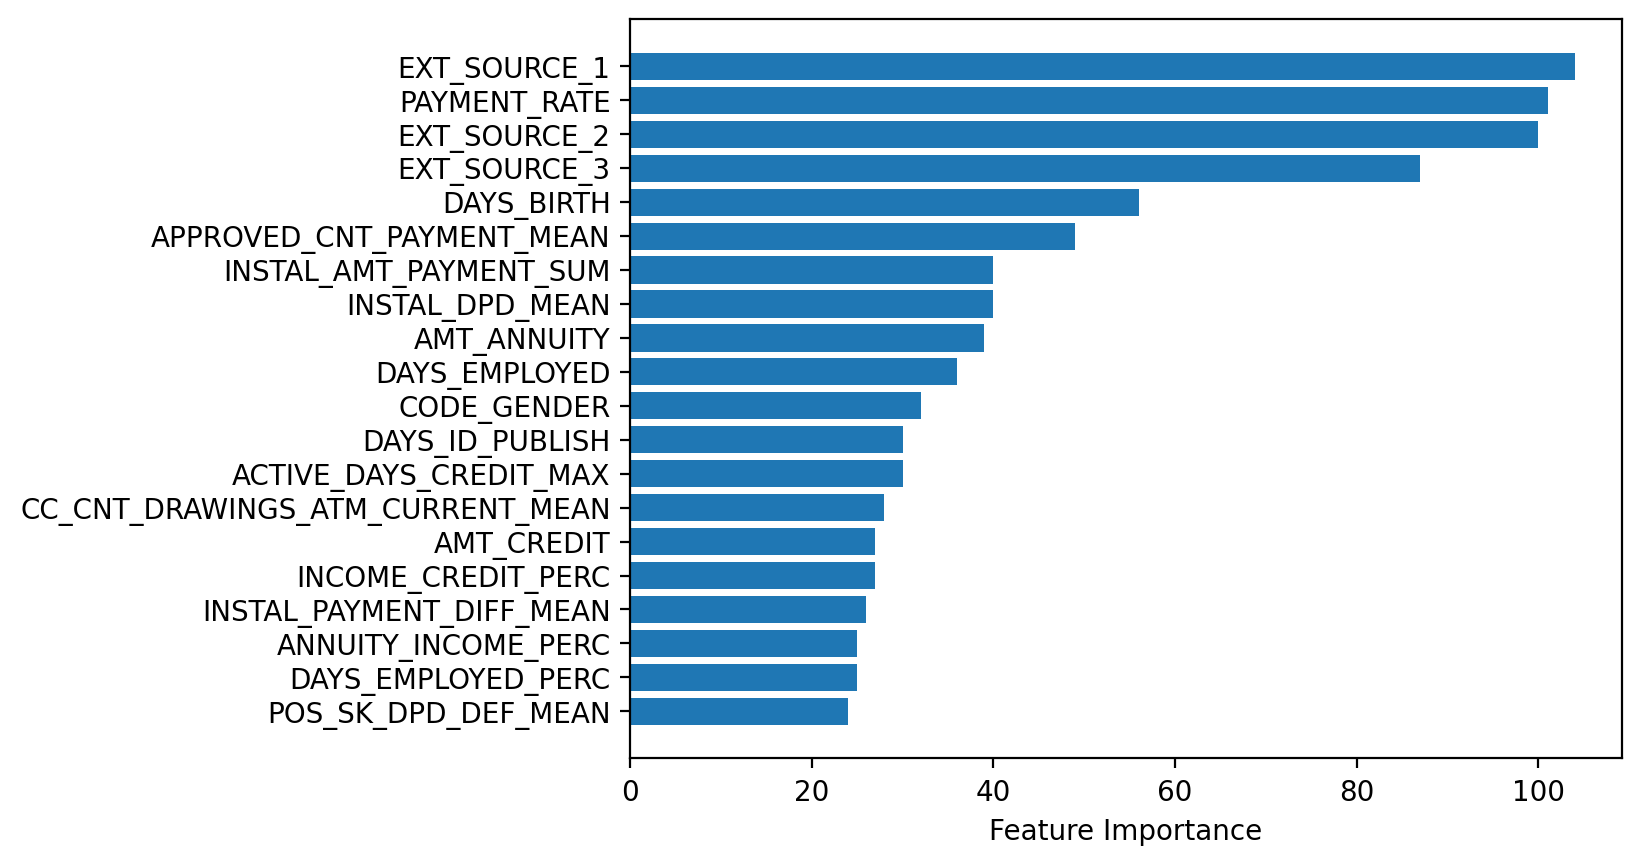

In [78]:
importances = undersampling_pipeline['model'].feature_importances_
sorted_idx = np.argsort(importances)[-20:]  # Prend les indices des 20 plus importantes

plt.barh(range(20), importances[sorted_idx])  
plt.yticks(range(20), X_test_fold.columns[sorted_idx])  
plt.xlabel('Feature Importance')
plt.show()

In [ ]:
# from sklearn.inspection import permutation_importance

# result = permutation_importance(undersampling_pipeline['model'], X_test_fold, y_test_fold, n_repeats=10, random_state=0)
# sorted_idx = result.importances_mean.argsort()

# plt.barh(range(X_test_fold.shape[1]), result.importances_mean[sorted_idx])
# plt.yticks(range(X_test_fold.shape[1]), X_test.columns[sorted_idx])
# plt.xlabel('Permutation Importance')
# plt.show()

In [61]:
import shap
shap.initjs()

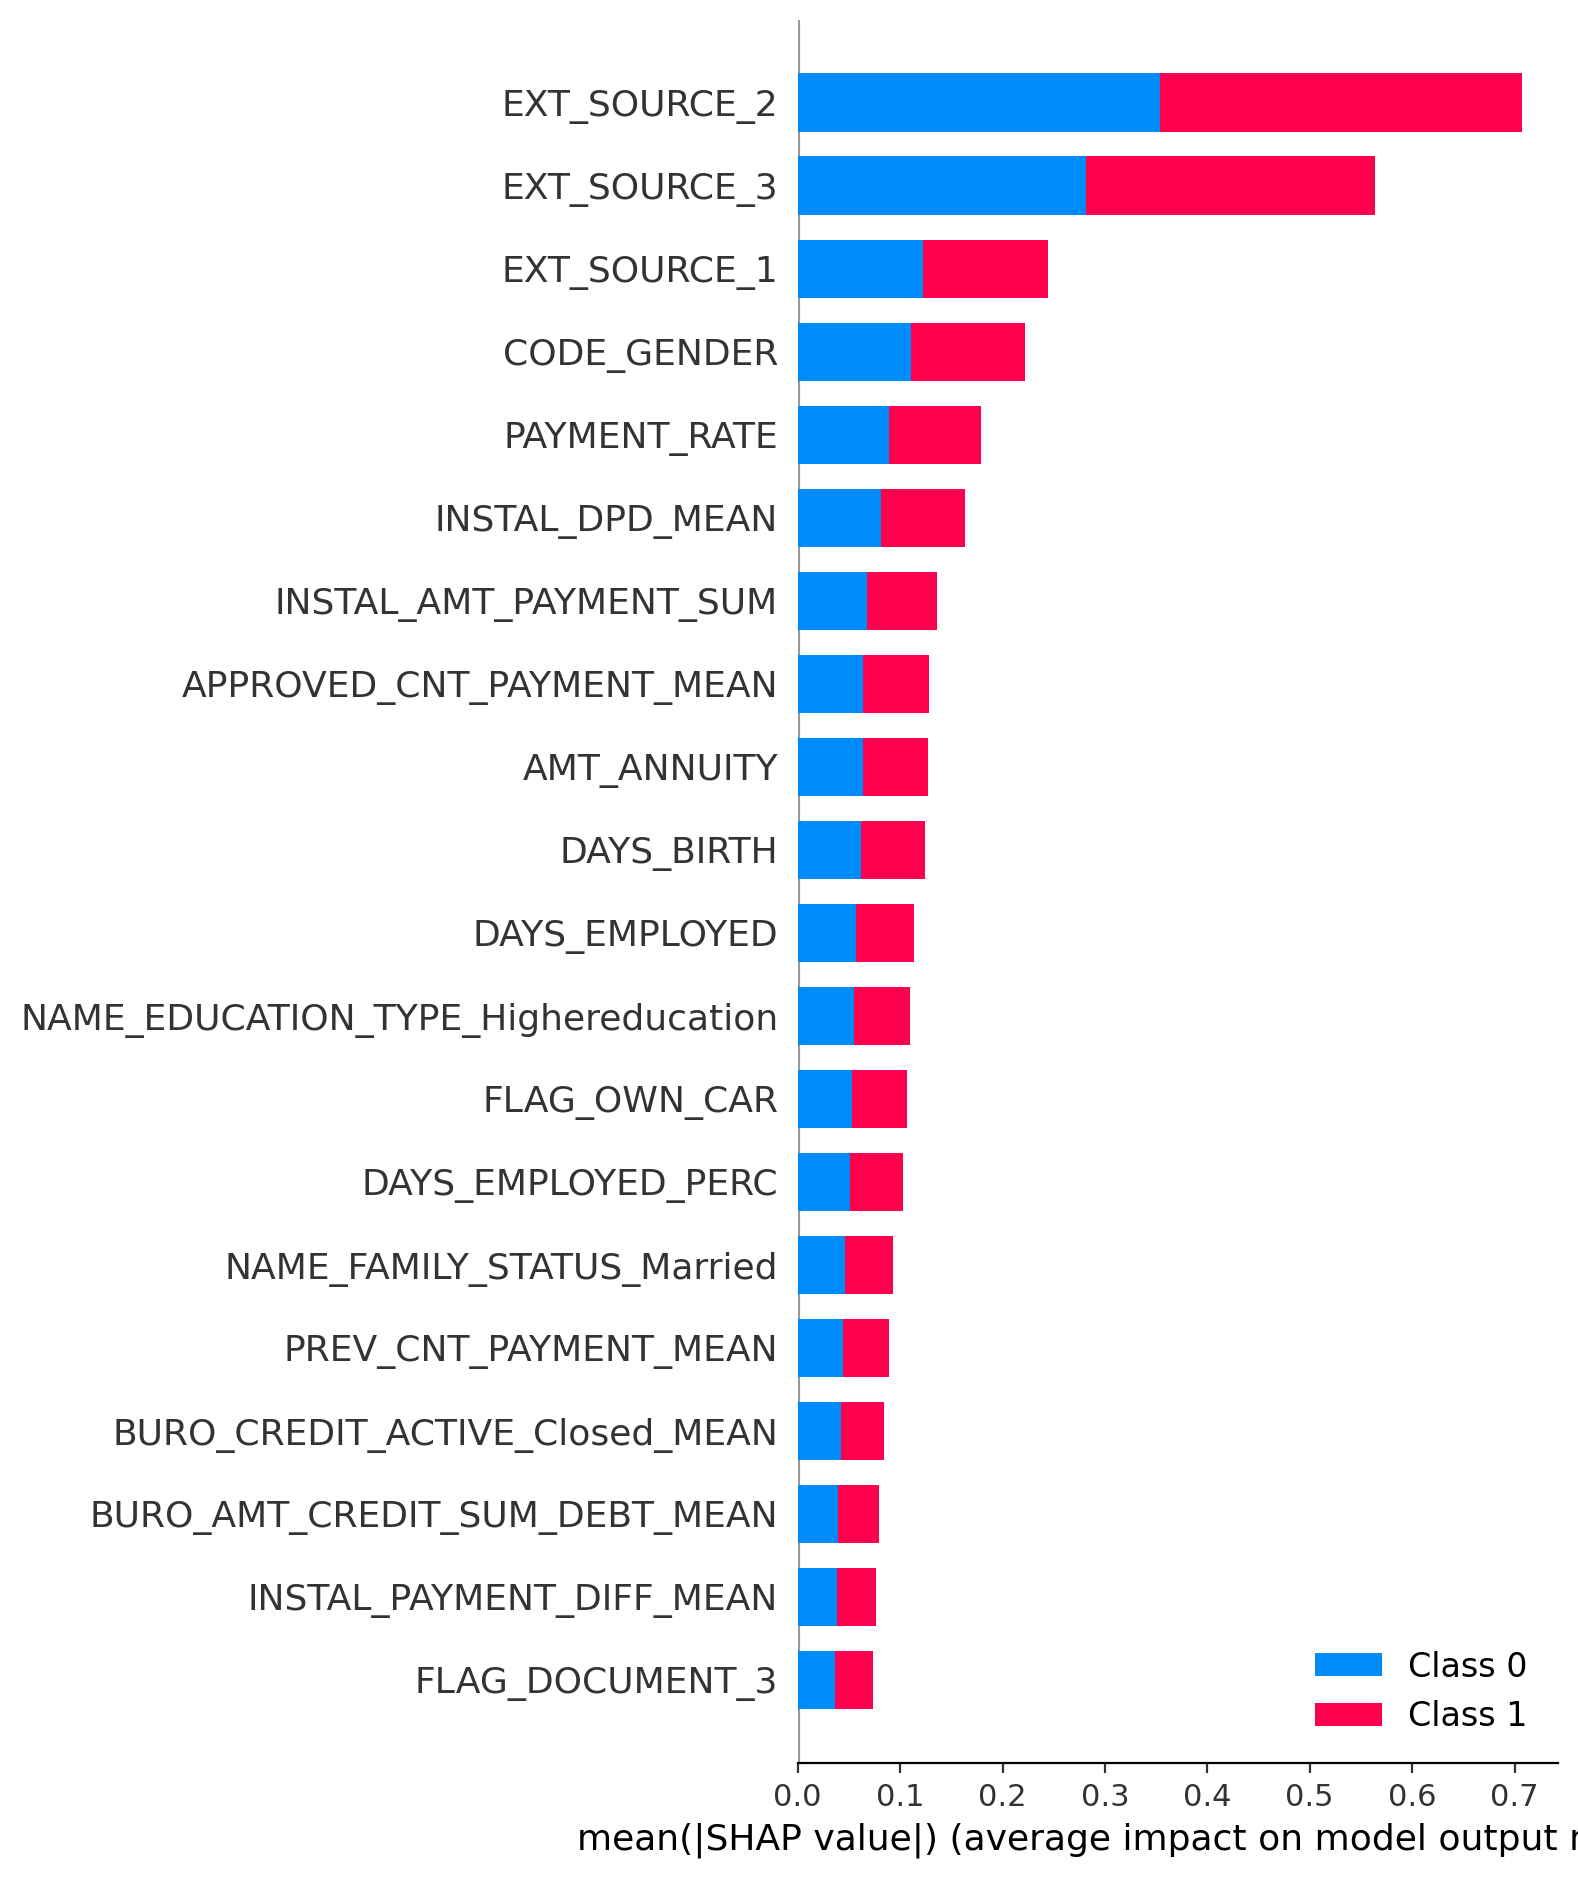

In [63]:
# Création d'un objet pour fonctionner avec les arbres de décisions
explainer = shap.TreeExplainer(undersampling_pipeline['model'])
# Standardisation 
observations = undersampling_pipeline['std'].transform(X_test_fold)
# calcule les valeurs SHAP pour les observations transformées en utilisant l'objet explainer
shap_values = explainer.shap_values(observations)
# Génère un diagramme à barres qui résume les importances des features 
shap.summary_plot(shap_values, X_test_fold, plot_type="bar")

In [82]:
mean_shap_values = np.mean([np.abs(shap_values_class).mean(axis=0) for shap_values_class in shap_values], axis=0)
sorted_indices = np.argsort(mean_shap_values)[::-1]
sorted_feature_names = X_test_fold.columns[sorted_indices]
sorted_features_list = sorted_feature_names.tolist()
top_20_features = sorted_features_list[:20]
print(top_20_features)


['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'CODE_GENDER', 'PAYMENT_RATE', 'INSTAL_DPD_MEAN', 'INSTAL_AMT_PAYMENT_SUM', 'APPROVED_CNT_PAYMENT_MEAN', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_EDUCATION_TYPE_Highereducation', 'FLAG_OWN_CAR', 'DAYS_EMPLOYED_PERC', 'NAME_FAMILY_STATUS_Married', 'PREV_CNT_PAYMENT_MEAN', 'BURO_CREDIT_ACTIVE_Closed_MEAN', 'BURO_AMT_CREDIT_SUM_DEBT_MEAN', 'INSTAL_PAYMENT_DIFF_MEAN', 'FLAG_DOCUMENT_3']


# Attention  Il faut faire les prédictions sur le jeu de test et indexation

# Pour une personne avec un crédit accepté 

In [89]:
y_test_fold.loc[y_test_fold == 1].index[0]

42

In [111]:
id = 42
index = X_test_fold.index.get_loc(id)
index

8

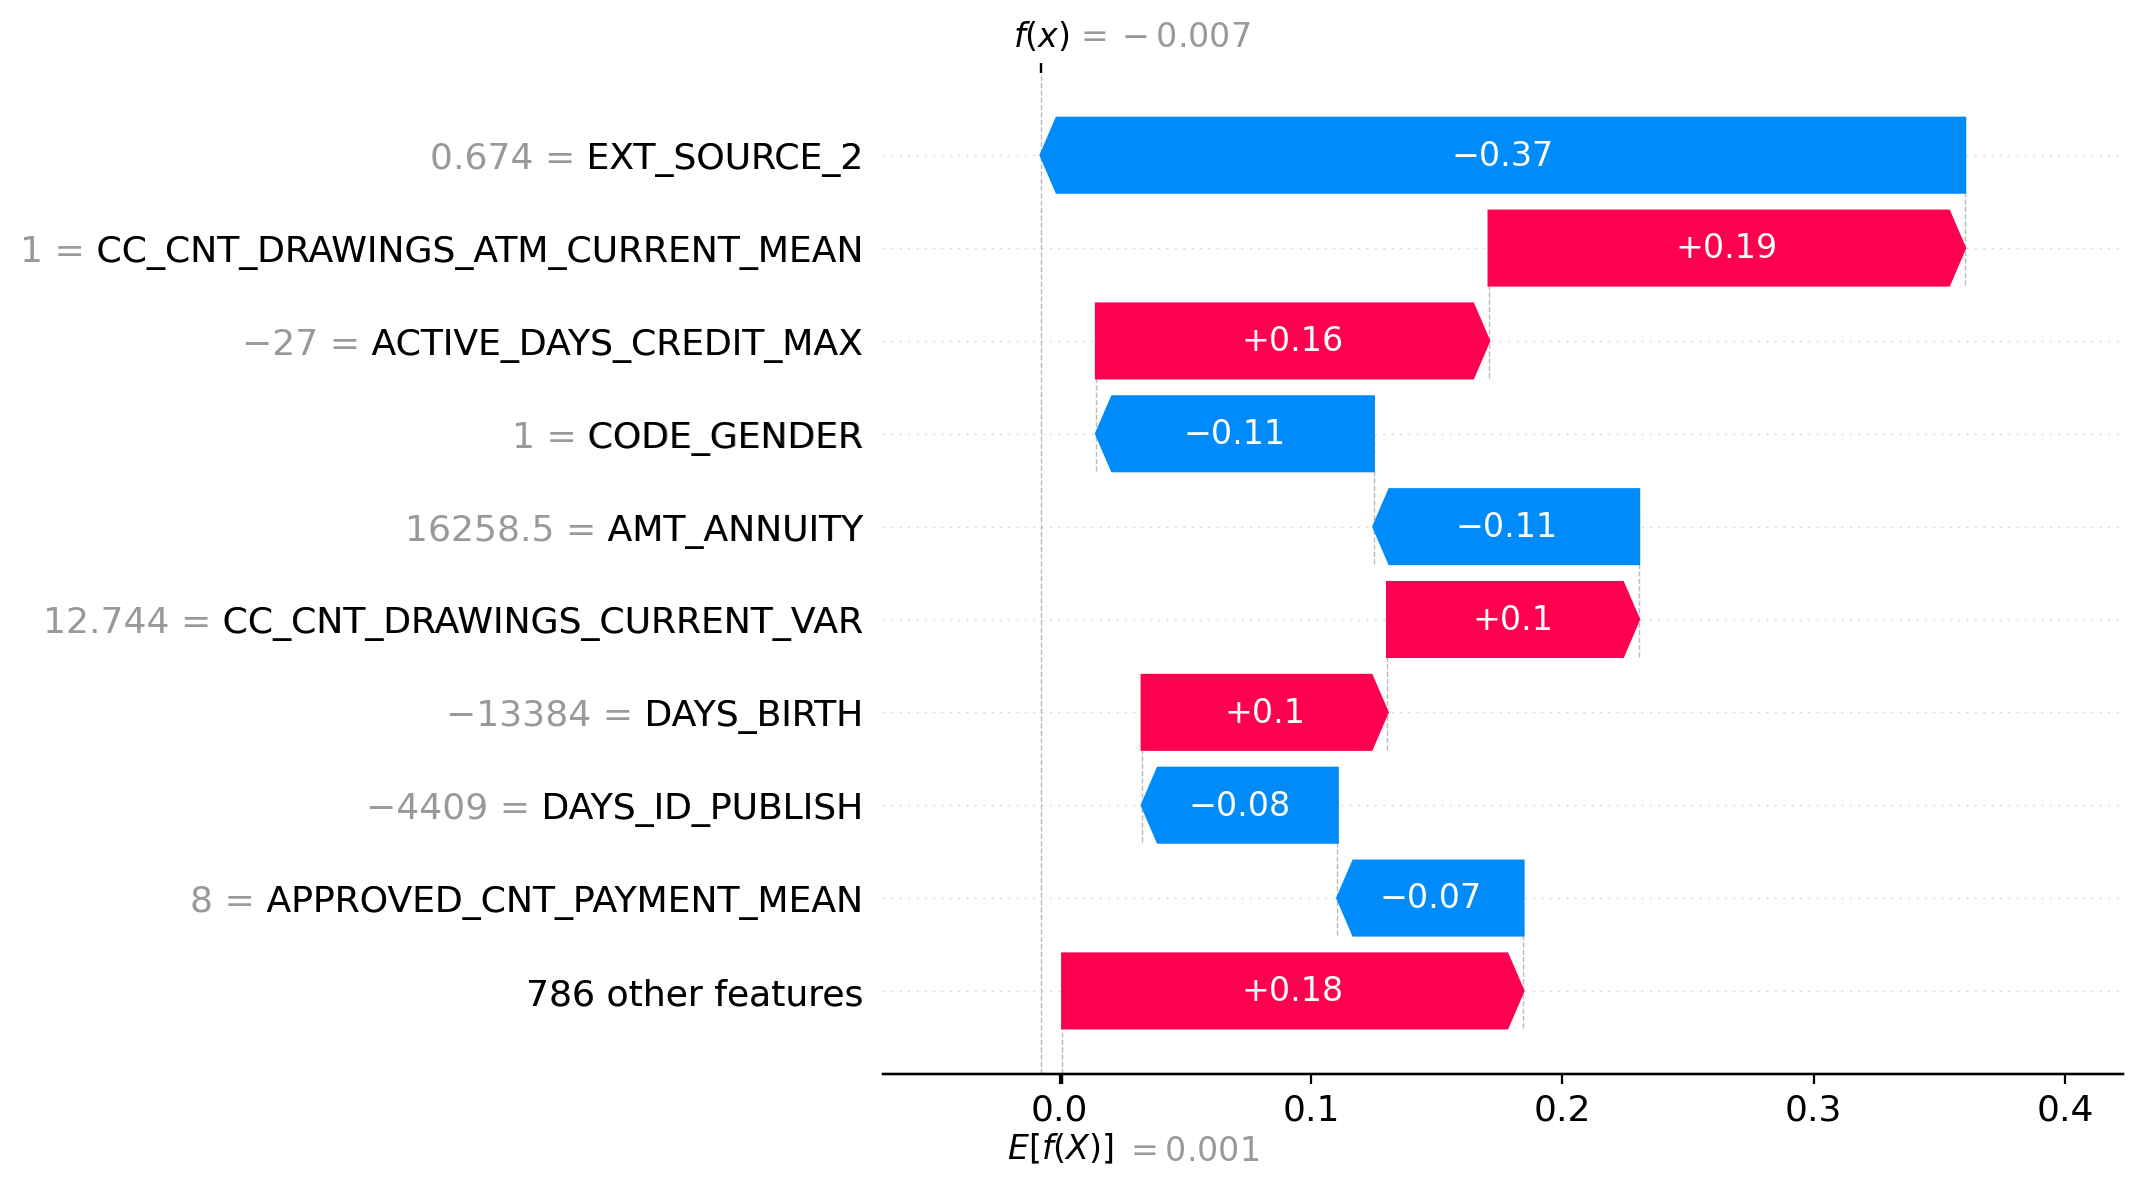

In [90]:
id = 42
index = X_test_fold.index.get_loc(id)  # Récupère l'index local correspondant à l'ID spécifié

# Obtenez les valeurs SHAP pour l'index spécifié
instance_shap_values = shap_values[1][index, :]

# Créez une explication SHAP pour l'instance spécifique
instance_explanation = shap.Explanation(instance_shap_values,
                                        data=X_test_fold.iloc[index, :],
                                        base_values=explainer.expected_value[1])

# Créez le shap.waterfall_plot pour l'ID 4
shap.plots.waterfall(instance_explanation)

In [108]:
id = 42
index = X_test_fold.index.get_loc(id)
shap.force_plot(explainer.expected_value[1], shap_values[1][index, :], X_test_fold.iloc[index, :], link='logit')

In [104]:
y_test_fold.loc[y_test_fold == 1].index[4]

246

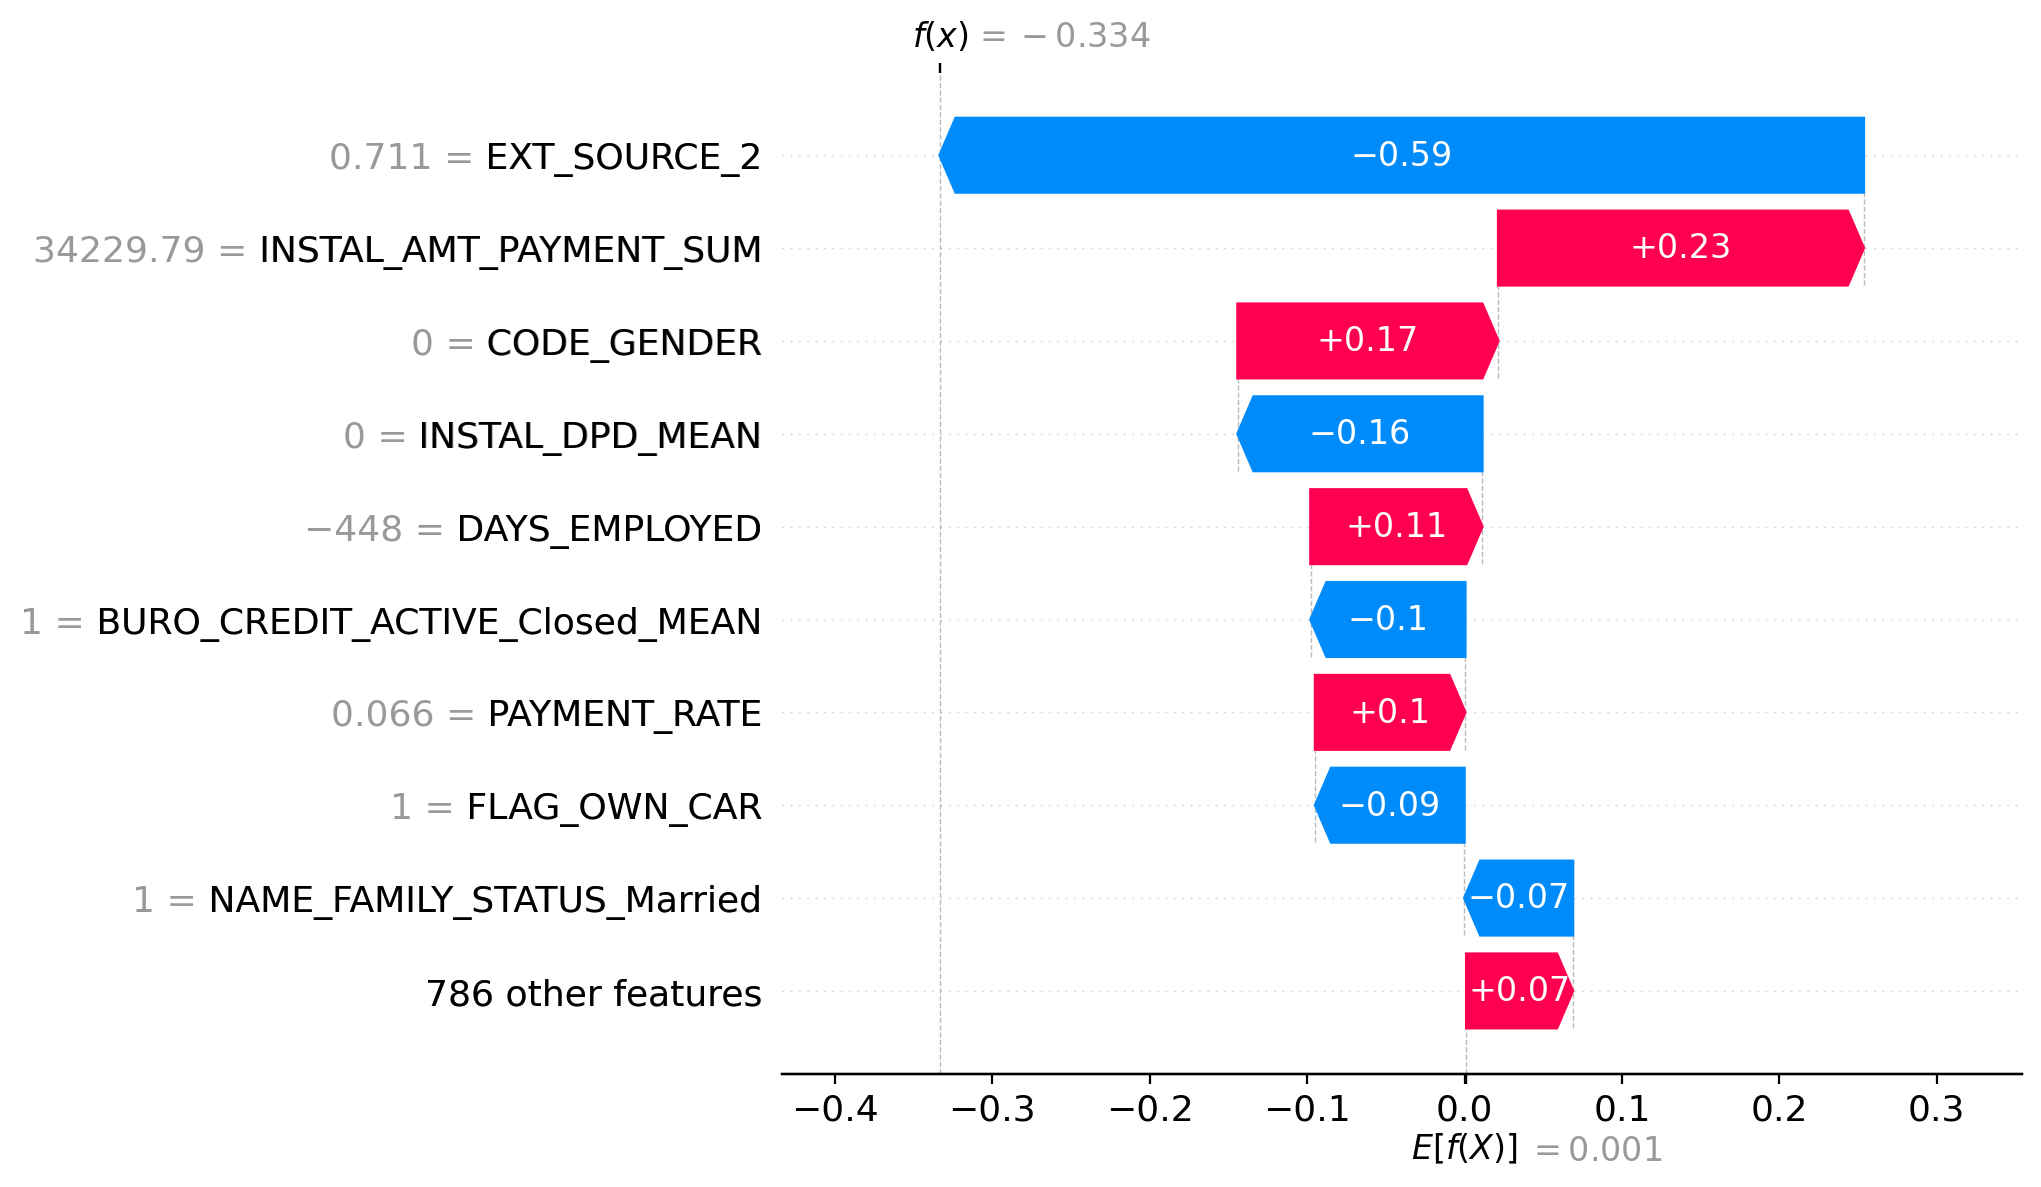

In [105]:
id = 246
index = X_test_fold.index.get_loc(id)  # Récupère l'index local correspondant à l'ID spécifié

# Obtenez les valeurs SHAP pour l'index spécifié
instance_shap_values = shap_values[1][index, :]

# Créez une explication SHAP pour l'instance spécifique
instance_explanation = shap.Explanation(instance_shap_values,
                                        data=X_test_fold.iloc[index, :],
                                        base_values=explainer.expected_value[1])

# Créez le shap.waterfall_plot pour l'ID 4
shap.plots.waterfall(instance_explanation)

# Pour une personne avec un crédit refusé

In [94]:
y_test_fold.loc[y_test_fold == 0].index[0]

3

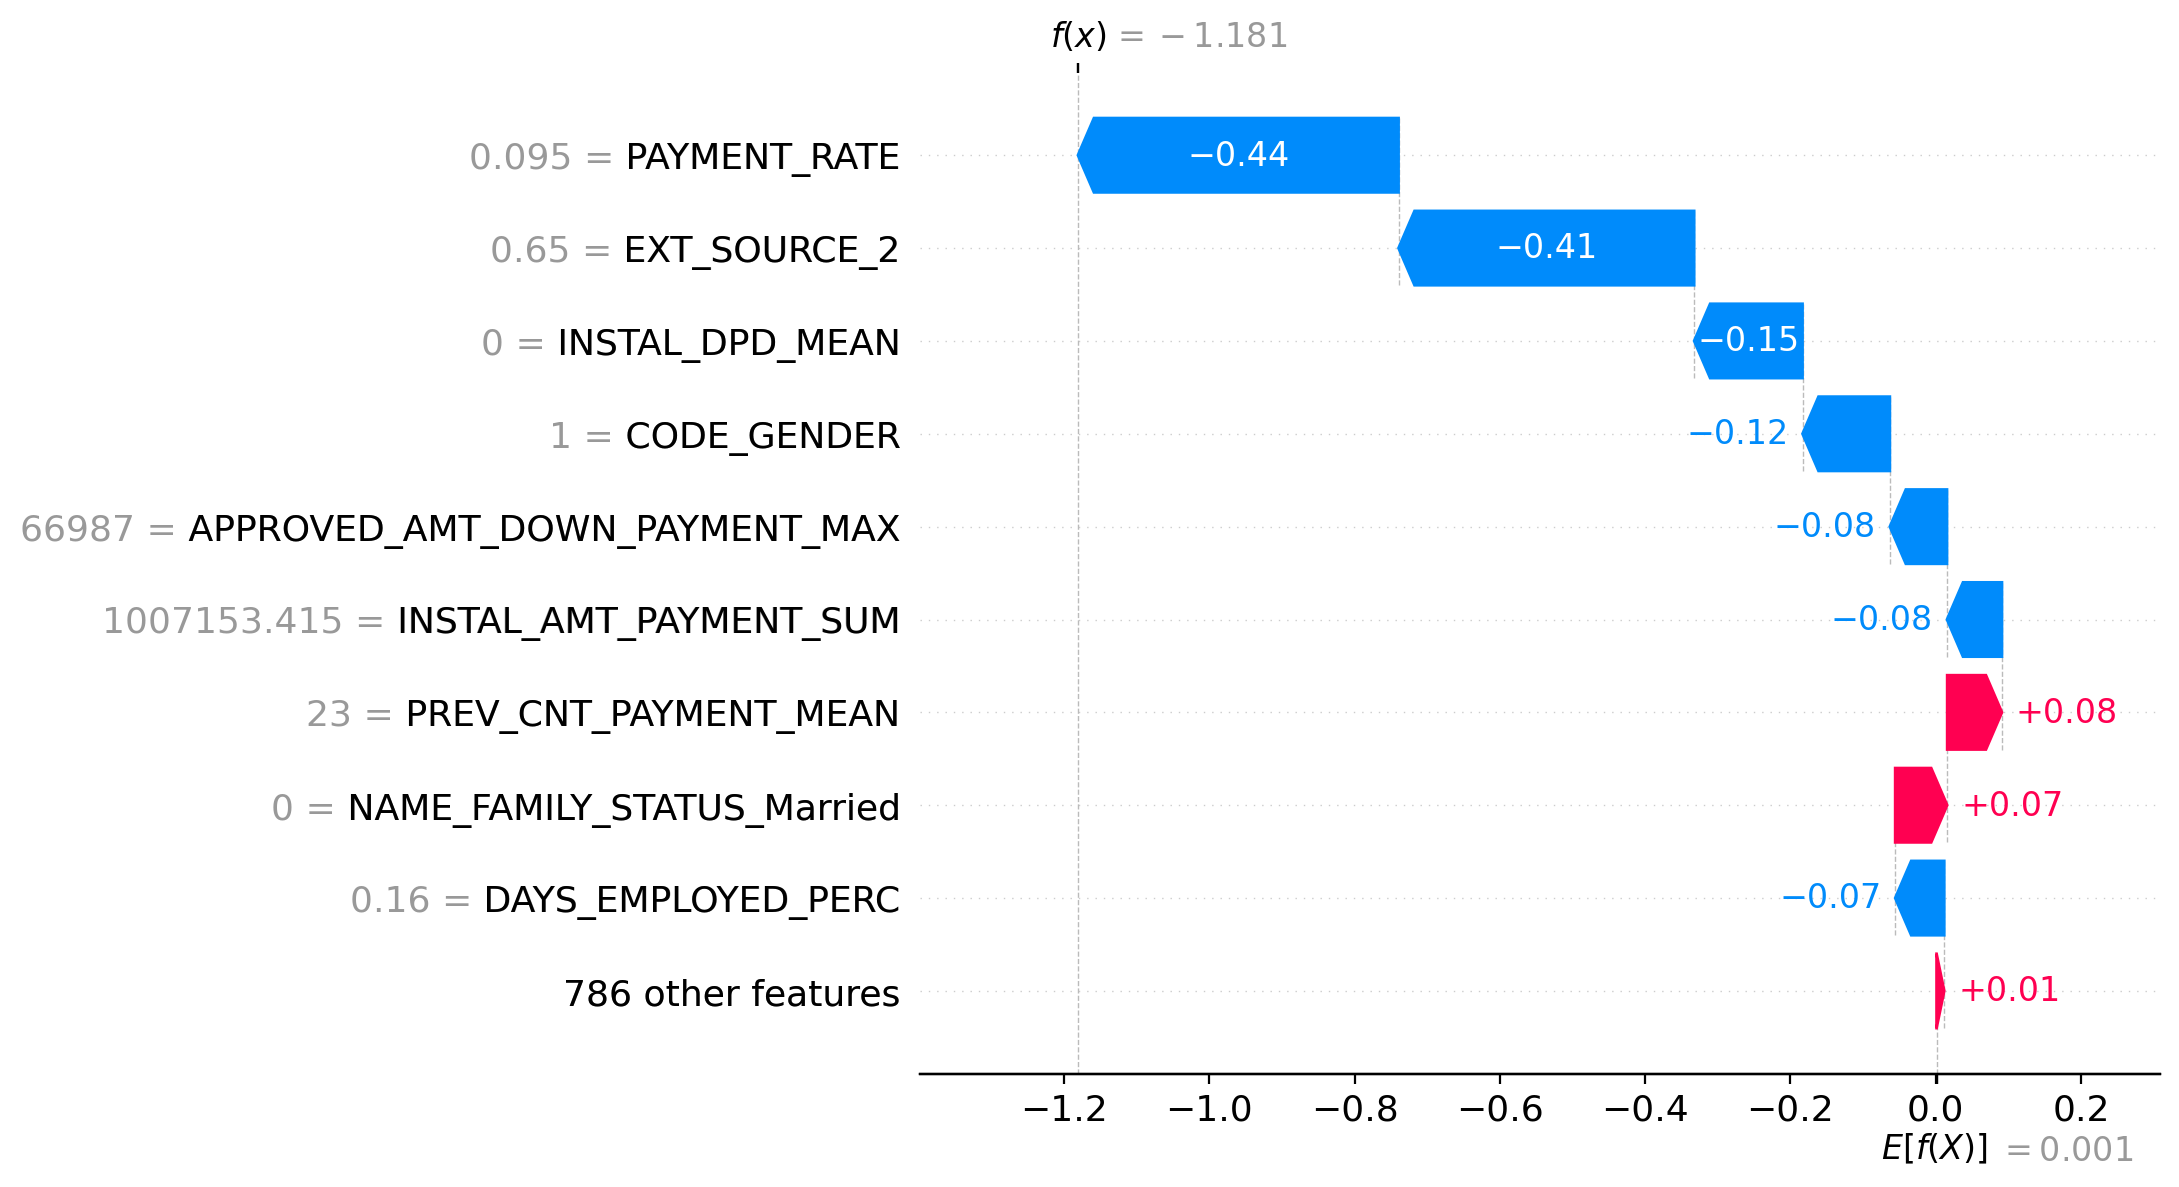

In [92]:
id = 3
index = X_test_fold.index.get_loc(id)  # Récupère l'index local correspondant à l'ID spécifié

# Obtenez les valeurs SHAP pour l'index spécifié
instance_shap_values = shap_values[1][index, :]

# Créez une explication SHAP pour l'instance spécifique
instance_explanation = shap.Explanation(instance_shap_values,
                                        data=X_test_fold.iloc[index, :],
                                        base_values=explainer.expected_value[1])

# Créez le shap.waterfall_plot pour l'ID 4
shap.plots.waterfall(instance_explanation)

In [129]:
y_test_fold.loc[y_test_fold == 0].index[1]

4

In [131]:
(X_test_fold.iloc[index, :]).shape

(795,)

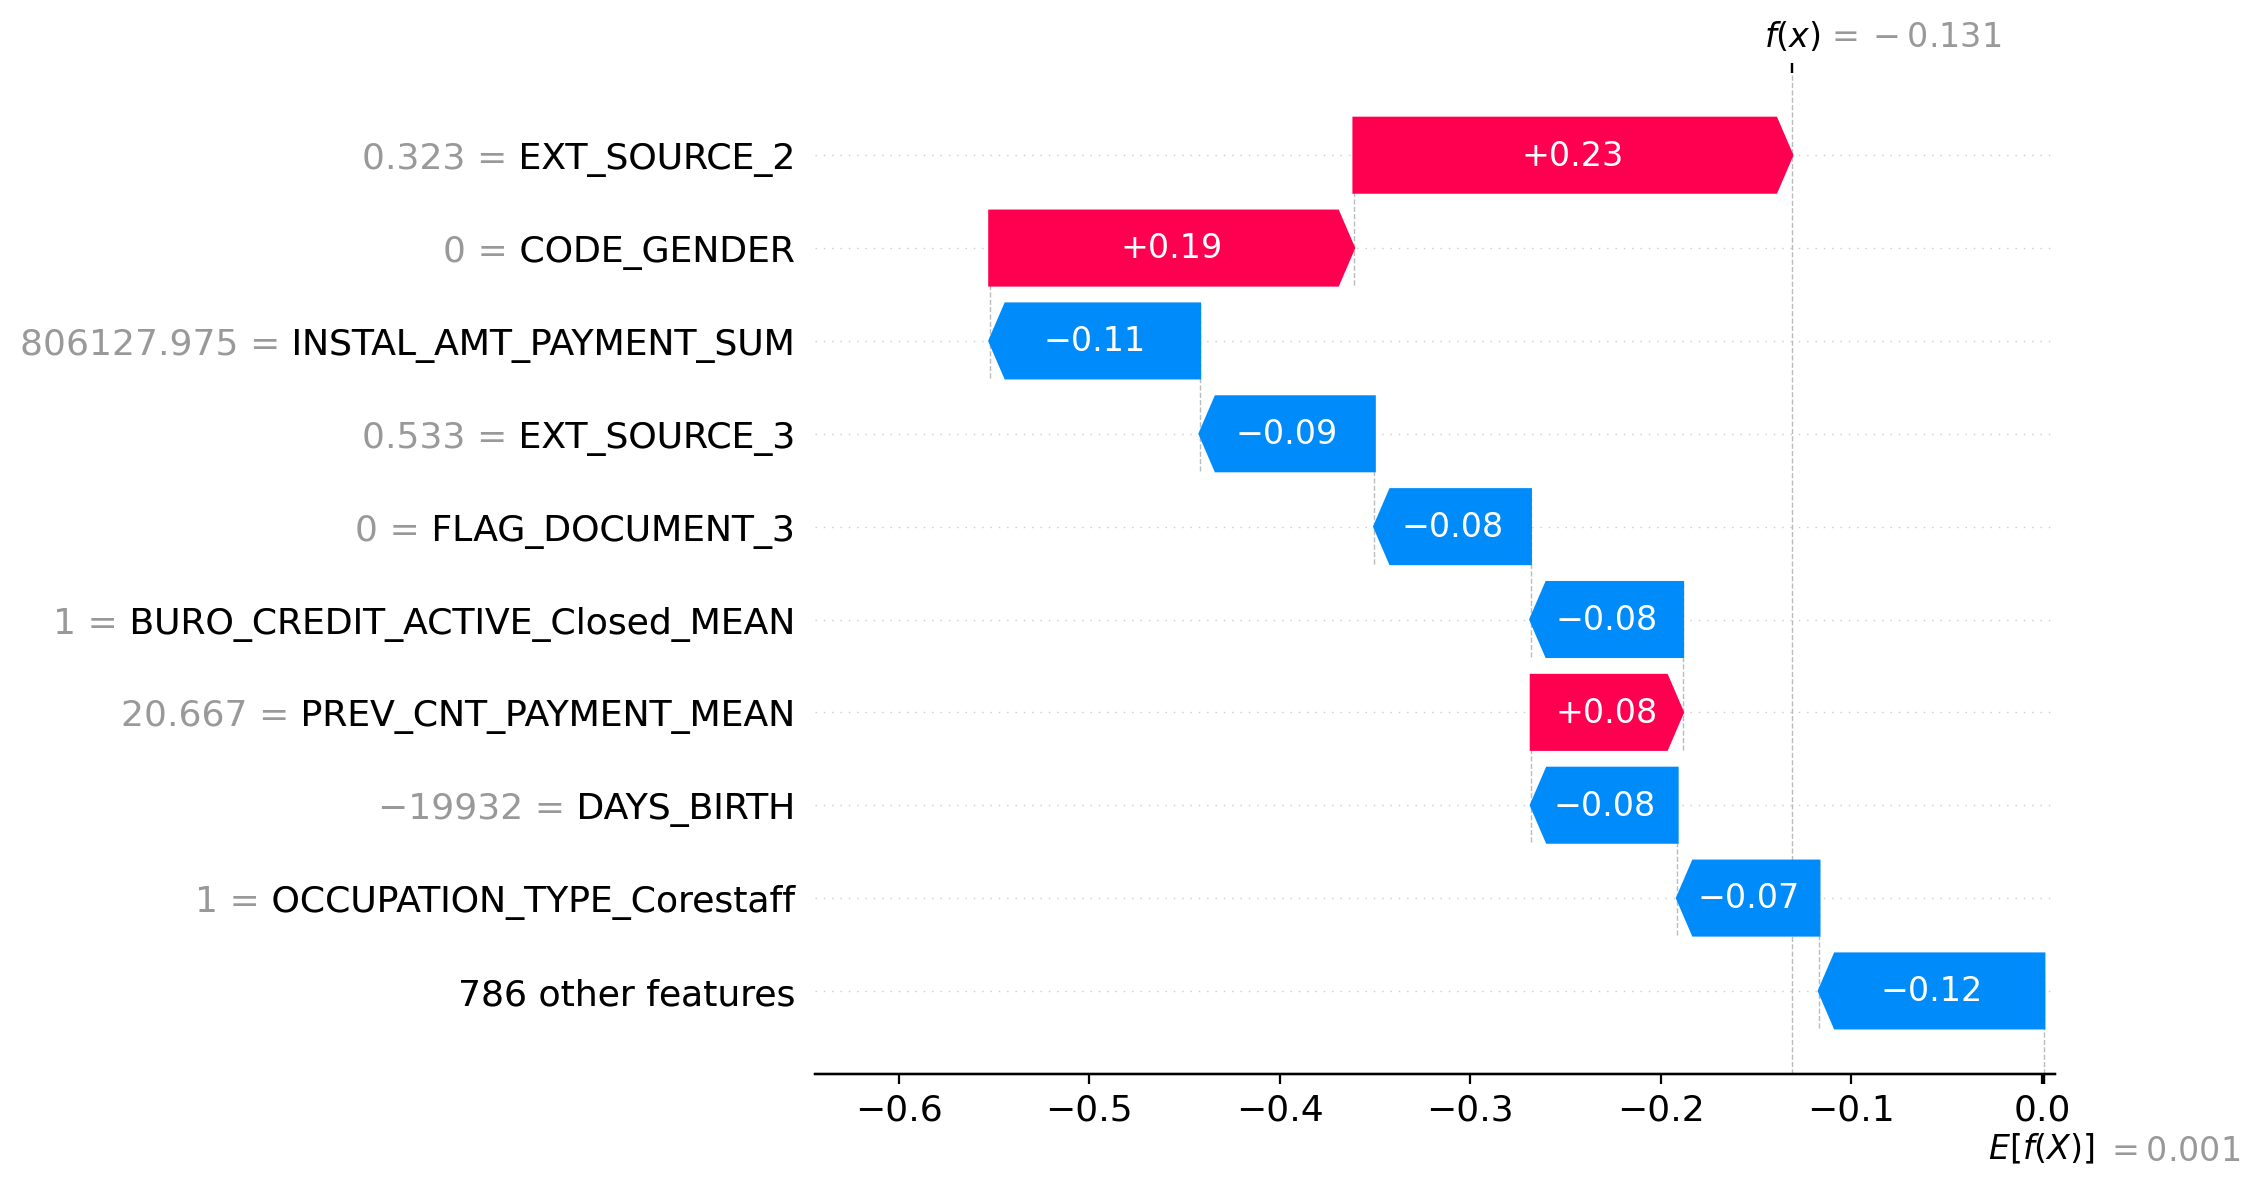

In [132]:
id = 4
index = X_test_fold.index.get_loc(id)  # Récupère l'index local correspondant à l'ID spécifié

# Obtenez les valeurs SHAP pour l'index spécifié
instance_shap_values = shap_values[1][index, :]

# Créez une explication SHAP pour l'instance spécifique
instance_explanation = shap.Explanation(instance_shap_values,
                                        data=X_test_fold.iloc[index, :],
                                        base_values=explainer.expected_value[1])

# Créez le shap.waterfall_plot pour l'ID 4
shap.plots.waterfall(instance_explanation)

In [106]:
id = 4

shap.force_plot(explainer.expected_value[1], shap_values[1][index, :], X_test_fold.iloc[index, :], link='logit')


In [112]:
X_test.index

RangeIndex(start=0, stop=48744, step=1)

# Test prod

In [113]:
model = pickle.load(open(path + 'model.pickle', 'rb'))

In [114]:
model

Pipeline(steps=[('std', StandardScaler()),
                ('undersampling', RandomUnderSampler(random_state=42)),
                ('model', LGBMClassifier(random_state=42))])

In [116]:
df_test = pickle.load(open(path + 'X_test_low.pickle', 'rb'))
df_train = pickle.load(open(path + 'X_train.pickle', 'rb'))

In [119]:
id = 100001 # refusé 
id = 100005 # accepté
X = df_test[df_test['SK_ID_CURR'] == id]
X.drop('SK_ID_CURR', axis=1, inplace=True) 

In [120]:
model.predict(X)

array([1.])

In [ ]:
shap.initjs()
index = client_features.index[0]
client_features = client_features.drop(columns=['index'])
explainer = shap.TreeExplainer(model['model'])
#observations = model['std'].transform(client_features)
shap_values = explainer.shap_values(client_features)
shap.summary_plot(shap_values, client_features, plot_type="bar")
plt.savefig('features importance.png', dpi=100)
st.image('features importance.png')

In [123]:
#def get_client_features():
#id = request.args.get("id_client")
id = 100005
client_data = df_test[df_test["SK_ID_CURR"] == int(id)]
client_data['index'] = client_data.index
print(client_data)
client_data.drop('SK_ID_CURR', axis=1, inplace=True) 
#print(client_data)
#return jsonify(client_data.to_dict(orient='records')[0])

   SK_ID_CURR  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
1      100005          0.0           0.0              0.0           0.0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1           99000.0    222768.0      17370.0         180000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.035792    -18064.0        -4469.0            -9118.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1          -1623.0          9.0         1.0             1.0              0.0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
1               1.0         0.0         0.0              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
1                   2.0                          2.0                      9.0   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                         0.0                

In [124]:
client_data

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
1          0.0           0.0              0.0           0.0           99000.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
1    222768.0      17370.0         180000.0                    0.035792   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
1    -18064.0        -4469.0            -9118.0          -1623.0          9.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
1         1.0             1.0              0.0               1.0         0.0   

   FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1         0.0              2.0                   2.0   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
1                          2.0                      9.0   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                         0.0                         0.0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                          0.0                     0.0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
1                     0.0                      0.0       0.56499   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
1      0.291656      0.432962           0.088            0.0765   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
1                       0.9816           0.7552          0.0213   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
1            0.0         0.1379         0.1667         0.2083        0.0482   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
1                0.0756          0.0749                      0.0   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
1             0.0036            0.084             0.0749   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
1                        0.9816            0.7648           0.0192   

   ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  \
1             0.0          0.1379          0.1667          0.2083   

   LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  \
1         0.0459                 0.0771           0.0733   

   NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  \
1                       0.0              0.0011           0.0874   

   BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  \
1             0.0761                        0.9816            0.7585   

   COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  \
1            0.021             0.0          0.1379          0.1667   

   FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  \
1          0.2083         0.0487                  0.077           0.0754   

   NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  \
1                       0.0              0.0031           0.069   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
1                       0.0                       0.0                     0.0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
1              0.0              1.0              0.0              0.0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
1              0.0              0.0              0.0              0.0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
1               0.0               0.0               0.0               0.0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
1               0.0               0.0               0.0               0.0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  ...  \
1          

# Shap

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

import shap
print(shap.__version__)

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
model = RandomForestClassifier(max_depth=5, n_estimators=100).fit(X, y)
explainer = TreeExplainer(model)
# explainer = shap.TreeExplainer(model)
sv = explainer(X)
# shap_values = shap.explainer(X)
exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X.values, 
                  feature_names=X.columns)
# exp = E
idx = 48
waterfall(exp[idx])

In [135]:
from shap import TreeExplainer, Explanation
from shap.plots import waterfall
import shap

In [ ]:
# Création d'un objet pour fonctionner avec les arbres de décisions
explainer = shap.TreeExplainer(undersampling_pipeline['model'])
# Standardisation 
observations = undersampling_pipeline['std'].transform(X_test_fold)
# calcule les valeurs SHAP pour les observations transformées en utilisant l'objet explainer
shap_values = explainer.shap_values(observations)
# Génère un diagramme à barres qui résume les importances des features 
shap.summary_plot(shap_values, X_test_fold, plot_type="bar")

In [155]:
X_test.head()

SK_ID_CURR  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100001          1.0           0.0              0.0           0.0   
1      100005          0.0           0.0              0.0           0.0   
2      100013          0.0           1.0              0.0           0.0   
3      100028          1.0           0.0              0.0           2.0   
4      100038          0.0           1.0              1.0           1.0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          135000.0    568800.0      20560.5         450000.0   
1           99000.0    222768.0      17370.0         180000.0   
2          202500.0    663264.0      69777.0         630000.0   
3          315000.0   1575000.0      49018.5        1575000.0   
4          180000.0    625500.0      32067.0         625500.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018850    -19241.0        -2329.0            -5170.0   
1                    0.035792    -18064.0        -4469.0            -9118.0   
2                    0.019101    -20038.0        -4458.0            -2175.0   
3                    0.026392    -13976.0        -1866.0            -2000.0   
4                    0.010032    -13040.0        -2191.0            -4000.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0           -812.0          9.0         1.0             1.0              0.0   
1          -1623.0          9.0         1.0             1.0              0.0   
2          -3503.0          5.0         1.0             1.0              0.0   
3          -4208.0          9.0         1.0             1.0              0.0   
4          -4262.0         16.0         1.0             1.0              1.0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0               1.0         0.0         1.0              2.0   
1               1.0         0.0         0.0              2.0   
2               1.0         0.0         0.0              2.0   
3               1.0         1.0         0.0              4.0   
4               1.0         0.0         0.0              3.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                   2.0                          2.0                     18.0   
1                   2.0                          2.0                      9.0   
2                   2.0                          2.0                     14.0   
3                   2.0                          2.0                     11.0   
4                   2.0                          2.0                      5.0   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                          0.0                     0.0   
1                          0.0                     0.0   
2                          0.0                     0.0   
3                          0.0                     0.0   
4                          0.0                     0.0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                     0.0                      0.0      0.752614   
1                     0.0                      0.0      0.564990   
2                     0.0                      0.0      0.506155   
3                     0.0                      0.0      0.525734   
4                     1.0                      1.0      0.202145   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.789654      0.159520          0.0660            0.0590   
1      0.291656      0.432962          0.0880            0.0765   
2      

In [151]:
client_features = X_test.drop(columns=['SK_ID_CURR'])
observations = model['std'].transform(client_features)
shap_values = explainer.shap_values(observations)

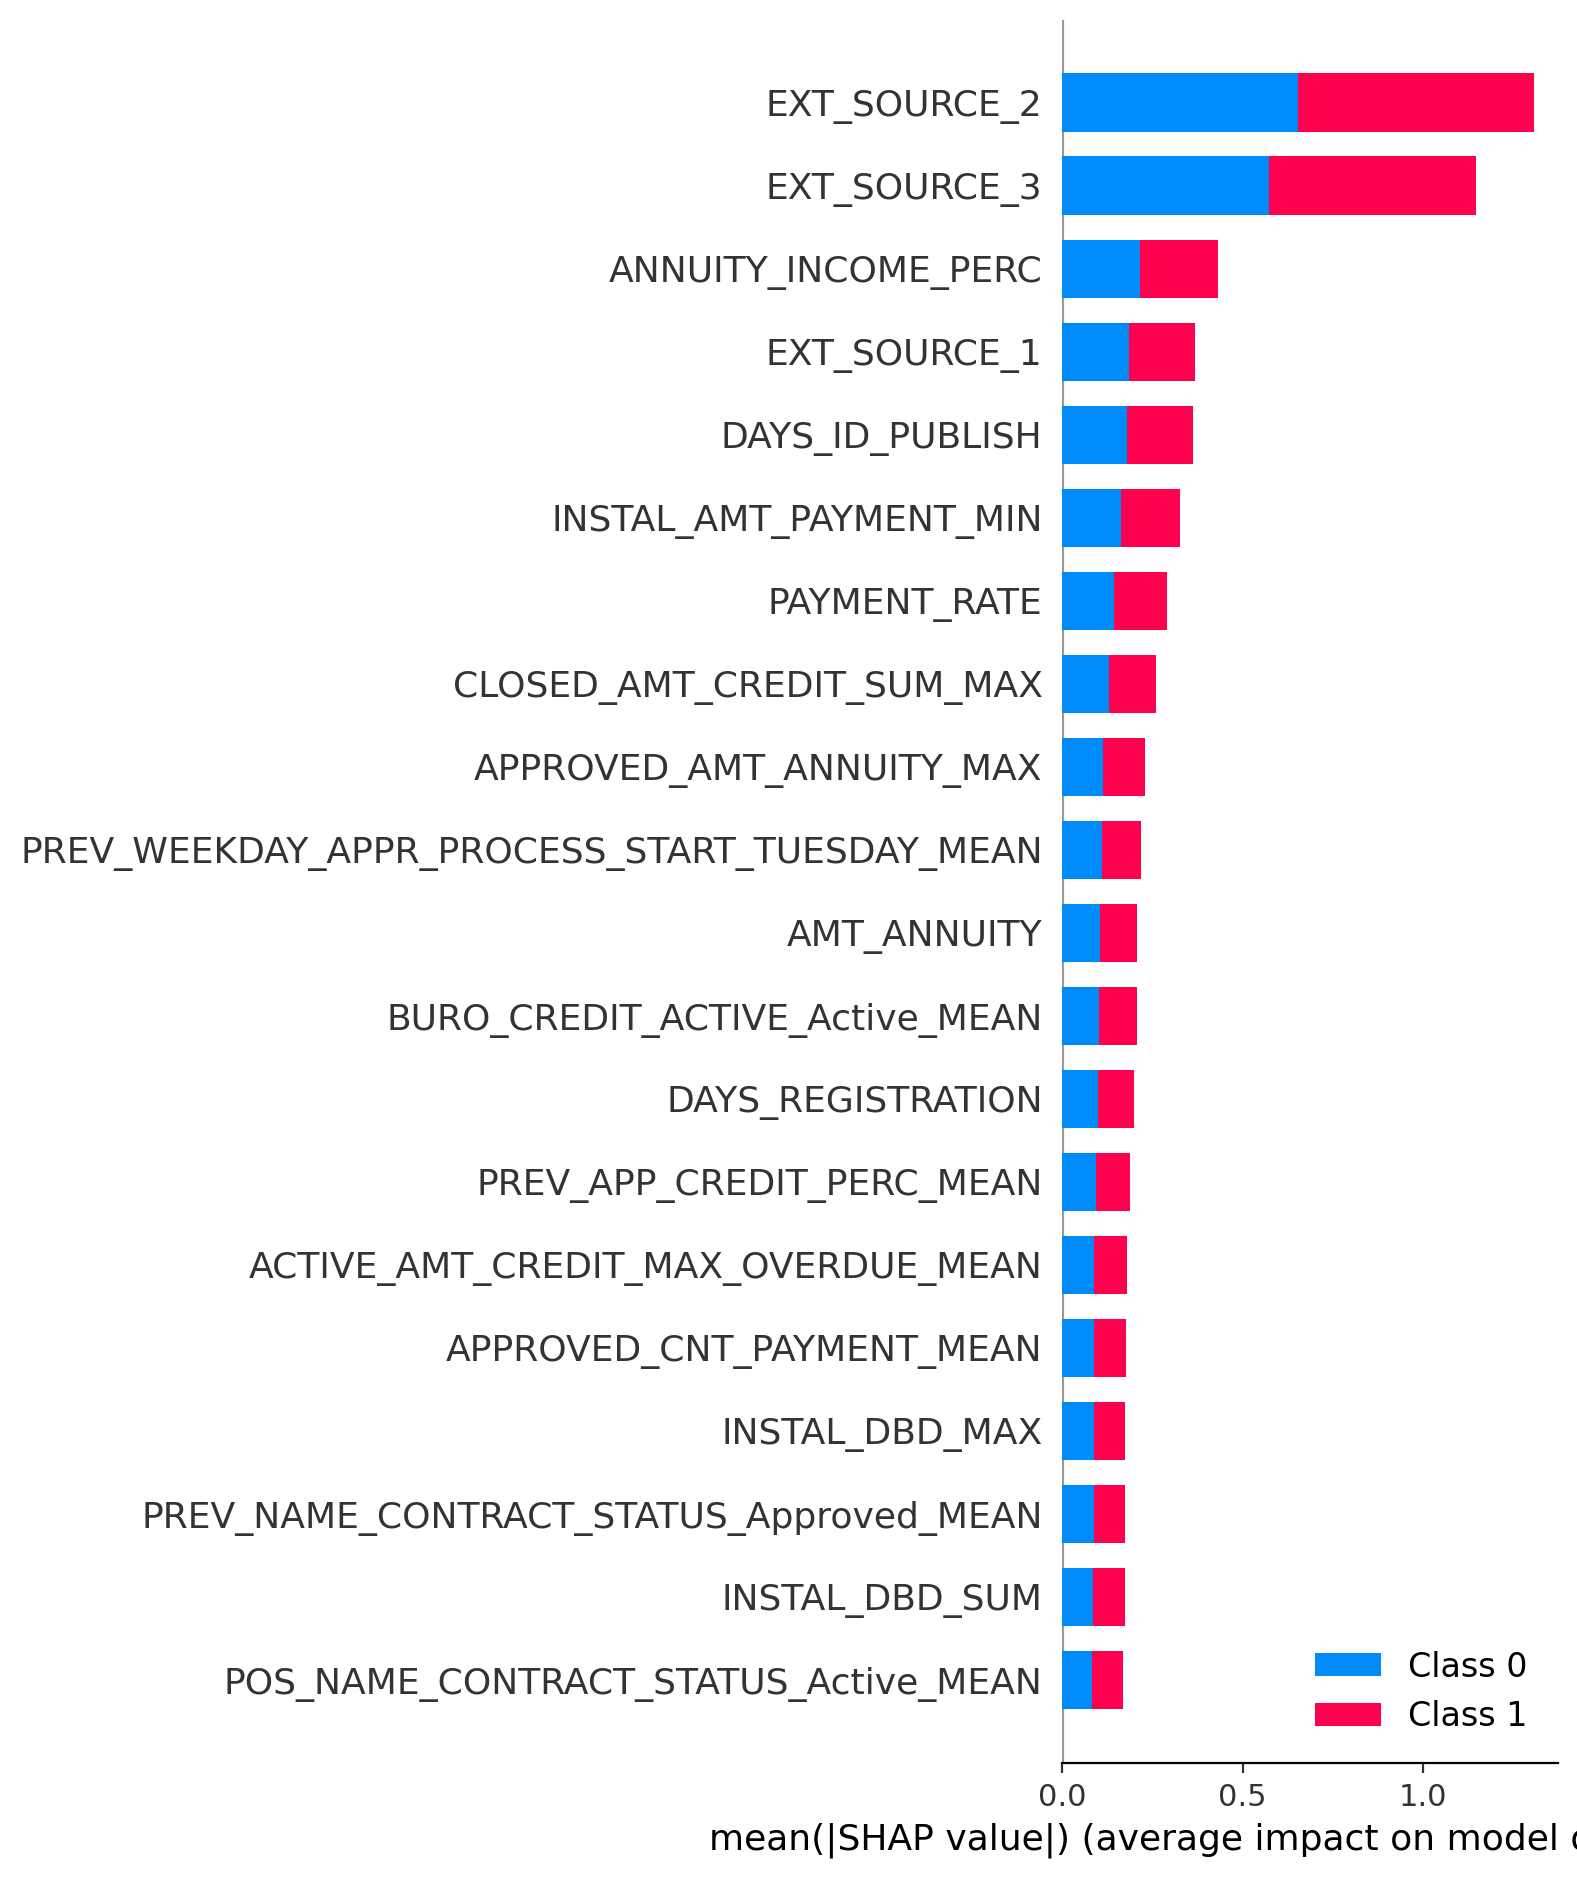

In [154]:
shap.summary_plot(shap_values, client_features, plot_type="bar")

In [165]:
client_features = X_test.drop(columns=['SK_ID_CURR'])
observations = model['std'].transform(client_features)
shap_values = explainer.shap_values(observations)

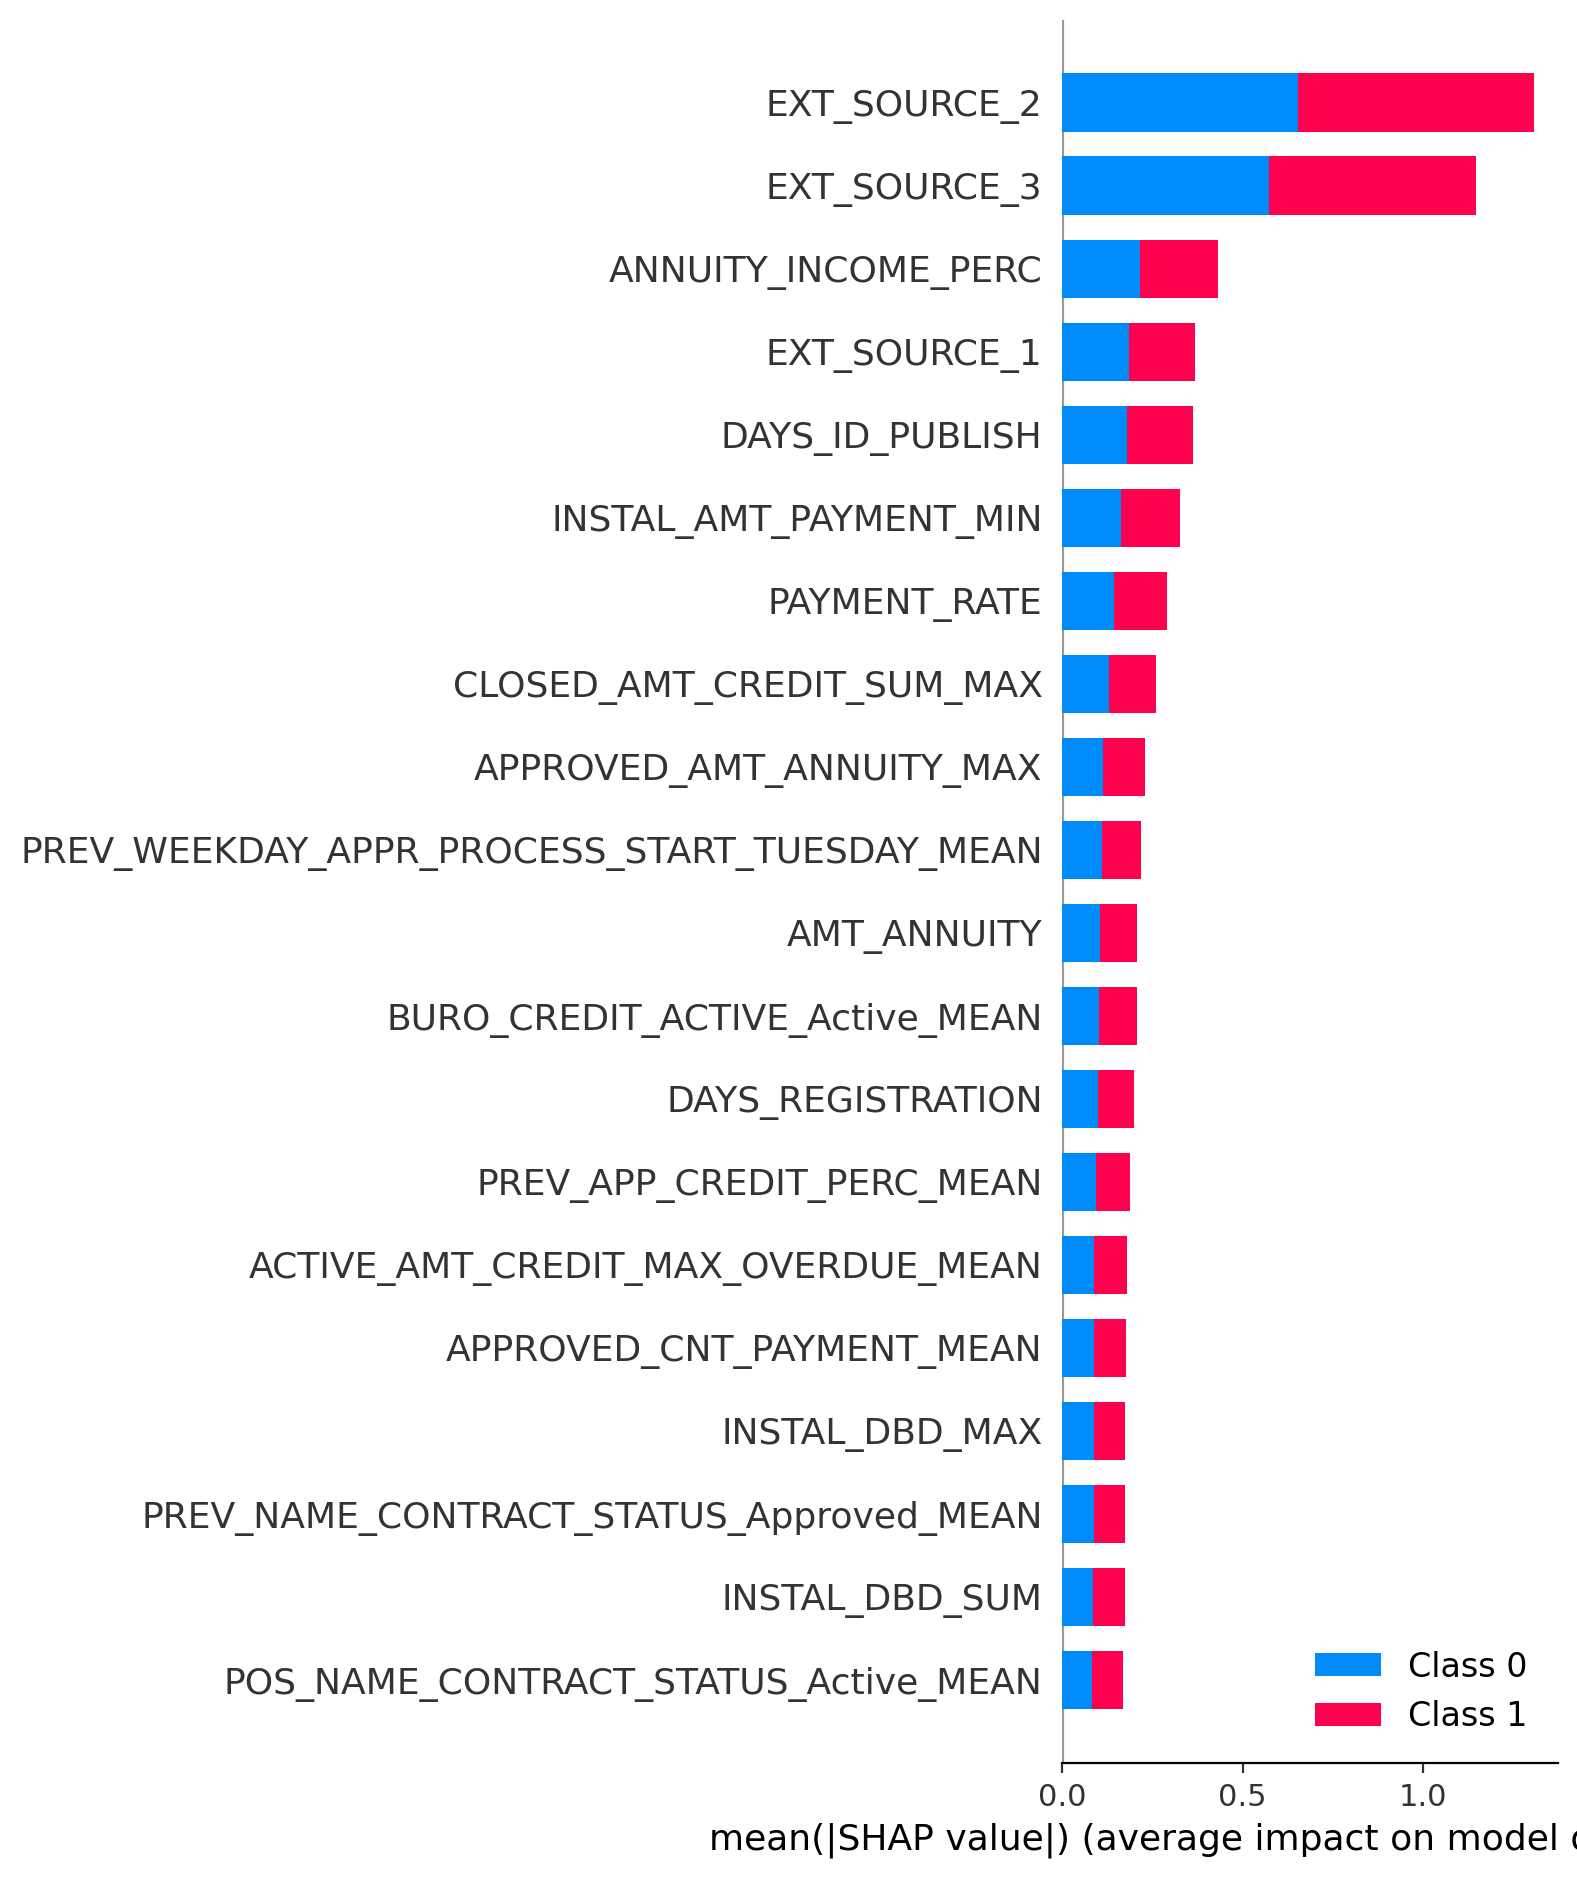

In [178]:
shap.summary_plot(shap_values, client_features, plot_type="bar")

In [173]:
shap_values = explainer.shap_values(observations)

In [166]:
explainer = TreeExplainer(model['model'])
client_features = X_test.drop(columns=['SK_ID_CURR'])
observations = model['std'].transform(client_features)
sv = explainer(observations)

In [172]:
type(sv)

shap._explanation.Explanation

In [167]:
exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=observations, 
                  feature_names=client_features.columns)

In [171]:
type(exp)

shap._explanation.Explanation

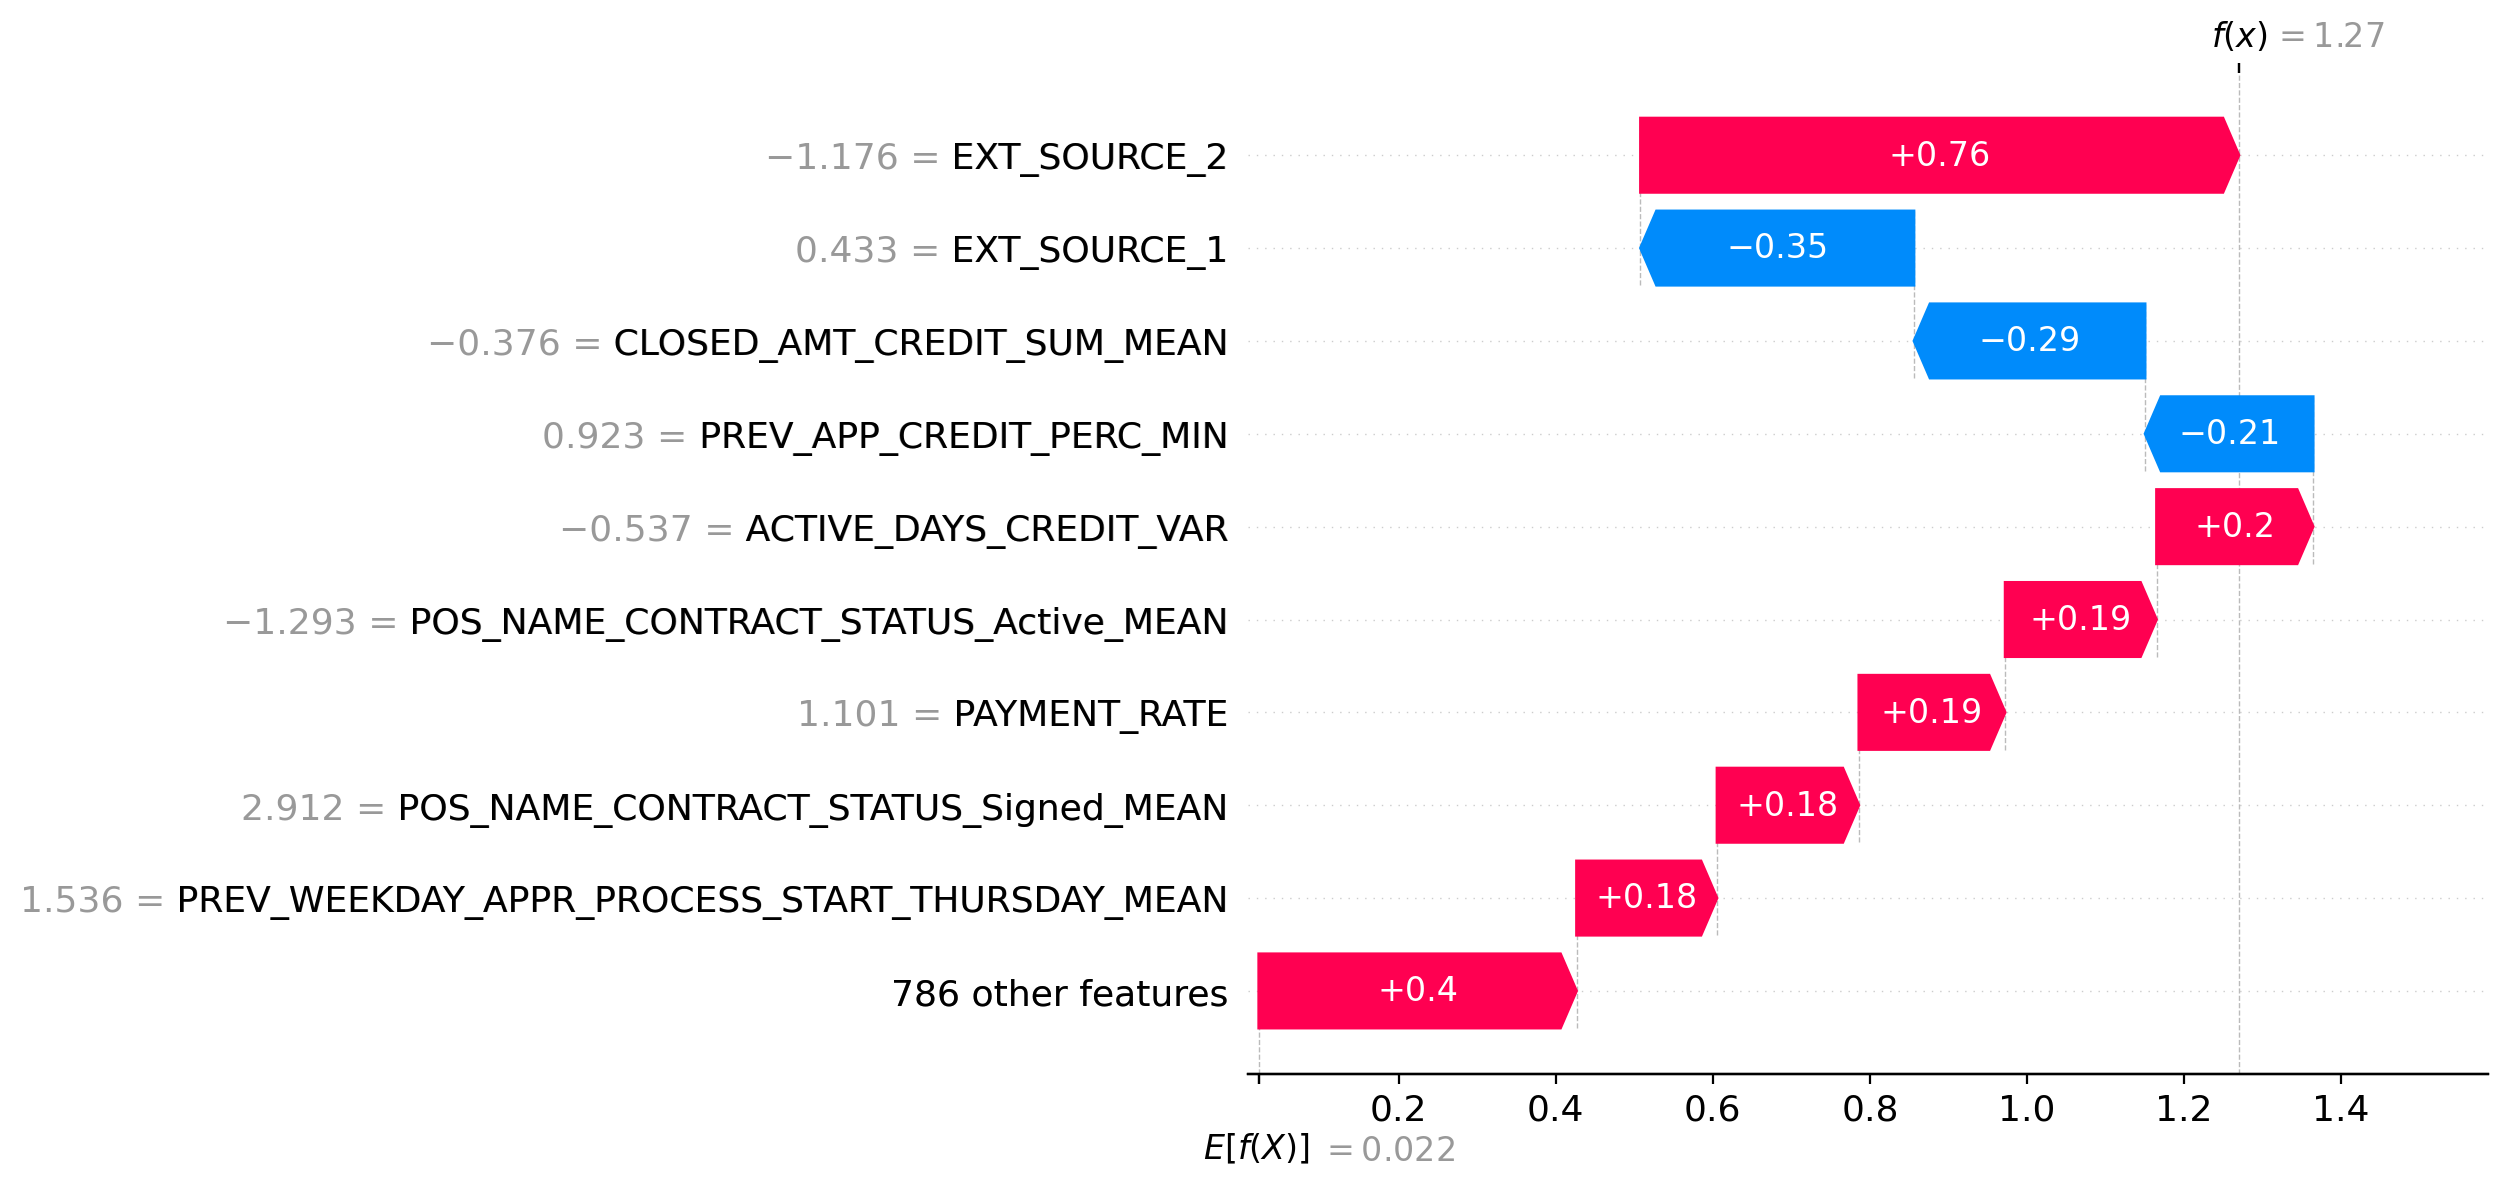

In [168]:
idx = 1
waterfall(exp[idx])

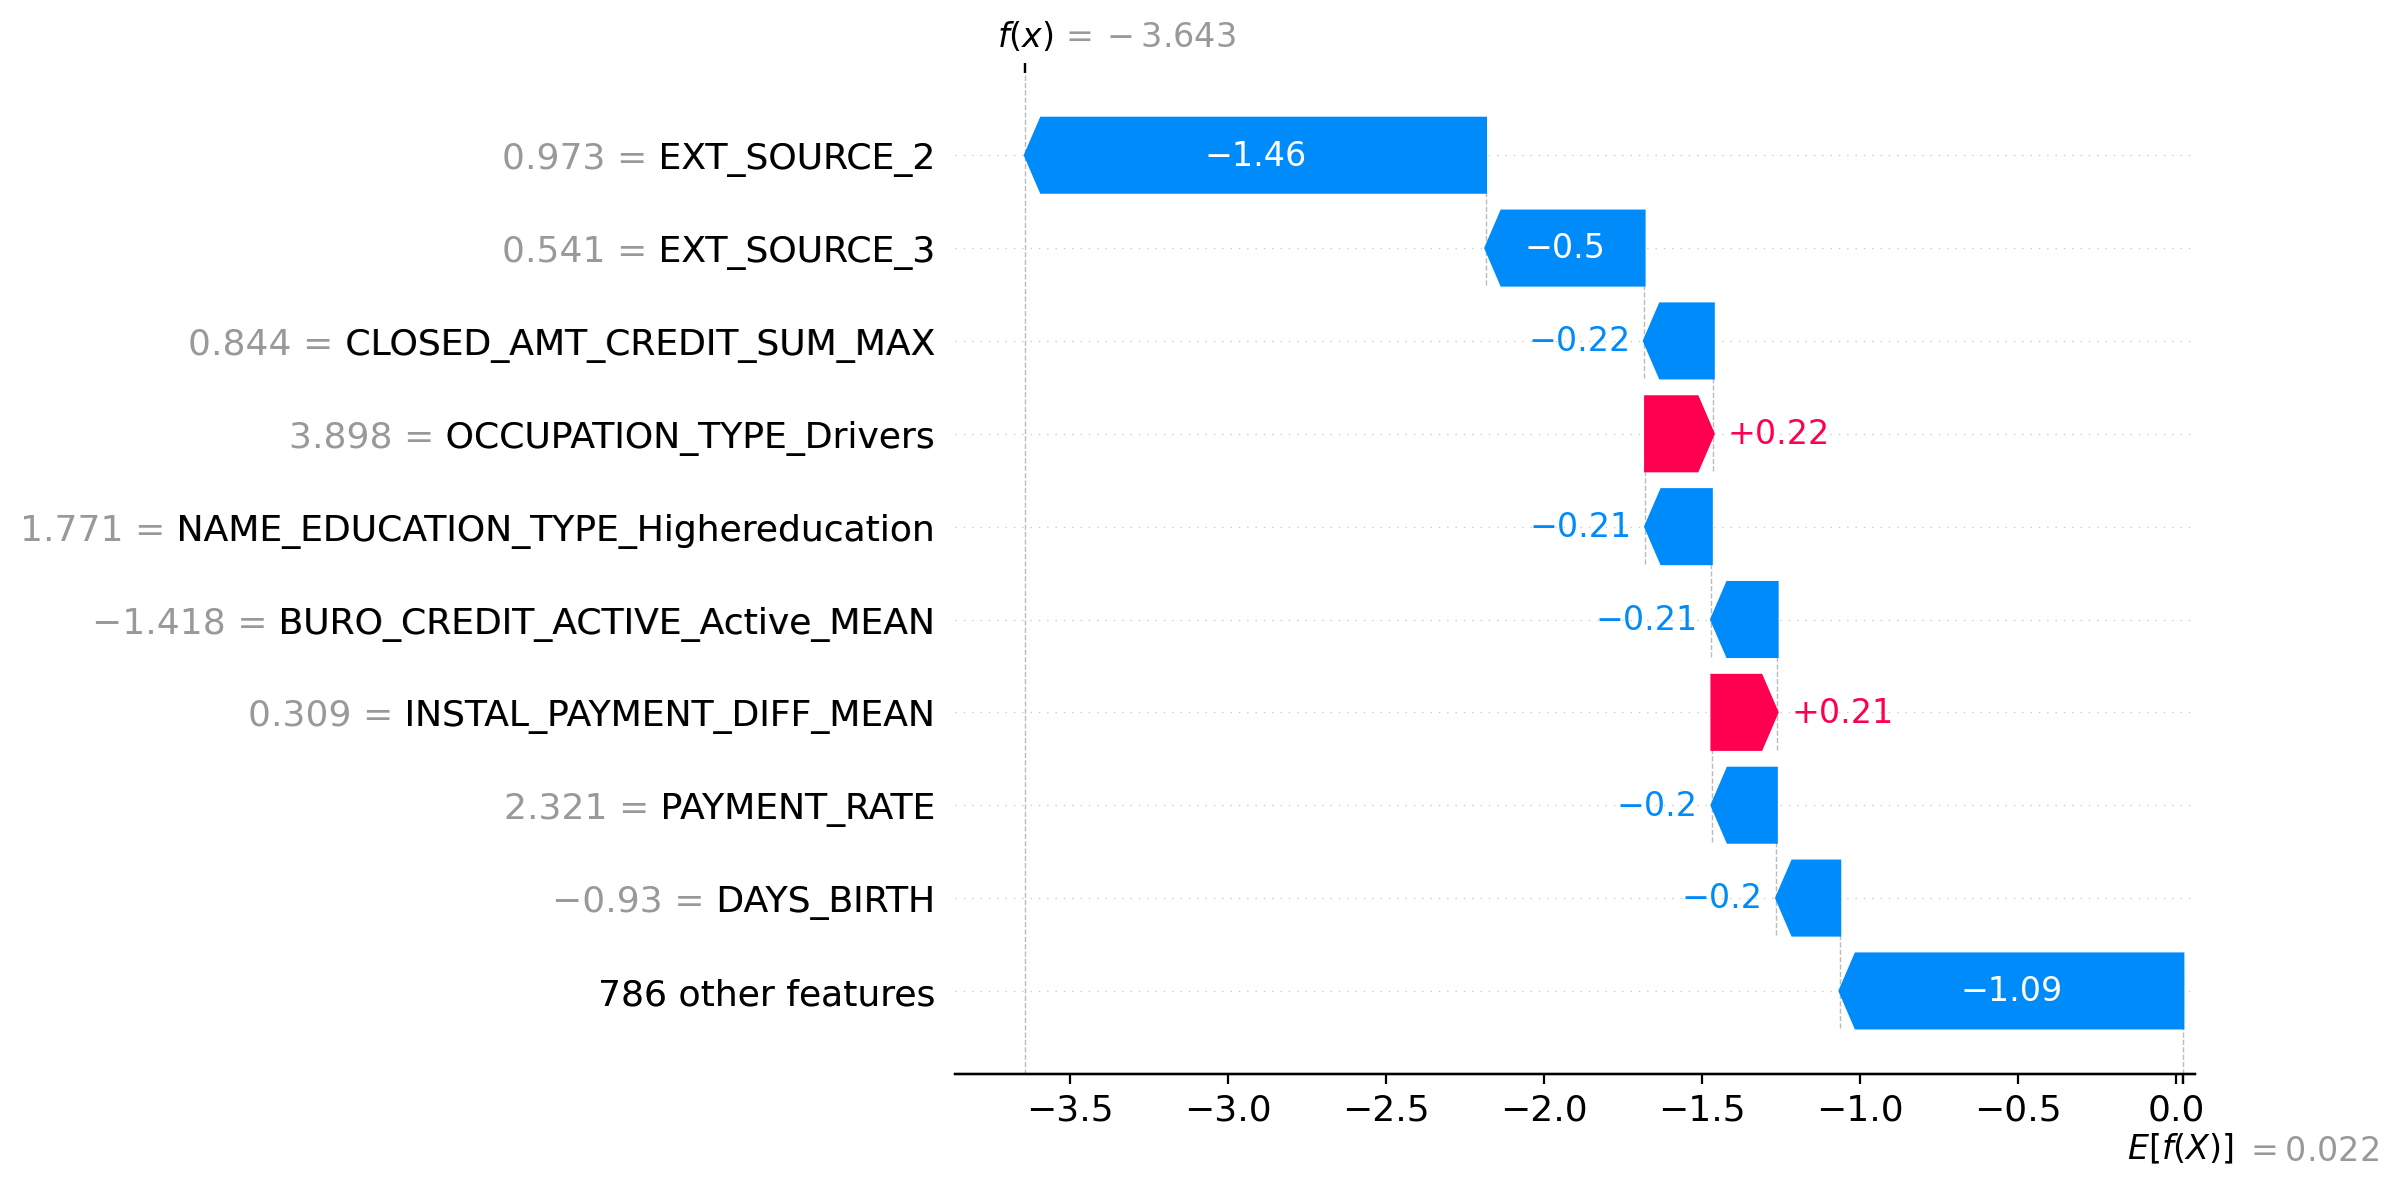

In [169]:
idx = 2
waterfall(exp[idx])

In [160]:
#####################################################################################

In [161]:
explainer = TreeExplainer(model['model'])
client_features = X_test.drop(columns=['SK_ID_CURR'])
sv = explainer(client_features)

In [162]:
exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=observations, 
                  feature_names=client_features.columns)

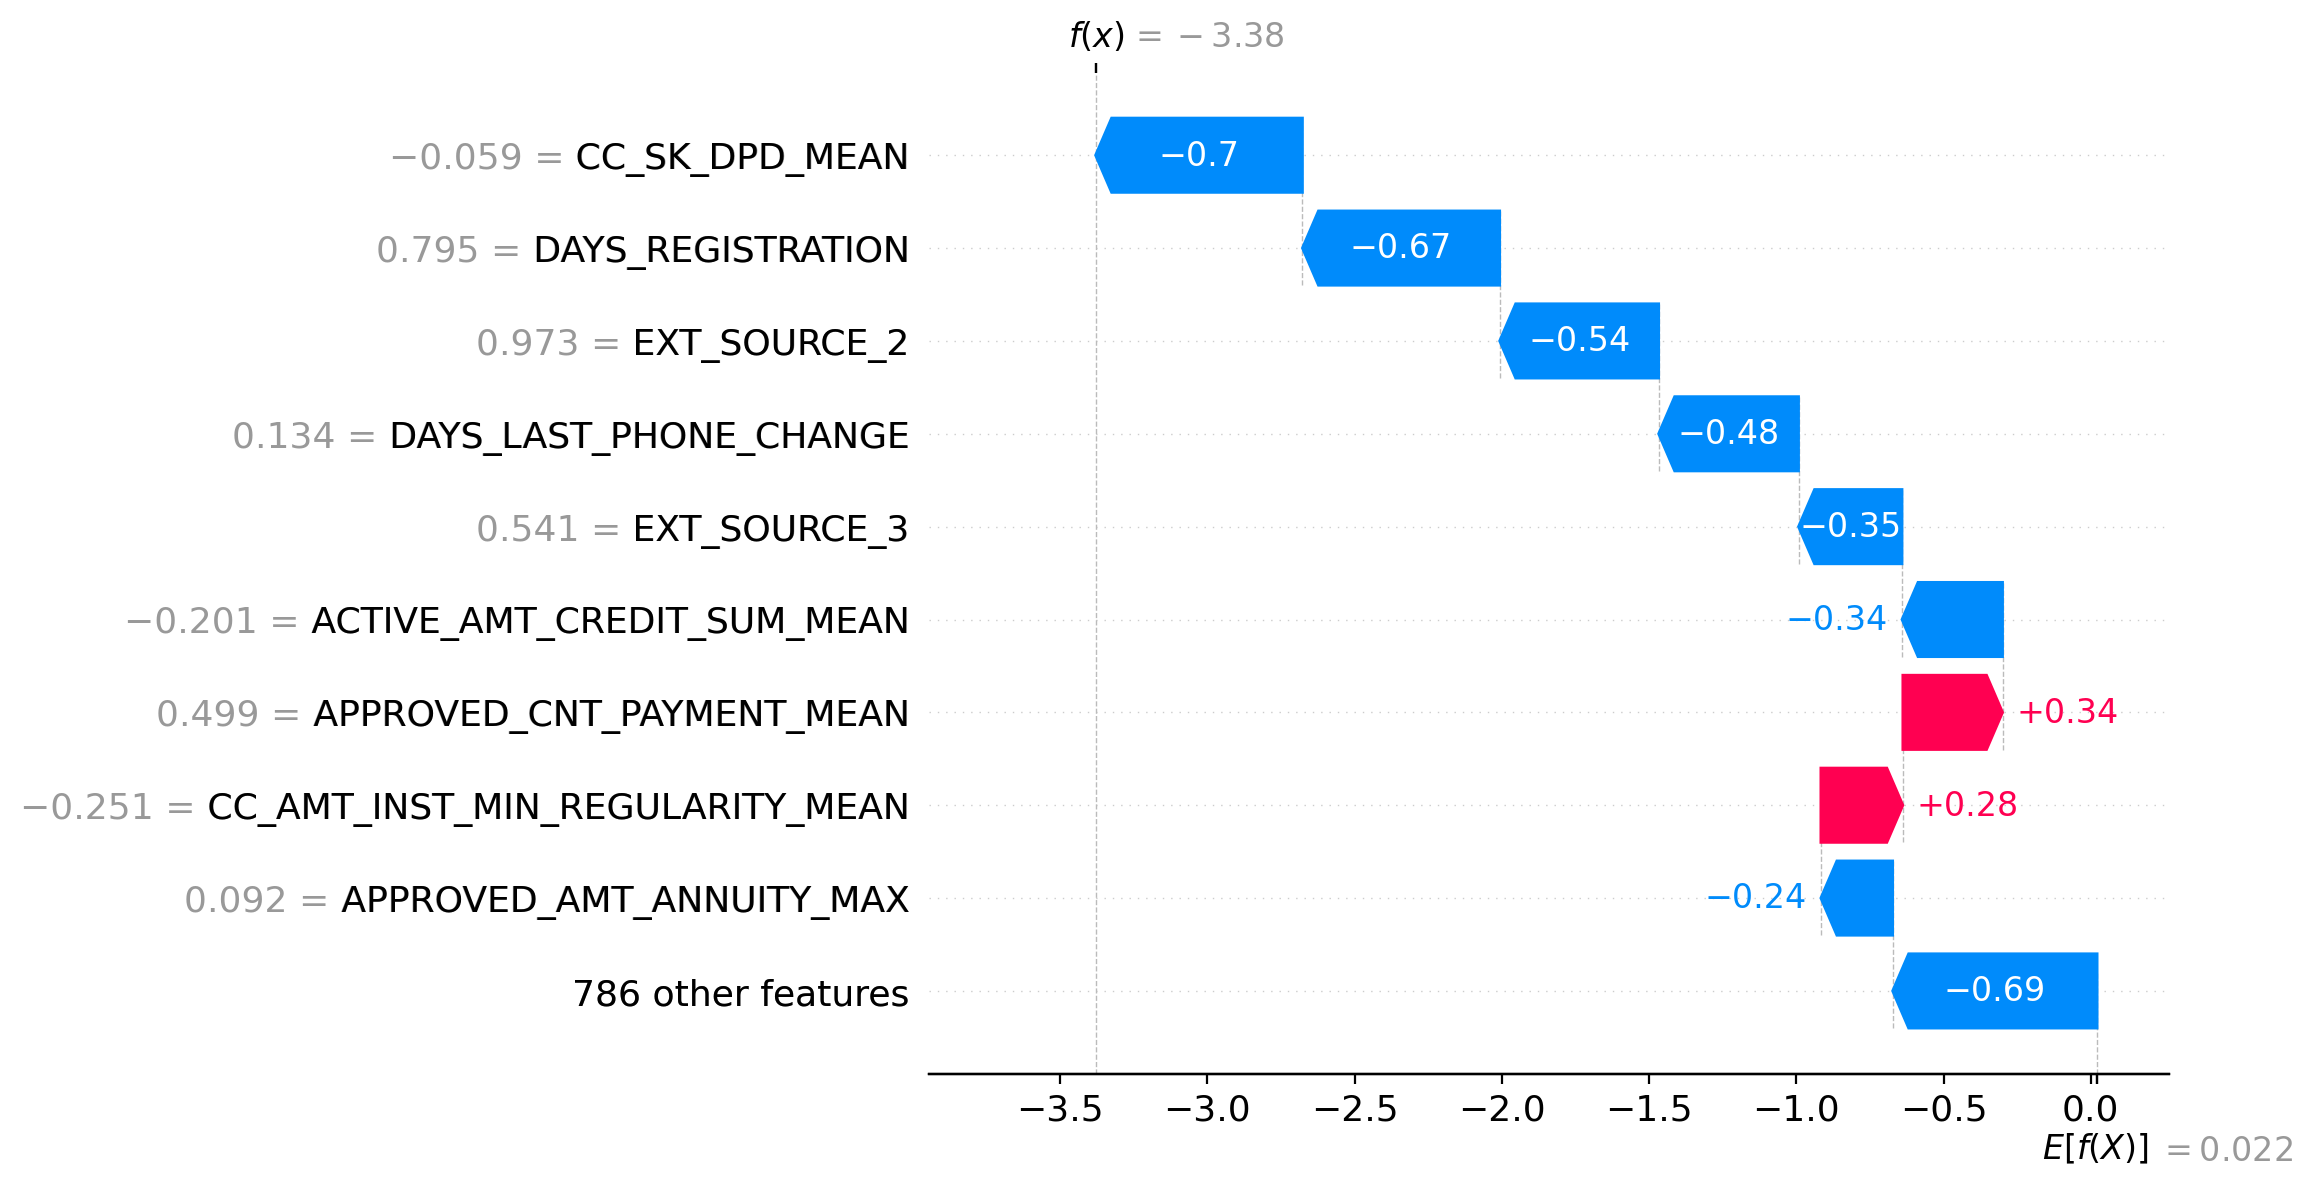

In [164]:
idx = 2
waterfall(exp[idx])

In [ ]:
df_test.drop(columns=['SK_ID_CURR'], inplace=True)
explainer = TreeExplainer(model['model'])
observations = model['std'].transform(df_test)
shap_values = explainer.shap_values(observations)
pickle.dump(shap_values, open('shap_values.pickle', 'wb'))
shap_values = pickle.load(open('shap_values.pickle', 'rb'))

In [180]:
df_test.drop(columns=['SK_ID_CURR'], inplace=True)

In [181]:
explainer = TreeExplainer(model['model'])

In [182]:
observations = model['std'].transform(df_test)

In [183]:
shap_values = explainer.shap_values(observations)

In [186]:
with open(path + "shap_values.pickle", 'wb') as file:
    pickle.dump(shap_values, file)

with open(path + "shap_values.pickle", 'rb') as file:
    shap_values = pickle.load(file)
X_test.shape

(48744, 796)

In [187]:
dict_infos = {
       "status_famille" : data_client["NAME_FAMILY_STATUS"].item(),
       "nb_enfant" : data_client["CNT_CHILDREN"].item(),
       "age" : int(data_client["DAYS_BIRTH"].values / -365),
       "revenus" : data_client["AMT_INCOME_TOTAL"].item(),
       "montant_credit" : data_client["AMT_CREDIT"].item(),
       "annuites" : data_client["AMT_ANNUITY"].item(),
       "montant_bien" : data_client["AMT_GOODS_PRICE"].item()
       }

NameError: name 'data_client' is not defined

In [83]:
with open(path + "app_test.pickle", 'wb') as file:
    pickle.dump(app_test, file)

with open(path + "app_test.pickle", 'rb') as file:
    app_test = pickle.load(file)
app_test.shape

(48744, 121)

Total Number of unique categories of NAME_EDUCATION_TYPE = 5


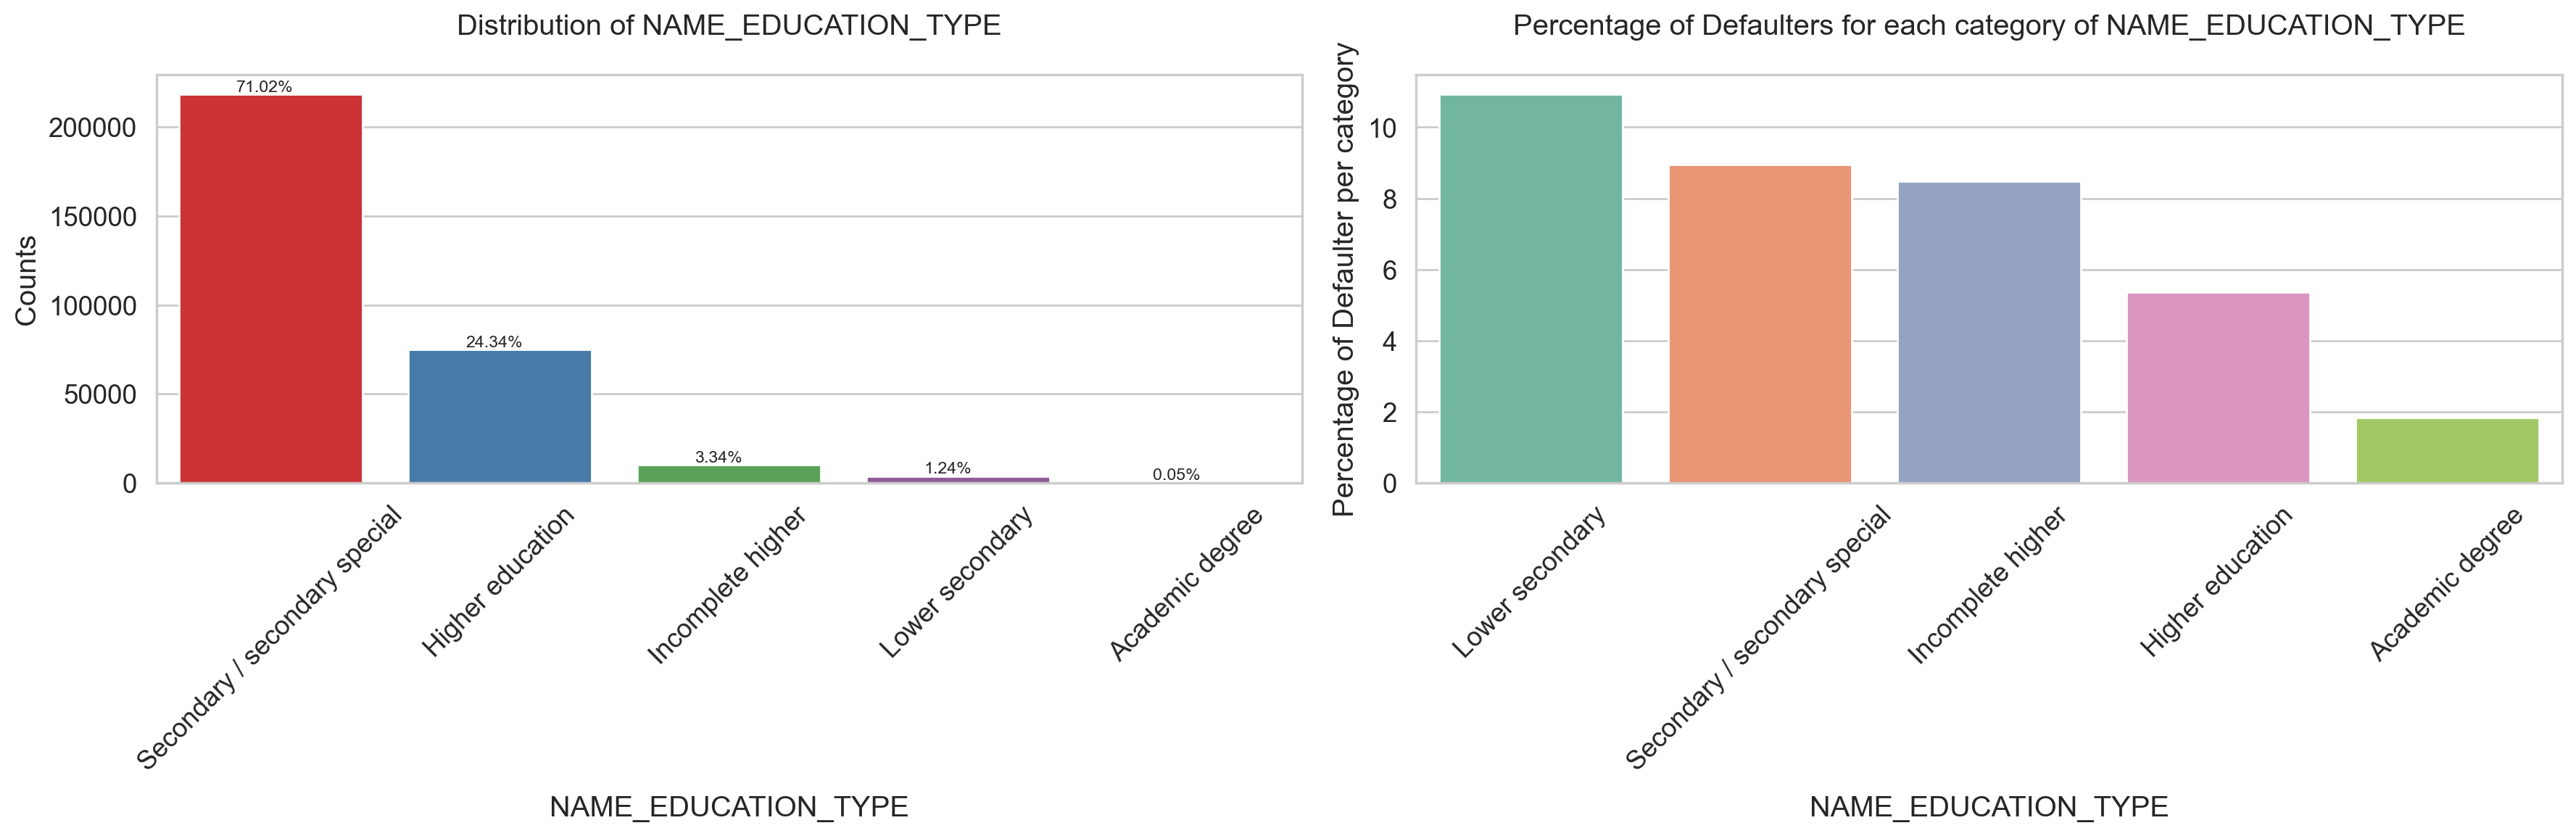

In [51]:
plot_categorical_variables_bar(app_train, column_name = 'NAME_EDUCATION_TYPE', rotation = 45, horizontal_adjust = 0.25)

Total Number of unique categories of NAME_EDUCATION_TYPE = 5


AttributeError: 'DataFrame' object has no attribute 'TARGET'

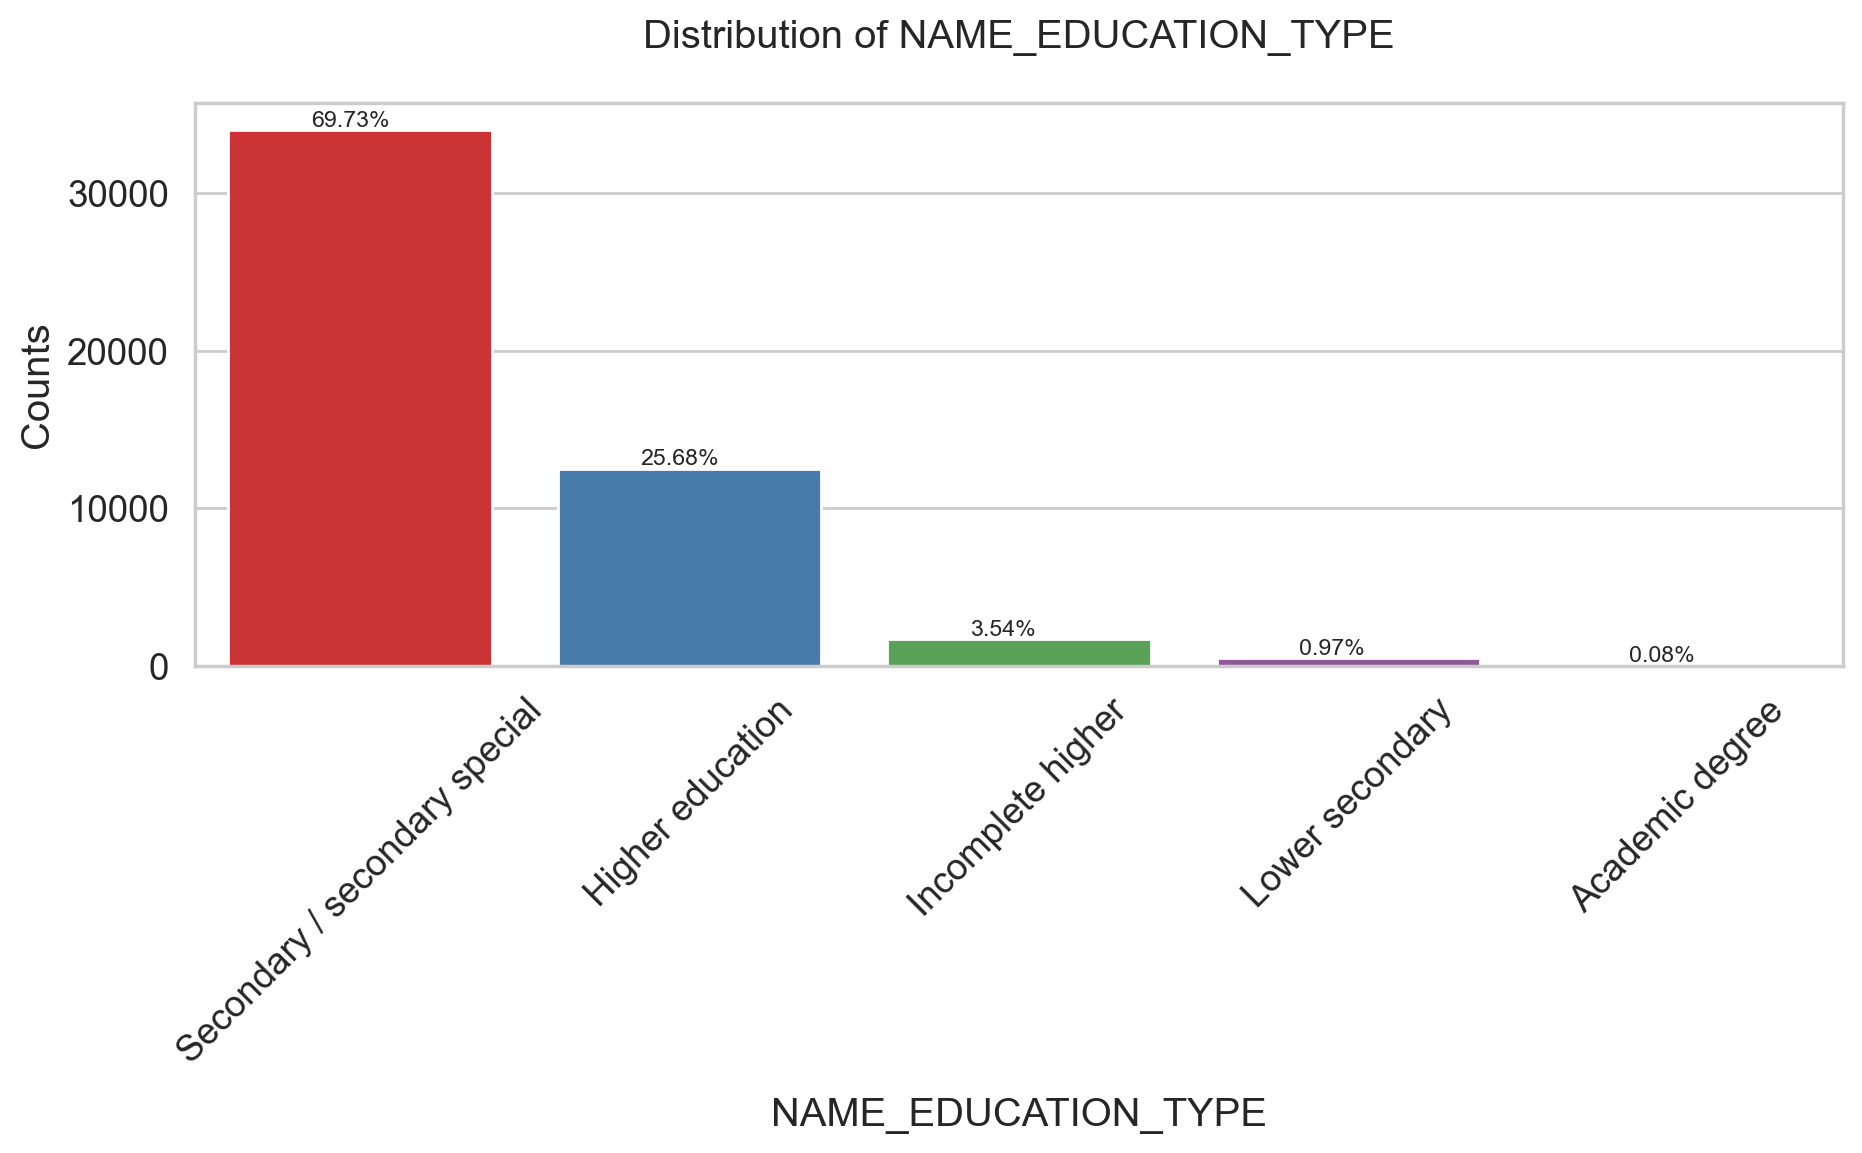

In [80]:
plot_categorical_variables_bar(app_test, column_name = 'NAME_EDUCATION_TYPE', rotation = 45, horizontal_adjust = 0.25)

Total Number of unique categories of OCCUPATION_TYPE = 19


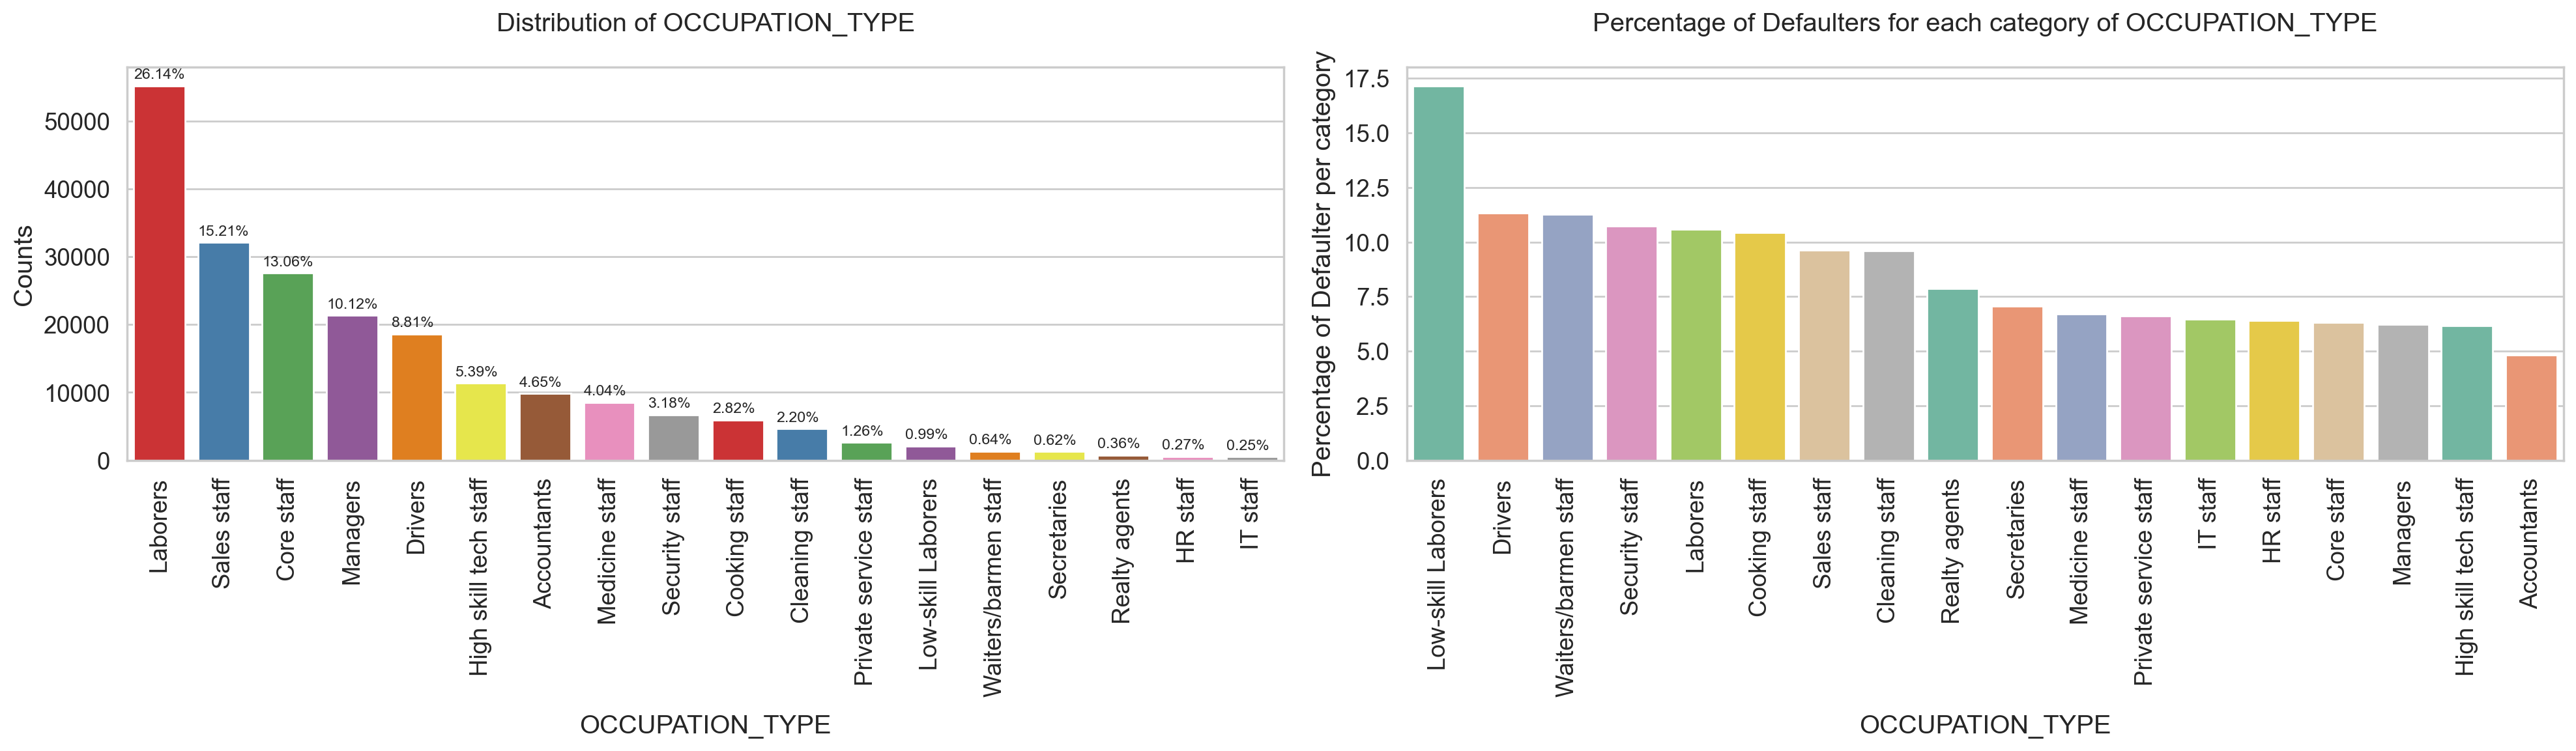

In [52]:
plot_categorical_variables_bar(app_train, column_name = 'OCCUPATION_TYPE', figsize = (20,6), rotation = 90)

In [82]:
app_train['CNT_CHILDREN']

0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: CNT_CHILDREN, Length: 307511, dtype: int64

(48744, 797)

In [70]:
X_test.loc[X_test['SK_ID_CURR'] == 100005]

index  SK_ID_CURR  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
1    1.0      100005          0.0           0.0              0.0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1           0.0           99000.0    222768.0      17370.0         180000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.035792    -18064.0        -4469.0            -9118.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1          -1623.0          9.0         1.0             1.0              0.0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
1               1.0         0.0         0.0              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
1                   2.0                          2.0                      9.0   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                         0.0                         0.0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                          0.0                     0.0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
1                     0.0                      0.0       0.56499   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
1      0.291656      0.432962           0.088            0.0765   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
1                       0.9816           0.7552          0.0213   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
1            0.0         0.1379         0.1667         0.2083        0.0482   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
1                0.0756          0.0749                      0.0   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
1             0.0036            0.084             0.0749   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
1                        0.9816            0.7648           0.0192   

   ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  \
1             0.0          0.1379          0.1667          0.2083   

   LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  \
1         0.0459                 0.0771           0.0733   

   NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  \
1                       0.0              0.0011           0.0874   

   BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  \
1             0.0761                        0.9816            0.7585   

   COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  \
1            0.021             0.0          0.1379          0.1667   

   FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  \
1          0.2083         0.0487                  0.077           0.0754   

   NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  \
1                       0.0              0.0031           0.069   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
1                       0.0                       0.0                     0.0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
1              0.0              1.0              0.0              0.0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
1              0.0              0.0              0.0              0.0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
1               0.0               0.0               0.0               0.0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
1               0.0               0.0               0.0               0.0   

   FLAG_DOCUMENT_18  ...  CC_AMT_PAYM

In [81]:
app_test

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [68]:
app_train.loc[app_train['SK_ID_CURR'] == 100001]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

In [ ]:
# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv('data/source/application_train.csv', nrows= num_rows)
    test_df = pd.read_csv('data/source/application_test.csv', nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

In [84]:
with open(path + "app_test.pickle", 'rb') as file:
    data_client = pickle.load(file)

In [85]:
data_client.shape

(48744, 121)

In [88]:
id = 100005
data_client = data_client.loc[data_client["SK_ID_CURR"] == int(id)]
data_client

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
1      100005         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1             0           99000.0    222768.0      17370.0         180000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1            Married  House / apartment                    0.035792   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
1      -18064          -4469            -9118.0            -1623          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
1           1               1                0                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1           0  Low-skill Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                       0                        0   

  ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  \
1     Self-employed       0.56499      0.291656      0.432962             NaN   

   BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  \
1               NaN                          NaN              NaN   

   COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
1             NaN            NaN            NaN            NaN            NaN   

   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
1           NaN                   NaN             NaN   

   NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
1                      NaN                NaN              NaN   

   BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
1                NaN                           NaN               NaN   

   COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  \
1              NaN             NaN             NaN             NaN   

   FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  \
1             NaN            NaN                    NaN              NaN   

   NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  \
1                       NaN                 NaN              NaN   

   BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  \
1                NaN                           NaN               NaN   

   COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  \
1              NaN             NaN             NaN             NaN   

   FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  \
1             NaN            NaN                    NaN              NaN   

   NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  \
1                       NaN                 NaN                NaN   

  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  \
1            NaN             NaN                NaN                 NaN   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
1                       0.0                       0.0                     0.0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
1                0                1  

In [ ]:
return jsonify(df_voisins.to_dict(orient='records'))

In [ ]:
@app.route("/load_voisins", methods=["GET"])
def load_voisins():
    id = request.args.get("id_client")
    interpretable_important_data = ['SK_ID_CURR',
                                    'PAYMENT_RATE',
                                    'AMT_ANNUITY',
                                    'DAYS_BIRTH',
                                    'DAYS_EMPLOYED',
                                    'ANNUITY_INCOME_PERC']
    data_client = df_test[df_test["SK_ID_CURR"] == int(id)][interpretable_important_data].values
    distances, indices = knn.kneighbors(data_client)
    df_train_selected = df_train[interpretable_important_data]  
    df_voisins = df_train_selected.iloc[indices[0], :]  
    print(df_voisins)
    return jsonify(df_voisins.to_dict(orient='records'))

In [ ]:
def load_voisins():
    # Requête permettant de récupérer les 5 dossiers
    voisins = requests.get(URL_API + "load_voisins", params={"id_client":id_client})
    voisins = json.loads(voisins.content.decode("utf-8"))
    #print(voisins)
    # On transforme le dictionnaire en dataframe
    voisins = pd.DataFrame.from_dict(voisins)
    #voisins = pd.DataFrame(voisins)
    return voisins

In [ ]:
def get_client_features():
    response = requests.get(URL_API + "get_client_features", params={"id_client": id_client})
    client_features = json.loads(response.content.decode("utf-8"))
    client_features = pd.DataFrame.from_dict(client_features, orient='index').T
    return client_features

In [ ]:
@app.route("/get_client_features", methods=["GET"])
def get_client_features():
    id = request.args.get("id_client")
    client_data = df_test[df_test["SK_ID_CURR"] == int(id)]
    client_data['index'] = client_data.index
    #print(client_data)
    client_data.drop('SK_ID_CURR', axis=1, inplace=True) 
    #print(client_data)
    return jsonify(client_data.to_dict(orient='records')[0])
    #return jsonify(client_data.to_dict(orient='records'))

In [ ]:
def load_voisins():
    #id = request.args.get("id_client")
    interpretable_important_data = ['SK_ID_CURR',
                                    'PAYMENT_RATE',
                                    'AMT_ANNUITY',
                                    'DAYS_BIRTH',
                                    'DAYS_EMPLOYED',
                                    'ANNUITY_INCOME_PERC']
    data_client = df_test[df_test["SK_ID_CURR"] == int(id)][interpretable_important_data].values
    distances, indices = knn.kneighbors(data_client)
    df_train_selected = df_train[interpretable_important_data]  
    df_voisins = df_train_selected.iloc[indices[0], :]  

In [89]:
# id = request.args.get("id_client")
id = 100005
interpretable_important_data = ['SK_ID_CURR',
                                    'PAYMENT_RATE',
                                    'AMT_ANNUITY',
                                    'DAYS_BIRTH',
                                    'DAYS_EMPLOYED',
                                    'ANNUITY_INCOME_PERC']

In [90]:
df_test = pickle.load(open(path + 'X_test_low.pickle', 'rb'))

In [92]:
knn = pickle.load(open(path + 'knn.pickle', 'rb'))

In [91]:
data_client = df_test[df_test["SK_ID_CURR"] == int(id)][interpretable_important_data].values

In [ ]:
distances, indices = knn.kneighbors(data_client)

In [ ]:
# @app.route("/get_client_features", methods=["GET"])
id = 100005
def load_voisins():
    interpretable_important_data = [    'PAYMENT_RATE',
                                    'AMT_ANNUITY',
                                    'DAYS_BIRTH',
                                    'DAYS_EMPLOYED',
                                    'ANNUITY_INCOME_PERC']
    #selection client
    data_client = df_test[df_test["SK_ID_CURR"] == int(id)][interpretable_important_data]
    distances, indices = knn.kneighbors(data_client)
    X_train_selected = X_train[interpretable_important_data]
    # selections des plus proches voisins
    df_voisins = X_train_selected.iloc[indices[0], :]
    # Selection des colonnes à afficher
    affichage_colonne = [    
                            'SK_ID_CURR',
                            'AMT_ANNUITY',
                             'DAYS_BIRTH',
                             'DAYS_EMPLOYED',
                             'NAME_EDUCATION_TYPE',
                             'OCCUPATION_TYPE',

                         ]
    df_voisins = app_train.loc[df_voisins.index][affichage_colonne]
    # traitement champ Day employed
    from datetime import datetime, timedelta
    from dateutil.relativedelta import relativedelta
    def days_to_duration(days):
        now = datetime.now()
        target_date = now + timedelta(days=days)
        delta = relativedelta(target_date, now)
        return f"{abs(delta.years)}y {abs(delta.months)}m {abs(delta.days)}d"
    df_voisins['DAYS_EMPLOYED'] = df_voisins['DAYS_EMPLOYED'].apply(days_to_duration)
    # traitement de Day birth
    df_voisins['DAYS_BIRTH'] = df_voisins['DAYS_BIRTH'].apply(lambda x: int(x / -365))